# INCLUSION MODELLING

Last update: 04.02.2022//
Created by: Orsokya Vasarhelyi (orsolya.vasarhelyi@gmail.com)
### Create new metrics Inclusion options:

#### NEW INCLUSION METRICS
- Inclusion:inverse assortativty
- Integration: cross gender weigths/ all weights : tie matters --weighted_cross_edges_ratio
- Female Leadership: MOBY['female_coreN']/MOBY['Team_size']

####  Controls:
community_size_mean_01
median_tiestr +
ratio_core +
newbies_prop +
games_tenure +
star_prior +
hold_single_firm +
platform fixed effects
country fixed effects
year fixed effects

### Descriptive Statistics
- correlation of key variables
- correlation of all variables
- kernel density plots

### Models (Creativity & Success):


In [485]:
import pandas as pd
import numpy as np
import os
import patsy
import statsmodels.formula.api as sm

from pdpbox import pdp, get_dataset, info_plots
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [486]:
path_out='/Users/vorsi/Dropbox/moby-data_not_shared/SMALL_data/ASSORTATIVITY/ASS_FEMALE/'

In [487]:
files=os.listdir(path_out)

In [488]:
ass_females=pd.DataFrame()
for f in files:
    if f.startswith("ASSORTATIVITY_FEMALE_JAN_25_2022"):
        df=pd.read_csv(path_out+f)
        ass_females=ass_females.append(df)

In [489]:
#ass_females.columns

In [490]:
ass_females=ass_females.drop_duplicates()

In [491]:
ass_females=ass_females.drop_duplicates(['gamie_id','f', 'i'])

In [492]:
len(ass_females)

231070

In [493]:
ass_females_M=ass_females.groupby(['gamie_id','f']).mean().reset_index()

In [494]:
ass_females_S=ass_females.groupby(['gamie_id','f']).std().reset_index()

In [495]:
countries=['country22',
 'country5',
 'country1',
 'country9',
 'country20',
 'country3',
 'country13',
 'country8',
 'country12',
 'country27',
 'country21',
 'country16',
 'country11',
 'country4',
 'country26',
 'country24',
 'country18',
 'country25',
 'country35',
 'country34',
 'country7',
 'country10',
 'country37',
 'country29',
 'country56',
 'country17',
 'country19',
 'country14',
 'country41',
 'country30',
 'country23',
 'country2',
 'country15',
 'country33',
 'country32',
 'country39',
 'country44',
 'country36',
 'country61',
 'country57',
 'country46',
 'country40',
 'country50',
 'country6',
 'country38',
 'country31',
 'country51',
 'country42',
 'country45',
 'country47',
 'country28',
 'country43',
 'country48',
 'country49',
 'country58',
 'country54',
 'country65',
 'country63',
 'country64',
 'country68',
 'country60',
 'country62',
 'country59']

In [496]:
l=['n_males', 'n_females', 'assortativity','female_new','male_new', 'unknown_new',
       'cross_edge_ratio', 'male_male', 'female_female', 'mixed',
       'male_male_w', 'female_female_w', 'mixed_w', 'num_edges',
       'num_Weighted_edges', 'male_coreN', 'female_coreN',
       'male_peripheryN', 'female_peripheryN', 'num_core', 'num_periphery',
       'Net_size', 'Team_size']

In [497]:
ass_females_M['f'].value_counts().sort_index()

0.05    3301
0.10    3301
0.20    3301
0.25    3301
0.30    3301
0.50    3301
0.75    3301
Name: f, dtype: int64

In [498]:
ass_females_M_005=ass_females_M[ass_females_M['f']==0.05].rename(columns=dict(zip(l,[f+"_frac_5" for f in l ])))
ass_females_M_010=ass_females_M[ass_females_M['f']==0.10].rename(columns=dict(zip(l,[f+"_frac_10" for f in l ])))
ass_females_M_025=ass_females_M[ass_females_M['f']==0.25].rename(columns=dict(zip(l,[f+"_frac_25" for f in l ])))
ass_females_M_030=ass_females_M[ass_females_M['f']==0.30].rename(columns=dict(zip(l,[f+"_frac_30" for f in l ])))
ass_females_M_050=ass_females_M[ass_females_M['f']==0.5].rename(columns=dict(zip(l,[f+"_frac_50" for f in l ])))
ass_females_M_075=ass_females_M[ass_females_M['f']==0.75].rename(columns=dict(zip(l,[f+"_frac_75" for f in l ])))

In [499]:
#ass_females_M_010

In [500]:
del ass_females_M_025['Unnamed: 0']
del ass_females_M_050['Unnamed: 0']
del ass_females_M_075['Unnamed: 0']
del ass_females_M_005['Unnamed: 0']
del ass_females_M_010['Unnamed: 0']
del ass_females_M_030['Unnamed: 0']

# DATA PREPARATION

In [501]:
moby_filter2=pd.read_csv("moby_data1_17_01_2022.csv")

In [502]:
moby_filter2=moby_filter2.replace(np.nan,0)

In [503]:
moby_filter2['female_ratio_net2']=moby_filter2['num_con_female']/(moby_filter2['n_women']+moby_filter2['n_men'])

In [504]:
moby_filter2=moby_filter2.set_index('game_id').join(ass_females_M_005.set_index('gamie_id')[[f+"_frac_5" for f in l ]])

In [505]:
moby_filter2=moby_filter2.join(ass_females_M_010.set_index('gamie_id')[[f+"_frac_10" for f in l ]])

In [506]:
moby_filter2=moby_filter2.join(ass_females_M_025.set_index('gamie_id')[[f+"_frac_25" for f in l ]])

In [507]:
moby_filter2=moby_filter2.join(ass_females_M_030.set_index('gamie_id')[[f+"_frac_30" for f in l ]])

In [508]:
moby_filter2=moby_filter2.join(ass_females_M_050.set_index('gamie_id')[[f+"_frac_50" for f in l ]])

In [509]:
moby_filter2=moby_filter2.join(ass_females_M_075.set_index('gamie_id')[[f+"_frac_75" for f in l ]])

In [510]:
def Blau_2(row):
    return 1-((row['prop_women2']**2)+((1-row['prop_women2'])**2))

def H_known_gender(row):
    mratio=1-row['prop_women2']
    m=mratio*np.log(mratio)
    f=(row['prop_women2']*np.log(row['prop_women2']))
    return -1*(m+f)

moby_filter2['alex_het2']=moby_filter2.apply(H_known_gender,1)
moby_filter2['blau2']=moby_filter2.apply(Blau_2,1)

In [511]:
moby_filter2["propw_female_frac_5"]=moby_filter2['female_new_frac_5']/moby_filter2[['female_new_frac_5', 'male_new_frac_5']].sum(1)
moby_filter2["propw_female_frac_10"]=moby_filter2['female_new_frac_10']/moby_filter2[['female_new_frac_10', 'male_new_frac_10']].sum(1)
moby_filter2["propw_female_frac_30"]=moby_filter2['female_new_frac_30']/moby_filter2[['female_new_frac_30', 'male_new_frac_30']].sum(1)
moby_filter2["propw_female_frac_25"]=moby_filter2['female_new_frac_25']/moby_filter2[['female_new_frac_25', 'male_new_frac_25']].sum(1)
moby_filter2["propw_female_frac_50"]=moby_filter2['female_new_frac_50']/moby_filter2[['female_new_frac_50', 'male_new_frac_50']].sum(1)
moby_filter2["propw_female_frac_75"]=moby_filter2['female_new_frac_75']/moby_filter2[['female_new_frac_75', 'male_new_frac_75']].sum(1)

In [512]:
#moby_filter2["prop_women2"]

In [513]:
def Blau_2_5(row):
    return 1-((row['propw_female_frac_5']**2)+((1-row['propw_female_frac_5'])**2))
    
def Blau_2_10(row):
    return 1-((row['propw_female_frac_10']**2)+((1-row['propw_female_frac_10'])**2))
    
def Blau_2_30(row):
    return 1-((row['propw_female_frac_30']**2)+((1-row['propw_female_frac_30'])**2))
    
moby_filter2["blau_frac_5"]=moby_filter2.apply(Blau_2_5,1)
moby_filter2["blau_frac_10"]=moby_filter2.apply(Blau_2_10,1)
moby_filter2["blau_frac_30"]=moby_filter2.apply(Blau_2_30,1)

def H_known_gender_5(row):
    mratio=1-row['propw_female_frac_5']
    m=mratio*np.log(mratio)
    f=(row['propw_female_frac_5']*np.log(row['propw_female_frac_5']))
    return -1*(m+f)

def H_known_gender_10(row):
    mratio=1-row['propw_female_frac_10']
    m=mratio*np.log(mratio)
    f=(row['propw_female_frac_10']*np.log(row['propw_female_frac_10']))
    return -1*(m+f)

def H_known_gender_30(row):
    mratio=1-row['propw_female_frac_30']
    m=mratio*np.log(mratio)
    f=(row['propw_female_frac_30']*np.log(row['propw_female_frac_30']))
    return -1*(m+f)

In [514]:
def Blau_2_25(row):
    return 1-((row['propw_female_frac_25']**2)+((1-row['propw_female_frac_25'])**2))
    
def Blau_2_50(row):
    return 1-((row['propw_female_frac_50']**2)+((1-row['propw_female_frac_50'])**2))
    
def Blau_2_75(row):
    return 1-((row['propw_female_frac_75']**2)+((1-row['propw_female_frac_75'])**2))
    
moby_filter2["blau_frac_25"]=moby_filter2.apply(Blau_2_25,1)
moby_filter2["blau_frac_50"]=moby_filter2.apply(Blau_2_50,1)
moby_filter2["blau_frac_75"]=moby_filter2.apply(Blau_2_75,1)

def H_known_gender_25(row):
    mratio=1-row['propw_female_frac_25']
    m=mratio*np.log(mratio)
    f=(row['propw_female_frac_25']*np.log(row['propw_female_frac_25']))
    return -1*(m+f)

def H_known_gender_50(row):
    mratio=1-row['propw_female_frac_50']
    m=mratio*np.log(mratio)
    f=(row['propw_female_frac_50']*np.log(row['propw_female_frac_50']))
    return -1*(m+f)

def H_known_gender_75(row):
    mratio=1-row['propw_female_frac_75']
    m=mratio*np.log(mratio)
    f=(row['propw_female_frac_75']*np.log(row['propw_female_frac_75']))
    return -1*(m+f)

In [515]:
genres=['action',
 'adventure',
 'simulation',
 'strategy',
 'sports',
 'racing_driving',
 'educational']

In [516]:
years=['year1_10','year11',
 'year12',
 'year13',
 'year14',
 'year15',
 'year16',
 'year17',
 'year18',
 'year19',
 'year20',
 'year21',
 'year22',
 'year23',
 'year24',
 'year25',
 'year26',
 'year27',
 'year28']

In [517]:
countries=['country22',
 'country5',
 'country1',
 'country9',
 'country20',
 'country3',
 'country13',
 'country8',
 'country12',
 'country27',
 'country21',
 'country16',
 'country11',
 'country4',
 'country26',
 'country24',
 'country18',
 'country25',
 'country35',
 'country34',
 'country7',
 'country10',
 'country37',
 'country29',
 'country56',
 'country17',
 'country19',
 'country14',
 'country41',
 'country30',
 'country23',
 'country2',
 'country15',
 'country33',
 'country32',
 'country39',
 'country44',
 'country36',
 'country61',
 'country57',
 'country46',
 'country40',
 'country50',
 'country6',
 'country38',
 'country31',
 'country51',
 'country42',
 'country45',
 'country47',
 'country28',
 'country43',
 'country48',
 'country49',
 'country58',
 'country54',
 'country65',
 'country63',
 'country64',
 'country68',
 'country60',
 'country62',
 'country59']

In [518]:
moby_filter2["alex_het_frac_25"]=moby_filter2.apply(H_known_gender_25,1)
moby_filter2["alex_het_frac_50"]=moby_filter2.apply(H_known_gender_50,1)
moby_filter2["alex_het_frac_75"]=moby_filter2.apply(H_known_gender_75,1)

moby_filter2['female_ratio_net2_frac_25']=moby_filter2['n_females_frac_25']/(moby_filter2['n_females_frac_25']+moby_filter2['n_males_frac_25'])
moby_filter2['female_ratio_net2_frac_50']=moby_filter2['n_females_frac_50']/(moby_filter2['n_females_frac_50']+moby_filter2['n_males_frac_50'])
moby_filter2['female_ratio_net2_frac_75']=moby_filter2['n_females_frac_75']/(moby_filter2['n_females_frac_75']+moby_filter2['n_males_frac_75'])


moby_filter2['female_coreness_female_frac_25']=(moby_filter2['female_coreN_frac_25']/moby_filter2['female_new_frac_25'])
moby_filter2['female_coreness_female_frac_50']=(moby_filter2['female_coreN_frac_50']/moby_filter2['female_new_frac_50'])
moby_filter2['female_coreness_female_frac_75']=(moby_filter2['female_coreN_frac_75']/moby_filter2['female_new_frac_75'])

moby_filter2['female_coreness_log_frac_25']=np.log(moby_filter2['female_coreness_female_frac_25'].replace(np.nan,0)+1)
moby_filter2['female_coreness_log_frac_50']=np.log(moby_filter2['female_coreness_female_frac_50'].replace(np.nan,0)+1)
moby_filter2['female_coreness_log_frac_75']=np.log(moby_filter2['female_coreness_female_frac_75'].replace(np.nan,0)+1)

#moby_filter2['female_coreness_frac_25']=(moby_filter2['female_coreN_frac_25']/moby_filter2['num_core_frac_25'])
#moby_filter2['female_coreness_frac_50']=(moby_filter2['female_coreN_frac_50']/moby_filter2['num_core_frac_50'])
#moby_filter2['female_coreness_frac_75']=(moby_filter2['female_coreN_frac_75']/moby_filter2['num_core_frac_75'])


moby_filter2['weighted_cross_edges_ratio_female_frac_25']=(moby_filter2['mixed_frac_25']/moby_filter2['total_weight'])
moby_filter2['weighted_cross_edges_ratio_female_frac_50']=(moby_filter2['mixed_frac_50']/moby_filter2['total_weight'])
moby_filter2['weighted_cross_edges_ratio_female_frac_75']=(moby_filter2['mixed_frac_75']/moby_filter2['total_weight'])


moby_filter2['weighted_cross_edges_ratio_female_frac_25_log']=np.log(moby_filter2['weighted_cross_edges_ratio_female_frac_25'].replace(np.nan,0)+1)
moby_filter2['weighted_cross_edges_ratio_female_frac_50_log']=np.log(moby_filter2['weighted_cross_edges_ratio_female_frac_50'].replace(np.nan,0)+1)
moby_filter2['weighted_cross_edges_ratio_female_frac_75_log']=np.log(moby_filter2['weighted_cross_edges_ratio_female_frac_75'].replace(np.nan,0)+1)

moby_filter2['assortativity_rev_frac_25']=(moby_filter2['assortativity_frac_25'])*-1
moby_filter2['assortativity_rev_frac_50']=(moby_filter2['assortativity_frac_50'])*-1
moby_filter2['assortativity_rev_frac_75']=(moby_filter2['assortativity_frac_75'])*-1

moby_filter2['assortativity_rev_frac_25_log']=np.log(moby_filter2['assortativity_rev_frac_25'].replace(np.nan,0)+1)
moby_filter2['assortativity_rev_frac_50_log']=np.log(moby_filter2['assortativity_rev_frac_50'].replace(np.nan,0)+1)
moby_filter2['assortativity_rev_frac_75_log']=np.log(moby_filter2['assortativity_rev_frac_75'].replace(np.nan,0)+1)


moby_filter2['cross_edge_ratio']=moby_filter2['mixed']/moby_filter2['num_edges']
moby_filter2['cross_edge_ratio_frac_25']=moby_filter2['cross_edge_ratio_frac_25']/moby_filter2['num_edges_frac_25']
moby_filter2['cross_edge_ratio_frac_50']=moby_filter2['cross_edge_ratio_frac_50']/moby_filter2['num_edges_frac_50']
moby_filter2['cross_edge_ratio_frac_75']=moby_filter2['cross_edge_ratio_frac_75']/moby_filter2['num_edges_frac_75']

moby_filter3=moby_filter2.dropna(subset=['female_coreness_log_frac_25', 'female_coreness_log_frac_50', 'female_coreness_log_frac_75',
"weighted_cross_edges_ratio_female_frac_25_log",'weighted_cross_edges_ratio_female_frac_50_log',"assortativity_rev_frac_25",
"assortativity_rev_frac_50", "assortativity_rev_frac_75","weighted_cross_edges_ratio_female_frac_25", 
                                         "weighted_cross_edges_ratio_female_frac_50",
                                         "weighted_cross_edges_ratio_female_frac_75",
                                         "female_coreness_female_frac_25","female_coreness_female_frac_50",
                                         "female_coreness_female_frac_75",
                                         'weighted_cross_edges_ratio_female_frac_75_log', 'assortativity_rev_frac_25_log','assortativity_rev_frac_50_log',
'assortativity_rev_frac_75_log', "propw_female_frac_25", "propw_female_frac_50", "propw_female_frac_75"
                                       ,"cross_edge_ratio_frac_25", "cross_edge_ratio_frac_50","cross_edge_ratio_frac_75"])

moby_filter2=moby_filter2.replace(- np.inf, np.nan)



x = moby_filter2[['female_coreness_log_frac_25', 'female_coreness_log_frac_50', 'female_coreness_log_frac_75',
"weighted_cross_edges_ratio_female_frac_25_log",'weighted_cross_edges_ratio_female_frac_50_log',"assortativity_rev_frac_25",
"assortativity_rev_frac_50", "assortativity_rev_frac_75","weighted_cross_edges_ratio_female_frac_25", 
                                         "weighted_cross_edges_ratio_female_frac_50",
                                         "weighted_cross_edges_ratio_female_frac_75",
                                         "female_coreness_female_frac_25","female_coreness_female_frac_50",
                                         "female_coreness_female_frac_75",
                                         'weighted_cross_edges_ratio_female_frac_75_log', 'assortativity_rev_frac_25_log','assortativity_rev_frac_50_log',
'assortativity_rev_frac_75_log', "propw_female_frac_25", "propw_female_frac_50", "propw_female_frac_75", 'female_coreness',
                'cross_edge_ratio',  "cross_edge_ratio_frac_25", "cross_edge_ratio_frac_50","cross_edge_ratio_frac_75"]].replace(np.nan,0).dropna().values #returns a numpy array



min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)


df = pd.DataFrame(x_scaled, columns=['female_coreness_log_frac_25', 'female_coreness_log_frac_50', 'female_coreness_log_frac_75',
"weighted_cross_edges_ratio_female_frac_25_log",'weighted_cross_edges_ratio_female_frac_50_log',"assortativity_rev_frac_25",
"assortativity_rev_frac_50", "assortativity_rev_frac_75","weighted_cross_edges_ratio_female_frac_25", 
                                         "weighted_cross_edges_ratio_female_frac_50",
                                         "weighted_cross_edges_ratio_female_frac_75",
                                         "female_coreness_female_frac_25","female_coreness_female_frac_50",
                                         "female_coreness_female_frac_75",
                                         'weighted_cross_edges_ratio_female_frac_75_log', 'assortativity_rev_frac_25_log','assortativity_rev_frac_50_log',
'assortativity_rev_frac_75_log', "propw_female_frac_25", "propw_female_frac_50", "propw_female_frac_75", 'female_coreness',
                                   'cross_edge_ratio', "cross_edge_ratio_frac_25", "cross_edge_ratio_frac_50","cross_edge_ratio_frac_75"])


df['game_id']=moby_filter2.index

moby_filter2=moby_filter2.join(df.set_index('game_id'), rsuffix='_z', how='left')
moby_filter2['num_countries']=moby_filter2[countries].sum(1)

In [519]:
moby_filter2["alex_het_frac_5"]=moby_filter2.apply(H_known_gender_5,1)
moby_filter2["alex_het_frac_10"]=moby_filter2.apply(H_known_gender_10,1)
moby_filter2["alex_het_frac_30"]=moby_filter2.apply(H_known_gender_30,1)

moby_filter2['female_ratio_net2_frac_5']=moby_filter2['n_females_frac_5']/(moby_filter2['n_females_frac_5']+moby_filter2['n_males_frac_5'])
moby_filter2['female_ratio_net2_frac_10']=moby_filter2['n_females_frac_10']/(moby_filter2['n_females_frac_10']+moby_filter2['n_males_frac_10'])
moby_filter2['female_ratio_net2_frac_30']=moby_filter2['n_females_frac_30']/(moby_filter2['n_females_frac_30']+moby_filter2['n_males_frac_30'])


moby_filter2['female_coreness_female_frac_5']=(moby_filter2['female_coreN_frac_5']/moby_filter2['female_new_frac_5'])
moby_filter2['female_coreness_female_frac_10']=(moby_filter2['female_coreN_frac_10']/moby_filter2['female_new_frac_10'])
moby_filter2['female_coreness_female_frac_30']=(moby_filter2['female_coreN_frac_30']/moby_filter2['female_new_frac_30'])

moby_filter2['female_coreness_log_frac_5']=np.log(moby_filter2['female_coreness_female_frac_5'].replace(np.nan,0)+1)
moby_filter2['female_coreness_log_frac_10']=np.log(moby_filter2['female_coreness_female_frac_10'].replace(np.nan,0)+1)
moby_filter2['female_coreness_log_frac_30']=np.log(moby_filter2['female_coreness_female_frac_30'].replace(np.nan,0)+1)

#moby_filter2['female_coreness_frac_25']=(moby_filter2['female_coreN_frac_25']/moby_filter2['num_core_frac_25'])
#moby_filter2['female_coreness_frac_50']=(moby_filter2['female_coreN_frac_50']/moby_filter2['num_core_frac_50'])
#moby_filter2['female_coreness_frac_75']=(moby_filter2['female_coreN_frac_75']/moby_filter2['num_core_frac_75'])


moby_filter2['weighted_cross_edges_ratio_female_frac_5']=(moby_filter2['mixed_frac_5']/moby_filter2['total_weight'])
moby_filter2['weighted_cross_edges_ratio_female_frac_10']=(moby_filter2['mixed_frac_10']/moby_filter2['total_weight'])
moby_filter2['weighted_cross_edges_ratio_female_frac_30']=(moby_filter2['mixed_frac_30']/moby_filter2['total_weight'])


moby_filter2['weighted_cross_edges_ratio_female_frac_5_log']=np.log(moby_filter2['weighted_cross_edges_ratio_female_frac_5'].replace(np.nan,0)+1)
moby_filter2['weighted_cross_edges_ratio_female_frac_10_log']=np.log(moby_filter2['weighted_cross_edges_ratio_female_frac_10'].replace(np.nan,0)+1)
moby_filter2['weighted_cross_edges_ratio_female_frac_30_log']=np.log(moby_filter2['weighted_cross_edges_ratio_female_frac_30'].replace(np.nan,0)+1)

moby_filter2['assortativity_rev_frac_5']=(moby_filter2['assortativity_frac_5'])*-1
moby_filter2['assortativity_rev_frac_10']=(moby_filter2['assortativity_frac_10'])*-1
moby_filter2['assortativity_rev_frac_30']=(moby_filter2['assortativity_frac_30'])*-1

moby_filter2['assortativity_rev_frac_5_log']=np.log(moby_filter2['assortativity_rev_frac_5'].replace(np.nan,0)+1)
moby_filter2['assortativity_rev_frac_10_log']=np.log(moby_filter2['assortativity_rev_frac_10'].replace(np.nan,0)+1)
moby_filter2['assortativity_rev_frac_30_log']=np.log(moby_filter2['assortativity_rev_frac_30'].replace(np.nan,0)+1)


moby_filter2['cross_edge_ratio']=moby_filter2['mixed']/moby_filter2['num_edges']
moby_filter2['cross_edge_ratio_frac_5']=moby_filter2['cross_edge_ratio_frac_5']/moby_filter2['num_edges_frac_5']
moby_filter2['cross_edge_ratio_frac_10']=moby_filter2['cross_edge_ratio_frac_10']/moby_filter2['num_edges_frac_10']
moby_filter2['cross_edge_ratio_frac_30']=moby_filter2['cross_edge_ratio_frac_30']/moby_filter2['num_edges_frac_30']


In [520]:
moby_filter2=moby_filter2.replace(- np.inf, np.nan)

x = moby_filter2[['female_coreness_log_frac_5', 
                  'female_coreness_log_frac_10', 
                  'female_coreness_log_frac_30',
                "weighted_cross_edges_ratio_female_frac_5_log",
                'weighted_cross_edges_ratio_female_frac_10_log',
                "weighted_cross_edges_ratio_female_frac_30_log",
                  "assortativity_rev_frac_5",
                "assortativity_rev_frac_10",
                  "assortativity_rev_frac_30",
                  "weighted_cross_edges_ratio_female_frac_5", 
                "weighted_cross_edges_ratio_female_frac_10",
                "weighted_cross_edges_ratio_female_frac_30",
                "female_coreness_female_frac_5",
                  "female_coreness_female_frac_10",
                "female_coreness_female_frac_30",
                  'assortativity_rev_frac_5_log',
                  'assortativity_rev_frac_10_log',
                'assortativity_rev_frac_30_log',
                  "propw_female_frac_10", "propw_female_frac_5",
                  "propw_female_frac_30"]].replace(np.nan,0).dropna().values #returns a numpy array



min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)


df = pd.DataFrame(x_scaled, columns=['female_coreness_log_frac_5', 
                  'female_coreness_log_frac_10', 
                  'female_coreness_log_frac_30',
                "weighted_cross_edges_ratio_female_frac_5_log",
                'weighted_cross_edges_ratio_female_frac_10_log',
                "weighted_cross_edges_ratio_female_frac_30_log",
                  "assortativity_rev_frac_5",
                "assortativity_rev_frac_10",
                  "assortativity_rev_frac_30",
                  "weighted_cross_edges_ratio_female_frac_5", 
                "weighted_cross_edges_ratio_female_frac_10",
                "weighted_cross_edges_ratio_female_frac_30",
                "female_coreness_female_frac_5",
                  "female_coreness_female_frac_10",
                "female_coreness_female_frac_30",
                  'assortativity_rev_frac_5_log',
                  'assortativity_rev_frac_10_log',
                'assortativity_rev_frac_30_log',
                  "propw_female_frac_10", "propw_female_frac_5",
                  "propw_female_frac_30"])


df['game_id']=moby_filter2.index

moby_filter2=moby_filter2.join(df.set_index('game_id'), rsuffix='_z', how='left')
moby_filter2['num_countries']=moby_filter2[countries].sum(1)

In [521]:
moby_filter2['combined']=moby_filter2["assortativity_rev_z"]*moby_filter2["weighted_cross_edges_ratio_z"]*moby_filter2['female_coreness_log_z']
moby_filter2['combined_25']=moby_filter2["assortativity_rev_frac_25_z"]*moby_filter2["weighted_cross_edges_ratio_female_frac_25_z"]*moby_filter2['female_coreness_log_frac_25_z']
moby_filter2['combined_50']=moby_filter2["assortativity_rev_frac_50_z"]*moby_filter2["weighted_cross_edges_ratio_female_frac_50_z"]*moby_filter2['female_coreness_log_frac_50_z']
moby_filter2['combined_75']=moby_filter2["assortativity_rev_frac_75_z"]*moby_filter2["weighted_cross_edges_ratio_female_frac_75_z"]*moby_filter2['female_coreness_log_frac_75_z']



In [522]:
#moby_filter2['female_coreness_log_z']

In [523]:
cols=[c for c in moby_filter2.columns if c.startswith("assortativity_rev_")
or c.startswith('female_coreness_log_') or c.startswith('weighted_cross_edges_ratio_')
or c.startswith('female_ratio_net2') or c.startswith('combined') or 'X' in c or c=='game_dist_prev5yr' 
     or c.startswith('propw') or c.startswith('prop') or c.startswith('alex') or c.startswith("blau")]

In [525]:
for col in cols:
    col_zscore = col + '_zscore'
    moby_filter2[col_zscore] = (moby_filter2[col] - (moby_filter2[col].min()))/(moby_filter2[col].std())

In [526]:
#moby_filter2[moby$mixing_z*moby$bonding_z*moby$incorporating_z]

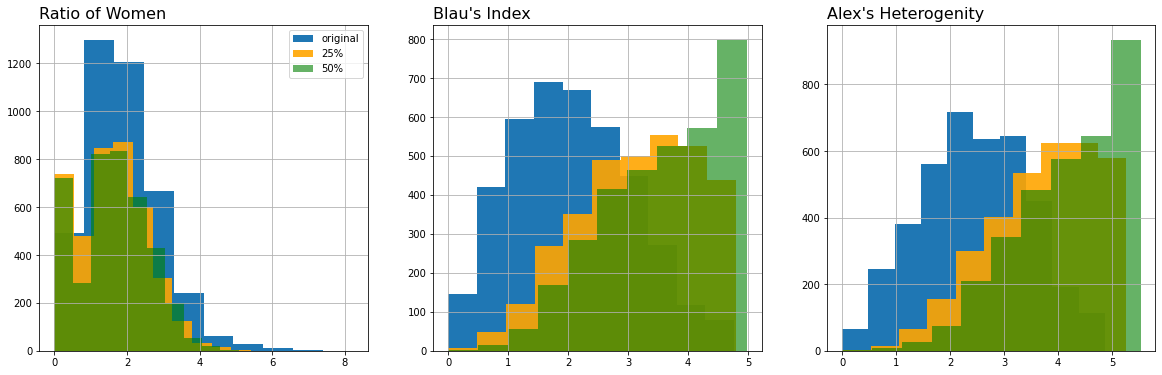

In [527]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3, figsize=(20,6))
ax1.set_title("Ratio of Women", fontsize=16, loc="left")
moby_filter2['prop_women_zscore'].hist(ax=ax1, label='original',  alpha=1)
#moby_filter2['propw_female_frac_10_z_zscore'].hist(ax=ax1, label='10%', alpha=0.9, color='orange')
moby_filter2['propw_female_frac_25_z_zscore'].hist(ax=ax1, label='25%', alpha=0.9, color='orange')
moby_filter2['propw_female_frac_50_z_zscore'].hist(ax=ax1, label='50%', alpha=0.6, color='green')
#moby_filter2['propw_female_frac_75_z_zscore'].hist(ax=ax1, label='75%', alpha=0.4, color='red')

ax2.set_title("Blau's Index", fontsize=16, loc="left")
moby_filter2['blau2_zscore'].hist(ax=ax2)
moby_filter2['blau_frac_25_zscore'].hist(ax=ax2, label='25%', alpha=0.9, color='orange')
moby_filter2['blau_frac_50_zscore'].hist(ax=ax2, label='50%', alpha=0.6, color='green')
#moby_filter2['blau_frac_75_zscore'].hist(ax=ax2, label='75%', alpha=0.4, color='red')

ax3.set_title("Alex's Heterogenity", fontsize=16, loc="left")
moby_filter2['alex_het2_zscore'].hist(ax=ax3)
moby_filter2['alex_het_frac_25_zscore'].hist(ax=ax3, label='25%', alpha=0.9, color='orange')
moby_filter2['alex_het_frac_50_zscore'].hist(ax=ax3, label='25%', alpha=0.6, color='green')
#moby_filter2['alex_het_frac_75_zscore'].hist(ax=ax3, label='75%', alpha=0.4, color='red')

ax1.legend()




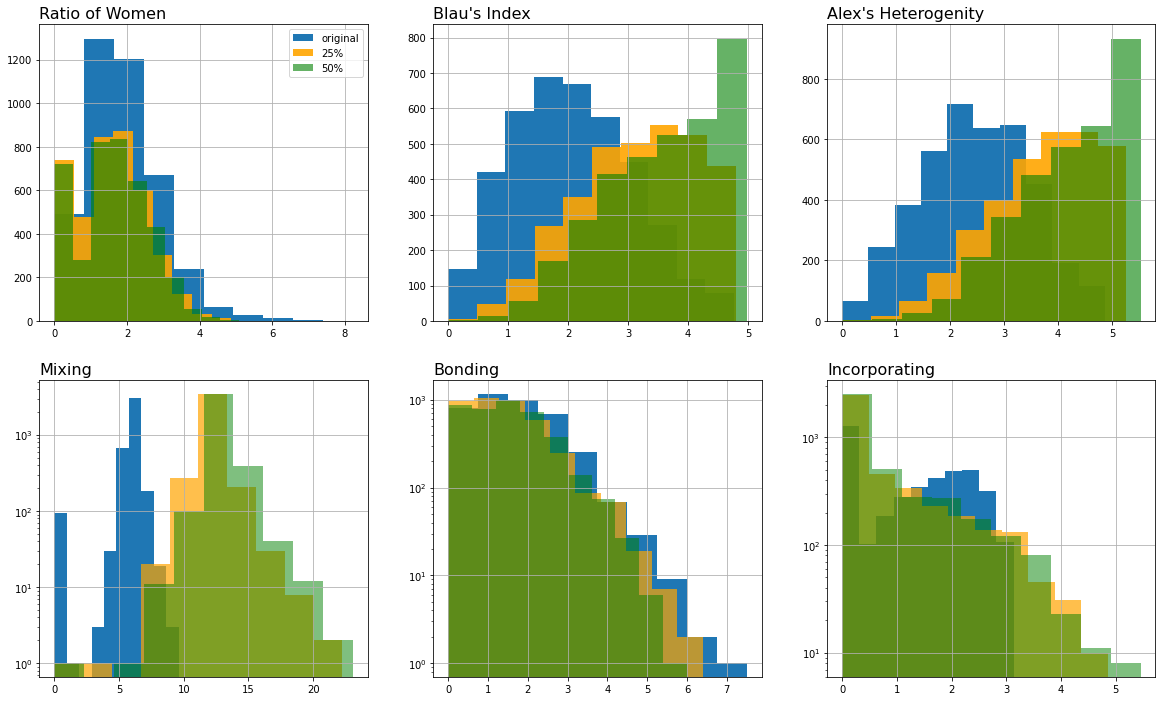

In [528]:
fig, ((ax1,ax2,ax3), (ax4, ax5, ax6))=plt.subplots(2,3, figsize=(20,12))
ax1.set_title("Ratio of Women", fontsize=16, loc="left")
moby_filter2['prop_women_zscore'].hist(ax=ax1, label='original',  alpha=1)
#moby_filter2['propw_female_frac_10_z_zscore'].hist(ax=ax1, label='10%', alpha=0.9, color='orange')
moby_filter2['propw_female_frac_25_z_zscore'].hist(ax=ax1, label='25%', alpha=0.9, color='orange')
moby_filter2['propw_female_frac_50_z_zscore'].hist(ax=ax1, label='50%', alpha=0.6, color='green')
#moby_filter2['propw_female_frac_75_z_zscore'].hist(ax=ax1, label='75%', alpha=0.4, color='red')

ax2.set_title("Blau's Index", fontsize=16, loc="left")
moby_filter2['blau2_zscore'].hist(ax=ax2)
moby_filter2['blau_frac_25_zscore'].hist(ax=ax2, label='25%', alpha=0.9, color='orange')
moby_filter2['blau_frac_50_zscore'].hist(ax=ax2, label='50%', alpha=0.6, color='green')
#moby_filter2['blau_frac_75_zscore'].hist(ax=ax2, label='75%', alpha=0.4, color='red')

ax3.set_title("Alex's Heterogenity", fontsize=16, loc="left")
moby_filter2['alex_het2_zscore'].hist(ax=ax3)
moby_filter2['alex_het_frac_25_zscore'].hist(ax=ax3, label='25%', alpha=0.9, color='orange')
moby_filter2['alex_het_frac_50_zscore'].hist(ax=ax3, label='25%', alpha=0.6, color='green')
#moby_filter2['alex_het_frac_75_zscore'].hist(ax=ax3, label='75%', alpha=0.4, color='red')

ax4.set_title("Mixing", fontsize=16, loc="left")
moby_filter2['assortativity_rev_z_zscore'].hist(ax=ax4, label='original',  log=True, alpha=1)
moby_filter2['assortativity_rev_frac_25_z_zscore'].hist(ax=ax4, label='25%', log=True, alpha=0.7, color='orange')
moby_filter2['assortativity_rev_frac_50_z_zscore'].hist(ax=ax4, label='50%', log=True, alpha=0.5, color='green')
#moby_filter2['assortativity_rev_frac_75_z_zscore'].hist(ax=ax1, label='75%', log=True, alpha=0.4, color='red')

ax5.set_title("Bonding", fontsize=16, loc="left")
moby_filter2['weighted_cross_edges_ratio_z_zscore'].hist(ax=ax5,log=True)
moby_filter2['weighted_cross_edges_ratio_female_frac_25_log_z_zscore'].hist(ax=ax5, label='25%',log=True, alpha=0.7, color='orange')
moby_filter2['weighted_cross_edges_ratio_female_frac_50_log_z_zscore'].hist(ax=ax5, label='50%',log=True, alpha=0.5, color='green')
#moby_filter2['weighted_cross_edges_ratio_female_frac_75_log_z_zscore'].hist(ax=ax2, label='75%',log=True, alpha=0.4, color='red')

ax6.set_title("Incorporating", fontsize=16, loc="left")
moby_filter2['female_coreness_log_z_zscore'].hist(ax=ax6,log=True)
moby_filter2['female_coreness_log_frac_25_z_zscore'].hist(ax=ax6, label='25%',log=True, alpha=0.7, color='orange')
moby_filter2['female_coreness_log_frac_50_z_zscore'].hist(ax=ax6, label='50%',log=True, alpha=0.5, color='green')
#moby_filter2['female_coreness_log_frac_75_z_zscore'].hist(ax=ax3, label='75%',log=True, alpha=0.4, color='red')

ax1.legend()

plt.savefig('gender_swapping_on_metrics.pdf', bbox_inches='tight')


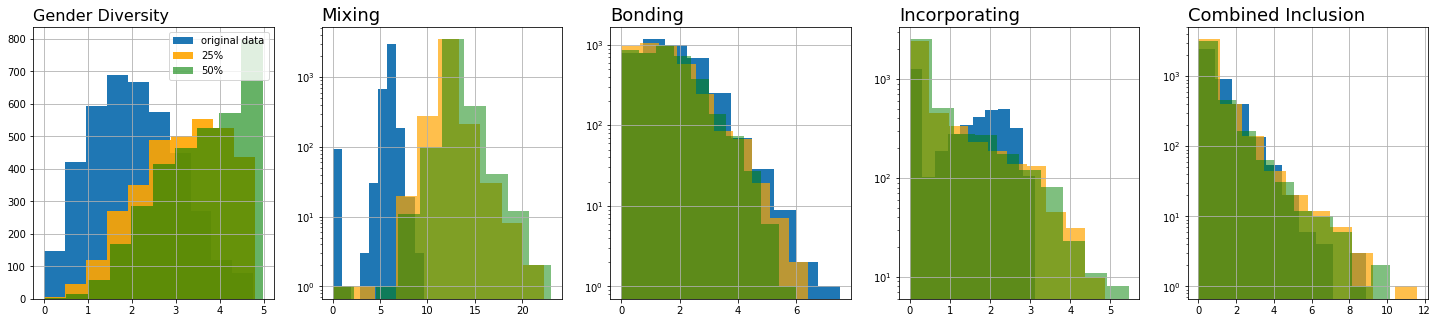

In [651]:
fig, (ax0, ax1,ax2,ax3, ax4)=plt.subplots(1,5, figsize=(25,5))

ax0.set_title("Gender Diversity", fontsize=16, loc="left")
moby_filter2['blau2_zscore'].hist(ax=ax0, label='original data')
moby_filter2['blau_frac_25_zscore'].hist(ax=ax0, label='25%', alpha=0.9, color='orange')
moby_filter2['blau_frac_50_zscore'].hist(ax=ax0, label='50%', alpha=0.6, color='green')
#moby_filter2['blau_frac_75_zscore'].hist(ax=ax2, label='75%', alpha=0.4, color='red')

ax1.set_title("Mixing", fontsize=18, loc="left")
moby_filter2['assortativity_rev_z_zscore'].hist(ax=ax1, label='original',  log=True, alpha=1)
moby_filter2['assortativity_rev_frac_25_z_zscore'].hist(ax=ax1, label='25%', log=True, alpha=0.7, color='orange')
moby_filter2['assortativity_rev_frac_50_z_zscore'].hist(ax=ax1, label='50%', log=True, alpha=0.5, color='green')
#moby_filter2['assortativity_rev_frac_75_z_zscore'].hist(ax=ax1, label='75%', log=True, alpha=0.4, color='red')

ax2.set_title("Bonding", fontsize=18, loc="left")
moby_filter2['weighted_cross_edges_ratio_z_zscore'].hist(ax=ax2,log=True)
moby_filter2['weighted_cross_edges_ratio_female_frac_25_log_z_zscore'].hist(ax=ax2, label='25%',log=True, alpha=0.7, color='orange')
moby_filter2['weighted_cross_edges_ratio_female_frac_50_log_z_zscore'].hist(ax=ax2, label='50%',log=True, alpha=0.5, color='green')
#moby_filter2['weighted_cross_edges_ratio_female_frac_75_log_z_zscore'].hist(ax=ax2, label='75%',log=True, alpha=0.4, color='red')

ax3.set_title("Incorporating", fontsize=18, loc="left")
moby_filter2['female_coreness_log_z_zscore'].hist(ax=ax3,log=True)
moby_filter2['female_coreness_log_frac_25_z_zscore'].hist(ax=ax3, label='25%',log=True, alpha=0.7, color='orange')
moby_filter2['female_coreness_log_frac_50_z_zscore'].hist(ax=ax3, label='50%',log=True, alpha=0.5, color='green')
#moby_filter2['female_coreness_log_frac_75_z_zscore'].hist(ax=ax3, label='75%',log=True, alpha=0.4, color='red')

ax4.set_title("Combined Inclusion", fontsize=18, loc="left")
moby_filter2['combined_zscore'].hist(ax=ax4, log=True)
moby_filter2['combined_25_zscore'].hist(ax=ax4, label='25%', alpha=0.7,log=True, color='orange')
moby_filter2['combined_50_zscore'].hist(ax=ax4, label='50%', alpha=0.5,log=True, color='green')
#moby_filter2['combined_75_zscore'].hist(ax=ax4, label='75%', alpha=0.9,log=True, color='red')


ax0.legend()
plt.savefig('gender_swapping_on_metrics.pdf', bbox_inches='tight')



In [530]:
#moby_filter2[cols].hist()

# MODELING


## CREATIVITY

In [634]:
p_out='/Users/vorsi/Dropbox/moby-data_not_shared/SMALL_data/tables/robustness/'
def save_results(res, f):
    d={'aic':res.aic,
  "bic": res.bic,
  'r2':res.rsquared_adj,
  "model":f}
    t=res.summary2().tables[1]
    t.to_excel(p_out+f+".xlsx")
    return t, pd.DataFrame.from_dict(d,'index').T

In [635]:
models=[]
formula0A="""game_dist_prev5yr_zscore ~   
            N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
              ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28"""
dist0  = sm.ols(formula=formula0A, data=moby_filter2).fit()
dist0  = sm.ols(formula=formula0A, data=moby_filter2).fit()
_=save_results(dist0, 'formula0A')
m=_[0]
m["formula"]="formula0A"
models.append(m)
R=_[1]
dist0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.102
Model:                                  OLS   Adj. R-squared:                  0.096
Method:                       Least Squares   F-statistic:                     16.16
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.53e-73
Time:                              16:23:21   Log-Likelihood:                -5475.0
No. Observations:                      4011   AIC:                         1.101e+04
Df Residuals:                          3982   BIC:                         1.119e+04
Df Model:                                28                                         
Covariance Type:                  nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.4577      0.104     23.571      0.000       2.253       2.662
N                   -0.0011      0.000     -5.448      0.000      -0.001      -0.001
newbies_prop         0.1759      0.113      1.554      0.120      -0.046       0.398
games_tenure         0.0287      0.022      1.301      0.193      -0.015       0.072
star_prior           0.1295      0.320      0.404      0.686      -0.499       0.758
hold_single_firm     0.0654      0.034      1.945      0.052      -0.001       0.131
ratio_core_z         0.2364      0.088      2.673      0.008       0.063       0.410
num_countries       -0.0365      0.007     -5.409      0.000      -0.050      -0.023
plat2                0.2690      0.068      3.941      0.000       0.135       0.403
plat7               -0.3693      0.055     -6.680      0.000      -0.478      -0.261
plat12              -0.1832      0.066     -2.768      0.006      -0.313      -0.053
plat13              -0.2854      0.073     -3.889      0.000      -0.429      -0.141
plat14              -0.1455      0.088     -1.663      0.096      -0.317       0.026
plat15              -0.5988      0.100     -5.964      0.000      -0.796      -0.402
year13              -0.0174      0.092     -0.188      0.851      -0.198       0.163
year15               0.1621      0.089      1.829      0.067      -0.012       0.336
year16               0.0459      0.091      0.506      0.613      -0.132       0.224
year17              -0.0185      0.091     -0.203      0.839      -0.196       0.160
year18               0.0029      0.090      0.032      0.974      -0.174       0.180
year19              -0.0080      0.089     -0.090      0.928      -0.182       0.166
year20              -0.0059      0.090     -0.065      0.948      -0.182       0.171
year21               0.0866      0.092      0.944      0.345      -0.093       0.267
year22               0.0307      0.094      0.327      0.743      -0.153       0.214
year23               0.0051      0.096      0.053      0.958      -0.184       0.194
year24              -0.2381      0.098     -2.427      0.015      -0.431      -0.046
year25              -0.2387      0.097     -2.471      0.014      -0.428      -0.049
year26              -0.3431      0.099     -3.457      0.001      -0.538      -0.148
year27              -0.1203      0.104     -1.154      0.249      -0.325       0.084
year28              -0.1574      0.123     -1.283      0.200      -0.398       0.083
==============================================================================
Omnibus:                      156.300   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.751
Skew:                           0.232   Prob(JB):           

In [636]:
formula01="""game_dist_prev5yr_zscore ~   
prop_women2_zscore +
            N +  
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
              ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist01  = sm.ols(formula=formula01, data=moby_filter2).fit()
_=save_results(dist01, 'formula01')
m=_[0]
m["formula"]="formula0"
models.append(m)
R=R.append(_[1])
dist01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.111
Model:                                  OLS   Adj. R-squared:                  0.105
Method:                       Least Squares   F-statistic:                     17.19
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           2.33e-81
Time:                              16:23:24   Log-Likelihood:                -5454.3
No. Observations:                      4011   AIC:                         1.097e+04
Df Residuals:                          3981   BIC:                         1.116e+04
Df Model:                                29                                         
Covariance Type:                  nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.2932      0.107     21.462      0.000       2.084       2.503
prop_women2_zscore     0.0986      0.015      6.430      0.000       0.069       0.129
N                     -0.0011      0.000     -5.522      0.000      -0.001      -0.001
newbies_prop           0.1642      0.113      1.458      0.145      -0.057       0.385
games_tenure           0.0375      0.022      1.702      0.089      -0.006       0.081
star_prior             0.1129      0.319      0.354      0.723      -0.512       0.738
hold_single_firm       0.0496      0.034      1.479      0.139      -0.016       0.115
ratio_core_z           0.2145      0.088      2.436      0.015       0.042       0.387
num_countries         -0.0330      0.007     -4.903      0.000      -0.046      -0.020
plat2                  0.2736      0.068      4.029      0.000       0.140       0.407
plat7                 -0.3592      0.055     -6.528      0.000      -0.467      -0.251
plat12                -0.1983      0.066     -3.009      0.003      -0.327      -0.069
plat13                -0.2504      0.073     -3.420      0.001      -0.394      -0.107
plat14                -0.1388      0.087     -1.594      0.111      -0.310       0.032
plat15                -0.5662      0.100     -5.660      0.000      -0.762      -0.370
year13                -0.0412      0.092     -0.449      0.653      -0.221       0.139
year15                 0.1589      0.088      1.803      0.072      -0.014       0.332
year16                 0.0545      0.090      0.603      0.546      -0.123       0.232
year17                -0.0203      0.090     -0.225      0.822      -0.197       0.157
year18                -0.0015      0.090     -0.016      0.987      -0.178       0.175
year19                -0.0151      0.088     -0.172      0.864      -0.188       0.158
year20                -0.0275      0.090     -0.306      0.759      -0.203       0.148
year21                 0.0569      0.091      0.623      0.534      -0.122       0.236
year22                 0.0004      0.093      0.005      0.996      -0.183       0.183
year23                -0.0197      0.096     -0.205      0.837      -0.208       0.168
year24                -0.2598      0.098     -2.660      0.008      -0.451      -0.068
year25                -0.2617      0.096     -2.720      0.007      -0.450      -0.073
year26                -0.3833      0.099     -3.874      0.000      -0.577      -0.189
year27                -0.1642      0.104     -1.579      0.114      -0.368       0.040
year28                -0.1960      0.122     -1.603      0.109      -0.436       0.044
==============================================================================
Omnibus:                      145.436   Durbin-Watson:             

In [637]:
formula01blau2="""game_dist_prev5yr_zscore ~   
            N +  blau2_zscore +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
              ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist01blau2  = sm.ols(formula=formula01blau2, data=moby_filter2).fit()
_=save_results(dist01blau2, 'formula0blau2')
m=_[0]
m["formula"]="formula0blau2"
models.append(m)
R=R.append(_[1])
anovaResults = anova_lm(formula01, dist01blau2)
b=pd.DataFrame(anovaResults)
b['label']='blau_baseline'
a=a.append(b)
#R=R.append(save_results(dist1alex2, 'formula1_alex2'))

dist01blau2.summary()

NameError: name 'anova_lm' is not defined

In [536]:
formula01alex="""game_dist_prev5yr_zscore ~   
            N +  alex_het2_zscore +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
              ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist01alex  = sm.ols(formula=formula01alex, data=moby_filter2).fit()
_=save_results(dist01alex, 'formula0alex')
m=_[0]
m["formula"]="formula0alex"
models.append(m)
R=R.append(_[1])
dist01alex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.108
Model:                                  OLS   Adj. R-squared:                  0.102
Method:                       Least Squares   F-statistic:                     16.67
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.29e-78
Time:                              15:58:48   Log-Likelihood:                -5461.0
No. Observations:                      4011   AIC:                         1.098e+04
Df Residuals:                          3981   BIC:                         1.117e+04
Df Model:                                29                                         
Covariance Type:                  nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.2636      0.110     20.535      0.000       2.048       2.480
N                   -0.0011      0.000     -5.627      0.000      -0.002      -0.001
alex_het2_zscore     0.0810      0.015      5.279      0.000       0.051       0.111
newbies_prop         0.1622      0.113      1.437      0.151      -0.059       0.383
games_tenure         0.0345      0.022      1.565      0.118      -0.009       0.078
star_prior           0.1109      0.319      0.347      0.728      -0.515       0.737
hold_single_firm     0.0537      0.034      1.599      0.110      -0.012       0.120
ratio_core_z         0.2193      0.088      2.486      0.013       0.046       0.392
num_countries       -0.0340      0.007     -5.044      0.000      -0.047      -0.021
plat2                0.2755      0.068      4.050      0.000       0.142       0.409
plat7               -0.3646      0.055     -6.618      0.000      -0.473      -0.257
plat12              -0.2024      0.066     -3.063      0.002      -0.332      -0.073
plat13              -0.2539      0.073     -3.460      0.001      -0.398      -0.110
plat14              -0.1406      0.087     -1.612      0.107      -0.312       0.030
plat15              -0.5660      0.100     -5.645      0.000      -0.763      -0.369
year13              -0.0374      0.092     -0.407      0.684      -0.218       0.143
year15               0.1593      0.088      1.804      0.071      -0.014       0.332
year16               0.0526      0.090      0.581      0.561      -0.125       0.230
year17              -0.0213      0.090     -0.235      0.814      -0.199       0.156
year18               0.0034      0.090      0.038      0.970      -0.173       0.180
year19              -0.0131      0.088     -0.149      0.882      -0.186       0.160
year20              -0.0212      0.090     -0.236      0.813      -0.197       0.155
year21               0.0652      0.092      0.712      0.477      -0.114       0.245
year22               0.0095      0.093      0.102      0.919      -0.174       0.193
year23              -0.0113      0.096     -0.118      0.906      -0.200       0.177
year24              -0.2547      0.098     -2.603      0.009      -0.447      -0.063
year25              -0.2568      0.096     -2.666      0.008      -0.446      -0.068
year26              -0.3752      0.099     -3.787      0.000      -0.570      -0.181
year27              -0.1574      0.104     -1.511      0.131      -0.362       0.047
year28              -0.1882      0.122     -1.537      0.124      -0.428       0.052
==============================================================================
Omnibus:                      146.281   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (J

In [537]:
formula025="""game_dist_prev5yr ~   
           propw_female_frac_25_zscore + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
           year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist025  = sm.ols(formula=formula025, data=moby_filter2).fit()
_=save_results(dist025, 'formula025')
m=_[0]
m["formula"]="formula025"
models.append(m)
R=R.append(_[1])
dist025.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      game_dist_prev5yr   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     12.81
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           1.85e-57
Time:                        15:58:48   Log-Likelihood:                 4259.1
No. Observations:                3301   AIC:                            -8458.
Df Residuals:                    3271   BIC:                            -8275.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.7767      0.009     86.858      0.000       0.759       0.794
propw_female_frac_25_zscore     0.0048      0.001      3.900      0.000       0.002       0.007
N                           -6.345e-05   1.48e-05     -4.281      0.000   -9.25e-05   -3.44e-05
newbies_prop                    0.0196      0.009      2.197      0.028       0.002       0.037
games_tenure                    0.0046      0.002      2.556      0.011       0.001       0.008
star_prior                      0.0082      0.023      0.364      0.716      -0.036       0.053
hold_single_firm                0.0022      0.003      0.837      0.403      -0.003       0.007
ratio_core_z                    0.0096      0.007      1.364      0.173      -0.004       0.023
num_countries                  -0.0024      0.000     -4.808      0.000      -0.003      -0.001
plat2                           0.0216      0.006      3.671      0.000       0.010       0.033
plat7                          -0.0255      0.004     -6.354      0.000      -0.033      -0.018
plat12                         -0.0133      0.005     -2.672      0.008      -0.023      -0.004
plat13                         -0.0194      0.005     -3.652      0.000      -0.030      -0.009
plat14                         -0.0121      0.006     -1.937      0.053      -0.024       0.000
plat15                         -0.0312      0.008     -3.884      0.000      -0.047      -0.015
year13                         -0.0082      0.008     -1.000      0.317      -0.024       0.008
year15                          0.0175      0.007      2.393      0.017       0.003       0.032
year16                          0.0088      0.007      1.189      0.235      -0.006       0.023
year17                          0.0038      0.007      0.509      0.611      -0.011       0.018
year18                          0.0060      0.007      0.820      0.413      -0.008       0.020
year19                          0.0022      0.007      0.301      0.764      -0.012       0.016
year20                          0.0038      0.007      0.518      0.605      -0.011       0.018
year21                          0.0101      0.007      1.362      0.173      -0.004       0.025
year22                          0.0075      0.008      0.995      0.320      -0.007       0.022
year23                          0.0030      0.008      0.388      0.698      -0.012       0.018
year24                         -0.0129      0.008     -1.640      0.101      -0.028       0.003
year25                         -0.0128      0.008     -1.653      0.098      -0.028       0.002
year26                         -0.0277      0.008     -3.415      0.001      -0.044      -0.012
year27                         -0.0112      0.009     -1.302      0.193      -0.028       0.006
year28     

In [538]:
formula050="""game_dist_prev5yr_zscore ~   
           propw_female_frac_50_zscore + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist050  = sm.ols(formula=formula050, data=moby_filter2).fit()
_=save_results(dist050, 'formula050')
m=_[0]
m["formula"]="formula050"
models.append(m)
R=R.append(_[1])
dist050.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.100
Model:                                  OLS   Adj. R-squared:                  0.092
Method:                       Least Squares   F-statistic:                     12.59
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           2.91e-56
Time:                              15:58:48   Log-Likelihood:                -4465.0
No. Observations:                      3301   AIC:                             8990.
Df Residuals:                          3271   BIC:                             9173.
Df Model:                                29                                         
Covariance Type:                  nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.1586      0.126     17.077      0.000       1.911       2.406
propw_female_frac_50_zscore     0.0526      0.017      3.040      0.002       0.019       0.087
N                              -0.0009      0.000     -4.207      0.000      -0.001      -0.000
newbies_prop                    0.2753      0.126      2.190      0.029       0.029       0.522
games_tenure                    0.0631      0.025      2.511      0.012       0.014       0.112
star_prior                      0.1217      0.318      0.383      0.702      -0.501       0.745
hold_single_firm                0.0345      0.038      0.915      0.360      -0.039       0.109
ratio_core_z                    0.1335      0.099      1.351      0.177      -0.060       0.327
num_countries                  -0.0341      0.007     -4.926      0.000      -0.048      -0.021
plat2                           0.3002      0.083      3.628      0.000       0.138       0.463
plat7                          -0.3591      0.056     -6.376      0.000      -0.470      -0.249
plat12                         -0.1848      0.070     -2.636      0.008      -0.322      -0.047
plat13                         -0.2781      0.075     -3.729      0.000      -0.424      -0.132
plat14                         -0.1729      0.088     -1.967      0.049      -0.345      -0.001
plat15                         -0.4406      0.113     -3.904      0.000      -0.662      -0.219
year13                         -0.1172      0.115     -1.015      0.310      -0.344       0.109
year15                          0.2463      0.103      2.391      0.017       0.044       0.448
year16                          0.1218      0.104      1.169      0.243      -0.083       0.326
year17                          0.0509      0.104      0.489      0.625      -0.153       0.255
year18                          0.0829      0.103      0.804      0.421      -0.119       0.285
year19                          0.0285      0.102      0.279      0.780      -0.171       0.228
year20                          0.0542      0.103      0.525      0.599      -0.148       0.256
year21                          0.1444      0.104      1.389      0.165      -0.059       0.348
year22                          0.1077      0.106      1.015      0.310      -0.100       0.316
year23                          0.0442      0.109      0.404      0.686      -0.170       0.259
year24                         -0.1795      0.110     -1.629      0.103      -0.396       0.037
year25                         -0.1792      0.109     -1.645      0.100      -0.393       0.034
year26                         -0.3871      0.114     -3.393      0.001      -0.611      -0.163
year27                         -0.1516   

In [539]:
formula075="""game_dist_prev5yr_zscore ~   
           propw_female_frac_75_zscore + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year1_10 + year11 + year12 + year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist075  = sm.ols(formula=formula075, data=moby_filter2).fit()
_=save_results(dist075, 'formula075')
m=_[0]
m["formula"]="formula075"
models.append(m)
R=R.append(_[1])
dist075.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.099
Model:                                  OLS   Adj. R-squared:                  0.091
Method:                       Least Squares   F-statistic:                     12.46
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.39e-55
Time:                              15:58:48   Log-Likelihood:                -4466.7
No. Observations:                      3301   AIC:                             8993.
Df Residuals:                          3271   BIC:                             9177.
Df Model:                                29                                         
Covariance Type:                  nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.1847      0.127     17.267      0.000       1.937       2.433
propw_female_frac_75_zscore     0.0422      0.017      2.421      0.016       0.008       0.076
N                              -0.0009      0.000     -4.181      0.000      -0.001      -0.000
newbies_prop                    0.2754      0.126      2.190      0.029       0.029       0.522
games_tenure                    0.0620      0.025      2.463      0.014       0.013       0.111
star_prior                      0.1286      0.318      0.404      0.686      -0.495       0.752
hold_single_firm                0.0375      0.038      0.993      0.321      -0.037       0.112
ratio_core_z                    0.1327      0.099      1.342      0.180      -0.061       0.327
num_countries                  -0.0345      0.007     -4.977      0.000      -0.048      -0.021
plat2                           0.2968      0.083      3.582      0.000       0.134       0.459
plat7                          -0.3599      0.056     -6.386      0.000      -0.470      -0.249
plat12                         -0.1826      0.070     -2.602      0.009      -0.320      -0.045
plat13                         -0.2836      0.075     -3.799      0.000      -0.430      -0.137
plat14                         -0.1744      0.088     -1.983      0.047      -0.347      -0.002
plat15                         -0.4411      0.113     -3.905      0.000      -0.663      -0.220
year1_10                    -2.762e-16   3.88e-17     -7.113      0.000   -3.52e-16      -2e-16
year11                       9.557e-17   1.72e-16      0.556      0.578   -2.41e-16    4.32e-16
year12                      -1.476e-17   5.33e-17     -0.277      0.782   -1.19e-16    8.98e-17
year13                         -0.1183      0.116     -1.024      0.306      -0.345       0.108
year15                          0.2462      0.103      2.389      0.017       0.044       0.448
year16                          0.1193      0.104      1.144      0.253      -0.085       0.324
year17                          0.0487      0.104      0.468      0.640      -0.155       0.253
year18                          0.0824      0.103      0.798      0.425      -0.120       0.285
year19                          0.0269      0.102      0.264      0.792      -0.173       0.227
year20                          0.0550      0.103      0.533      0.594      -0.147       0.257
year21                          0.1461      0.104      1.404      0.160      -0.058       0.350
year22                          0.1096      0.106      1.032      0.302      -0.099       0.318
year23                          0.0465      0.109      0.425      0.671      -0.168       0.261
year24                         -0.1776   

In [540]:
formula025_alex="""game_dist_prev5yr_zscore ~   
           alex_het_frac_25_zscore + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
           year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist025_alex  = sm.ols(formula=formula025_alex, data=moby_filter2).fit()
_=save_results(dist025, 'formula025_alex')
m=_[0]
m["formula"]="formula025_alex"
models.append(m)
R=R.append(_[1])
dist025_alex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.099
Model:                                  OLS   Adj. R-squared:                  0.091
Method:                       Least Squares   F-statistic:                     12.43
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.86e-55
Time:                              15:58:48   Log-Likelihood:                -4467.0
No. Observations:                      3301   AIC:                             8994.
Df Residuals:                          3271   BIC:                             9177.
Df Model:                                29                                         
Covariance Type:                  nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.1370      0.136     15.680      0.000       1.870       2.404
alex_het_frac_25_zscore     0.0391      0.017      2.285      0.022       0.006       0.073
N                          -0.0009      0.000     -4.358      0.000      -0.001      -0.000
newbies_prop                0.2751      0.126      2.187      0.029       0.029       0.522
games_tenure                0.0598      0.025      2.383      0.017       0.011       0.109
star_prior                  0.1410      0.318      0.444      0.657      -0.482       0.764
hold_single_firm            0.0419      0.038      1.116      0.264      -0.032       0.116
ratio_core_z                0.1341      0.099      1.356      0.175      -0.060       0.328
num_countries              -0.0341      0.007     -4.911      0.000      -0.048      -0.020
plat2                       0.2943      0.083      3.554      0.000       0.132       0.457
plat7                      -0.3588      0.056     -6.366      0.000      -0.469      -0.248
plat12                     -0.1830      0.070     -2.607      0.009      -0.321      -0.045
plat13                     -0.2860      0.075     -3.834      0.000      -0.432      -0.140
plat14                     -0.1728      0.088     -1.964      0.050      -0.345      -0.000
plat15                     -0.4264      0.113     -3.776      0.000      -0.648      -0.205
year13                     -0.1175      0.116     -1.017      0.309      -0.344       0.109
year15                      0.2476      0.103      2.402      0.016       0.045       0.450
year16                      0.1195      0.104      1.145      0.252      -0.085       0.324
year17                      0.0494      0.104      0.474      0.636      -0.155       0.254
year18                      0.0876      0.103      0.849      0.396      -0.115       0.290
year19                      0.0302      0.102      0.296      0.767      -0.170       0.230
year20                      0.0595      0.103      0.576      0.564      -0.143       0.262
year21                      0.1489      0.104      1.432      0.152      -0.055       0.353
year22                      0.1153      0.106      1.086      0.278      -0.093       0.323
year23                      0.0529      0.109      0.483      0.629      -0.162       0.267
year24                     -0.1708      0.110     -1.550      0.121      -0.387       0.045
year25                     -0.1691      0.109     -1.553      0.120      -0.383       0.044
year26                     -0.3818      0.114     -3.345      0.001      -0.606      -0.158
year27                     -0.1424      0.121     -1.181      0.238      -0.379       0.094
year28                     -0.2380      0.146     -1.626      0.104      

In [541]:
formula050_alex="""game_dist_prev5yr_zscore ~   
           alex_het_frac_50_zscore + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
           year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist050_alex  = sm.ols(formula=formula050_alex, data=moby_filter2).fit()
_=save_results(dist050, 'formula050_alex')
m=_[0]
m["formula"]="formula050_alex"
models.append(m)
R=R.append(_[1])
dist050_alex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.099
Model:                                  OLS   Adj. R-squared:                  0.091
Method:                       Least Squares   F-statistic:                     12.33
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           6.59e-55
Time:                              15:58:48   Log-Likelihood:                -4468.4
No. Observations:                      3301   AIC:                             8997.
Df Residuals:                          3271   BIC:                             9180.
Df Model:                                29                                         
Covariance Type:                  nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.1695      0.141     15.376      0.000       1.893       2.446
alex_het_frac_50_zscore     0.0272      0.017      1.576      0.115      -0.007       0.061
N                          -0.0009      0.000     -4.311      0.000      -0.001      -0.000
newbies_prop                0.2763      0.126      2.196      0.028       0.030       0.523
games_tenure                0.0589      0.025      2.345      0.019       0.010       0.108
star_prior                  0.1490      0.318      0.469      0.639      -0.474       0.772
hold_single_firm            0.0451      0.038      1.200      0.230      -0.029       0.119
ratio_core_z                0.1326      0.099      1.341      0.180      -0.061       0.327
num_countries              -0.0345      0.007     -4.979      0.000      -0.048      -0.021
plat2                       0.2903      0.083      3.501      0.000       0.128       0.453
plat7                      -0.3586      0.056     -6.362      0.000      -0.469      -0.248
plat12                     -0.1794      0.070     -2.554      0.011      -0.317      -0.042
plat13                     -0.2921      0.075     -3.911      0.000      -0.439      -0.146
plat14                     -0.1743      0.088     -1.981      0.048      -0.347      -0.002
plat15                     -0.4292      0.113     -3.800      0.000      -0.651      -0.208
year13                     -0.1186      0.116     -1.026      0.305      -0.345       0.108
year15                      0.2473      0.103      2.398      0.017       0.045       0.450
year16                      0.1171      0.104      1.122      0.262      -0.088       0.322
year17                      0.0470      0.104      0.450      0.652      -0.157       0.251
year18                      0.0856      0.103      0.829      0.407      -0.117       0.288
year19                      0.0280      0.102      0.274      0.784      -0.172       0.228
year20                      0.0592      0.103      0.573      0.566      -0.143       0.262
year21                      0.1494      0.104      1.436      0.151      -0.055       0.353
year22                      0.1164      0.106      1.096      0.273      -0.092       0.325
year23                      0.0539      0.109      0.493      0.622      -0.161       0.269
year24                     -0.1701      0.110     -1.542      0.123      -0.386       0.046
year25                     -0.1679      0.109     -1.541      0.124      -0.382       0.046
year26                     -0.3803      0.114     -3.331      0.001      -0.604      -0.156
year27                     -0.1383      0.121     -1.146      0.252      -0.375       0.098
year28                     -0.2354      0.147     -1.607      0.108      

In [542]:
formula075_alex="""game_dist_prev5yr_zscore ~   
           alex_het_frac_75_zscore + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
           year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist075_alex  = sm.ols(formula=formula075_alex, data=moby_filter2).fit()
_=save_results(dist075, 'formula075_alex')
m=_[0]
m["formula"]="formula075_alex"
models.append(m)
R=R.append(_[1])
dist075_alex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.098
Model:                                  OLS   Adj. R-squared:                  0.090
Method:                       Least Squares   F-statistic:                     12.28
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.14e-54
Time:                              15:58:48   Log-Likelihood:                -4469.0
No. Observations:                      3301   AIC:                             8998.
Df Residuals:                          3271   BIC:                             9181.
Df Model:                                29                                         
Covariance Type:                  nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.1970      0.144     15.285      0.000       1.915       2.479
alex_het_frac_75_zscore     0.0197      0.017      1.142      0.254      -0.014       0.054
N                          -0.0009      0.000     -4.298      0.000      -0.001      -0.000
newbies_prop                0.2771      0.126      2.202      0.028       0.030       0.524
games_tenure                0.0581      0.025      2.313      0.021       0.009       0.107
star_prior                  0.1553      0.318      0.489      0.625      -0.468       0.779
hold_single_firm            0.0474      0.038      1.262      0.207      -0.026       0.121
ratio_core_z                0.1318      0.099      1.332      0.183      -0.062       0.326
num_countries              -0.0347      0.007     -5.001      0.000      -0.048      -0.021
plat2                       0.2870      0.083      3.461      0.001       0.124       0.450
plat7                      -0.3585      0.056     -6.358      0.000      -0.469      -0.248
plat12                     -0.1769      0.070     -2.518      0.012      -0.315      -0.039
plat13                     -0.2963      0.075     -3.965      0.000      -0.443      -0.150
plat14                     -0.1750      0.088     -1.988      0.047      -0.348      -0.002
plat15                     -0.4301      0.113     -3.807      0.000      -0.652      -0.209
year13                     -0.1194      0.116     -1.032      0.302      -0.346       0.107
year15                      0.2470      0.103      2.394      0.017       0.045       0.449
year16                      0.1149      0.104      1.101      0.271      -0.090       0.320
year17                      0.0450      0.104      0.432      0.666      -0.159       0.249
year18                      0.0845      0.103      0.818      0.413      -0.118       0.287
year19                      0.0263      0.102      0.258      0.796      -0.174       0.226
year20                      0.0593      0.103      0.574      0.566      -0.143       0.262
year21                      0.1493      0.104      1.435      0.151      -0.055       0.353
year22                      0.1170      0.106      1.102      0.271      -0.091       0.325
year23                      0.0550      0.110      0.502      0.615      -0.160       0.270
year24                     -0.1692      0.110     -1.534      0.125      -0.385       0.047
year25                     -0.1662      0.109     -1.524      0.128      -0.380       0.048
year26                     -0.3797      0.114     -3.325      0.001      -0.604      -0.156
year27                     -0.1356      0.121     -1.124      0.261      -0.372       0.101
year28                     -0.2338      0.147     -1.595      0.111      

In [543]:
formula025_blau="""game_dist_prev5yr_zscore ~   
           blau_frac_25_zscore + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
           year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist025_blau  = sm.ols(formula=formula025_blau, data=moby_filter2).fit()
_=save_results(dist025_blau, 'formula025_blau')
m=_[0]
m["formula"]="formula025_blau"
models.append(m)
R=R.append(_[1])
dist025_blau.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.100
Model:                                  OLS   Adj. R-squared:                  0.092
Method:                       Least Squares   F-statistic:                     12.47
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.15e-55
Time:                              15:58:48   Log-Likelihood:                -4466.5
No. Observations:                      3301   AIC:                             8993.
Df Residuals:                          3271   BIC:                             9176.
Df Model:                                29                                         
Covariance Type:                  nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.1467      0.132     16.282      0.000       1.888       2.405
blau_frac_25_zscore     0.0429      0.017      2.503      0.012       0.009       0.077
N                      -0.0009      0.000     -4.355      0.000      -0.001      -0.000
newbies_prop            0.2744      0.126      2.183      0.029       0.028       0.521
games_tenure            0.0603      0.025      2.402      0.016       0.011       0.110
star_prior              0.1374      0.318      0.433      0.665      -0.486       0.760
hold_single_firm        0.0404      0.038      1.076      0.282      -0.033       0.114
ratio_core_z            0.1339      0.099      1.354      0.176      -0.060       0.328
num_countries          -0.0340      0.007     -4.898      0.000      -0.048      -0.020
plat2                   0.2959      0.083      3.574      0.000       0.134       0.458
plat7                  -0.3589      0.056     -6.370      0.000      -0.469      -0.248
plat12                 -0.1842      0.070     -2.624      0.009      -0.322      -0.047
plat13                 -0.2836      0.075     -3.802      0.000      -0.430      -0.137
plat14                 -0.1724      0.088     -1.960      0.050      -0.345    8.41e-05
plat15                 -0.4272      0.113     -3.784      0.000      -0.649      -0.206
year13                 -0.1172      0.116     -1.015      0.310      -0.344       0.109
year15                  0.2474      0.103      2.400      0.016       0.045       0.450
year16                  0.1205      0.104      1.155      0.248      -0.084       0.325
year17                  0.0505      0.104      0.484      0.628      -0.154       0.255
year18                  0.0879      0.103      0.851      0.395      -0.114       0.290
year19                  0.0308      0.102      0.302      0.762      -0.169       0.231
year20                  0.0591      0.103      0.573      0.567      -0.143       0.261
year21                  0.1484      0.104      1.427      0.154      -0.055       0.352
year22                  0.1146      0.106      1.080      0.280      -0.094       0.323
year23                  0.0520      0.109      0.475      0.635      -0.163       0.266
year24                 -0.1720      0.110     -1.560      0.119      -0.388       0.044
year25                 -0.1703      0.109     -1.564      0.118      -0.384       0.043
year26                 -0.3825      0.114     -3.352      0.001      -0.606      -0.159
year27                 -0.1441      0.121     -1.195      0.232      -0.381       0.092
year28                 -0.2393      0.146     -1.634      0.102      -0.526       0.048
==============================================================================
Omnibus:                      120.

In [544]:
formula050_blau="""game_dist_prev5yr_zscore ~   
           blau_frac_50_zscore + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
           year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist050_blau  = sm.ols(formula=formula050_blau, data=moby_filter2).fit()
_=save_results(dist050_blau, 'formula050_blau')
m=_[0]
m["formula"]="formula050_blau"
models.append(m)
R=R.append(_[1])
dist050_blau.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.099
Model:                                  OLS   Adj. R-squared:                  0.091
Method:                       Least Squares   F-statistic:                     12.34
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           5.43e-55
Time:                              15:58:49   Log-Likelihood:                -4468.2
No. Observations:                      3301   AIC:                             8996.
Df Residuals:                          3271   BIC:                             9179.
Df Model:                                29                                         
Covariance Type:                  nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.1778      0.136     16.050      0.000       1.912       2.444
blau_frac_50_zscore     0.0294      0.017      1.705      0.088      -0.004       0.063
N                      -0.0009      0.000     -4.306      0.000      -0.001      -0.000
newbies_prop            0.2758      0.126      2.192      0.028       0.029       0.522
games_tenure            0.0592      0.025      2.357      0.018       0.010       0.109
star_prior              0.1470      0.318      0.463      0.644      -0.476       0.770
hold_single_firm        0.0442      0.038      1.174      0.240      -0.030       0.118
ratio_core_z            0.1324      0.099      1.339      0.181      -0.062       0.326
num_countries          -0.0345      0.007     -4.975      0.000      -0.048      -0.021
plat2                   0.2914      0.083      3.515      0.000       0.129       0.454
plat7                  -0.3588      0.056     -6.365      0.000      -0.469      -0.248
plat12                 -0.1802      0.070     -2.565      0.010      -0.318      -0.042
plat13                 -0.2906      0.075     -3.890      0.000      -0.437      -0.144
plat14                 -0.1742      0.088     -1.979      0.048      -0.347      -0.002
plat15                 -0.4296      0.113     -3.803      0.000      -0.651      -0.208
year13                 -0.1184      0.116     -1.025      0.306      -0.345       0.108
year15                  0.2473      0.103      2.398      0.017       0.045       0.450
year16                  0.1178      0.104      1.128      0.259      -0.087       0.322
year17                  0.0478      0.104      0.458      0.647      -0.157       0.252
year18                  0.0858      0.103      0.831      0.406      -0.117       0.288
year19                  0.0283      0.102      0.278      0.781      -0.172       0.228
year20                  0.0590      0.103      0.571      0.568      -0.143       0.261
year21                  0.1492      0.104      1.434      0.152      -0.055       0.353
year22                  0.1160      0.106      1.092      0.275      -0.092       0.324
year23                  0.0533      0.109      0.487      0.626      -0.161       0.268
year24                 -0.1708      0.110     -1.549      0.121      -0.387       0.045
year25                 -0.1687      0.109     -1.548      0.122      -0.382       0.045
year26                 -0.3806      0.114     -3.334      0.001      -0.604      -0.157
year27                 -0.1393      0.121     -1.154      0.249      -0.376       0.097
year28                 -0.2361      0.147     -1.612      0.107      -0.523       0.051
==============================================================================
Omnibus:                      121.

In [545]:
formula075_blau="""game_dist_prev5yr_zscore ~   
           blau_frac_75_zscore + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
           year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist075_blau  = sm.ols(formula=formula075_blau, data=moby_filter2).fit()
_=save_results(dist075_blau, 'formula075_blau')
m=_[0]
m["formula"]="formula075_blau"
models.append(m)
R=R.append(_[1])
dist075_blau.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.098
Model:                                  OLS   Adj. R-squared:                  0.090
Method:                       Least Squares   F-statistic:                     12.29
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.07e-54
Time:                              15:58:49   Log-Likelihood:                -4468.9
No. Observations:                      3301   AIC:                             8998.
Df Residuals:                          3271   BIC:                             9181.
Df Model:                                29                                         
Covariance Type:                  nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.2039      0.138     15.921      0.000       1.933       2.475
blau_frac_75_zscore     0.0208      0.017      1.203      0.229      -0.013       0.055
N                      -0.0009      0.000     -4.295      0.000      -0.001      -0.000
newbies_prop            0.2769      0.126      2.200      0.028       0.030       0.524
games_tenure            0.0583      0.025      2.319      0.020       0.009       0.108
star_prior              0.1546      0.318      0.486      0.627      -0.469       0.778
hold_single_firm        0.0470      0.038      1.248      0.212      -0.027       0.121
ratio_core_z            0.1316      0.099      1.331      0.183      -0.062       0.326
num_countries          -0.0347      0.007     -5.000      0.000      -0.048      -0.021
plat2                   0.2876      0.083      3.468      0.001       0.125       0.450
plat7                  -0.3587      0.056     -6.360      0.000      -0.469      -0.248
plat12                 -0.1773      0.070     -2.523      0.012      -0.315      -0.040
plat13                 -0.2955      0.075     -3.953      0.000      -0.442      -0.149
plat14                 -0.1750      0.088     -1.988      0.047      -0.348      -0.002
plat15                 -0.4303      0.113     -3.809      0.000      -0.652      -0.209
year13                 -0.1193      0.116     -1.032      0.302      -0.346       0.107
year15                  0.2470      0.103      2.395      0.017       0.045       0.449
year16                  0.1152      0.104      1.104      0.270      -0.090       0.320
year17                  0.0454      0.104      0.436      0.663      -0.159       0.250
year18                  0.0846      0.103      0.819      0.413      -0.118       0.287
year19                  0.0265      0.102      0.260      0.795      -0.173       0.227
year20                  0.0591      0.103      0.573      0.567      -0.143       0.262
year21                  0.1492      0.104      1.434      0.152      -0.055       0.353
year22                  0.1169      0.106      1.100      0.271      -0.091       0.325
year23                  0.0547      0.110      0.500      0.617      -0.160       0.269
year24                 -0.1696      0.110     -1.537      0.124      -0.386       0.047
year25                 -0.1666      0.109     -1.528      0.127      -0.380       0.047
year26                 -0.3799      0.114     -3.327      0.001      -0.604      -0.156
year27                 -0.1361      0.121     -1.128      0.260      -0.373       0.101
year28                 -0.2342      0.147     -1.598      0.110      -0.522       0.053
==============================================================================
Omnibus:                      122.

## ASSORTATIVITY

In [546]:
formula1="""game_dist_prev5yr_zscore ~   
            prop_women2_zscore+
            assortativity_rev_z_zscore +
            prop_women2_zscore*
            assortativity_rev_z_zscore +
        N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist1  = sm.ols(formula=formula1, data=moby_filter2).fit()
_=save_results(dist1, 'formula1')
m=_[0]
m["formula"]="formula1"
models.append(m)
R=R.append(_[1])
dist1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.113
Model:                                  OLS   Adj. R-squared:                  0.106
Method:                       Least Squares   F-statistic:                     16.28
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           2.60e-81
Time:                              15:58:49   Log-Likelihood:                -5451.4
No. Observations:                      4011   AIC:                         1.097e+04
Df Residuals:                          3979   BIC:                         1.117e+04
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         2.6220      0.176     14.897      0.000       2.277       2.967
prop_women2_zscore                               -0.1362      0.108     -1.258      0.208      -0.348       0.076
assortativity_rev_z_zscore                       -0.0560      0.024     -2.322      0.020      -0.103      -0.009
prop_women2_zscore:assortativity_rev_z_zscore     0.0393      0.018      2.211      0.027       0.004       0.074
N                                                -0.0011      0.000     -5.322      0.000      -0.001      -0.001
newbies_prop                                      0.1437      0.113      1.270      0.204      -0.078       0.366
games_tenure                                      0.0387      0.022      1.762      0.078      -0.004       0.082
star_prior                                        0.1116      0.319      0.350      0.726      -0.513       0.736
hold_single_firm                                  0.0493      0.034      1.469      0.142      -0.016       0.115
ratio_core_z                                      0.2165      0.088      2.458      0.014       0.044       0.389
num_countries                                    -0.0324      0.007     -4.809      0.000      -0.046      -0.019
plat2                                             0.2709      0.068      3.988      0.000       0.138       0.404
plat7                                            -0.3581      0.055     -6.512      0.000      -0.466      -0.250
plat12                                           -0.1942      0.066     -2.947      0.003      -0.323      -0.065
plat13                                           -0.2509      0.073     -3.425      0.001      -0.395      -0.107
plat14                                           -0.1399      0.087     -1.608      0.108      -0.311       0.031
plat15                                           -0.5632      0.100     -5.632      0.000      -0.759      -0.367
year13                                           -0.0473      0.092     -0.515      0.607      -0.227       0.133
year15                                            0.1630      0.088      1.849      0.065      -0.010       0.336
year16                                            0.0556      0.090      0.615      0.538      -0.121       0.233
year17                                           -0.0197      0.090     -0.218      0.827      -0.197       0.157
year18                                           -0.0013      0.090     -0.014      0.989      -0.178       0.175
year19                                           -0.0145      0.088     -0.165      0.869      -0.187       0.158
year20                                           -0.0

In [547]:
formula125="""game_dist_prev5yr_zscore ~   
            propw_female_frac_25_zscore+
            assortativity_rev_frac_25_z_zscore +
             propw_female_frac_25_zscore*assortativity_rev_frac_25_z_zscore +
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist125  = sm.ols(formula=formula125, data=moby_filter2).fit()
_=save_results(dist125, 'formula125')
m=_[0]
m["formula"]="formula125"
models.append(m)
R=R.append(_[1])
dist125.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.103
Model:                                  OLS   Adj. R-squared:                  0.094
Method:                       Least Squares   F-statistic:                     12.08
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           6.98e-57
Time:                              15:58:49   Log-Likelihood:                -4460.7
No. Observations:                      3301   AIC:                             8985.
Df Residuals:                          3269   BIC:                             9181.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          2.4724      0.515      4.801      0.000       1.463       3.482
propw_female_frac_25_zscore                                       -0.1507      0.180     -0.837      0.403      -0.504       0.202
assortativity_rev_frac_25_z_zscore                                -0.0277      0.041     -0.674      0.500      -0.108       0.053
propw_female_frac_25_zscore:assortativity_rev_frac_25_z_zscore     0.0178      0.015      1.209      0.227      -0.011       0.047
N                                                                 -0.0008      0.000     -3.945      0.000      -0.001      -0.000
newbies_prop                                                       0.2513      0.128      1.967      0.049       0.001       0.502
games_tenure                                                       0.0639      0.025      2.546      0.011       0.015       0.113
star_prior                                                         0.1128      0.317      0.355      0.722      -0.509       0.735
hold_single_firm                                                   0.0310      0.038      0.825      0.409      -0.043       0.105
ratio_core_z                                                       0.1355      0.099      1.372      0.170      -0.058       0.329
num_countries                                                     -0.0331      0.007     -4.763      0.000      -0.047      -0.019
plat2                                                              0.2985      0.083      3.611      0.000       0.136       0.461
plat7                                                             -0.3551      0.056     -6.309      0.000      -0.465      -0.245
plat12                                                            -0.1859      0.070     -2.654      0.008      -0.323      -0.049
plat13                                                            -0.2785      0.075     -3.736      0.000      -0.425      -0.132
plat14                                                            -0.1693      0.088     -1.927      0.054      -0.342       0.003
plat15                                                            -0.4424      0.113     -3.923      0.000      -0.664      -0.221
year13                                                            -0.1171      0.115     -1.015      0.310      -0.343       0.109
year15                                                             0.2496      0.103      2.425      0.015       0.048       0.451
year16                                                             0.1225      0.104      1.177      0.239      -0.082       0.327
year

In [548]:
formula150="""game_dist_prev5yr_zscore ~   
           propw_female_frac_50_zscore+
            assortativity_rev_frac_50_z_zscore +
            propw_female_frac_50_zscore*assortativity_rev_frac_50_z_zscore +
            N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist150  = sm.ols(formula=formula150, data=moby_filter2).fit()
_=save_results(dist150, 'formula150')
m=_[0]
m["formula"]="formula150"
models.append(m)
R=R.append(_[1])
dist150.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.102
Model:                                  OLS   Adj. R-squared:                  0.093
Method:                       Least Squares   F-statistic:                     11.91
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           5.59e-56
Time:                              15:58:49   Log-Likelihood:                -4463.0
No. Observations:                      3301   AIC:                             8990.
Df Residuals:                          3269   BIC:                             9185.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          2.8154      0.582      4.836      0.000       1.674       3.957
propw_female_frac_50_zscore                                       -0.2900      0.203     -1.431      0.153      -0.687       0.107
assortativity_rev_frac_50_z_zscore                                -0.0494      0.043     -1.145      0.252      -0.134       0.035
propw_female_frac_50_zscore:assortativity_rev_frac_50_z_zscore     0.0258      0.015      1.691      0.091      -0.004       0.056
N                                                                 -0.0008      0.000     -3.881      0.000      -0.001      -0.000
newbies_prop                                                       0.2499      0.128      1.955      0.051      -0.001       0.500
games_tenure                                                       0.0625      0.025      2.486      0.013       0.013       0.112
star_prior                                                         0.1180      0.318      0.371      0.710      -0.505       0.741
hold_single_firm                                                   0.0338      0.038      0.896      0.370      -0.040       0.108
ratio_core_z                                                       0.1343      0.099      1.360      0.174      -0.059       0.328
num_countries                                                     -0.0338      0.007     -4.875      0.000      -0.047      -0.020
plat2                                                              0.2964      0.083      3.581      0.000       0.134       0.459
plat7                                                             -0.3561      0.056     -6.322      0.000      -0.466      -0.246
plat12                                                            -0.1832      0.070     -2.613      0.009      -0.321      -0.046
plat13                                                            -0.2863      0.075     -3.835      0.000      -0.433      -0.140
plat14                                                            -0.1716      0.088     -1.952      0.051      -0.344       0.001
plat15                                                            -0.4467      0.113     -3.957      0.000      -0.668      -0.225
year13                                                            -0.1192      0.115     -1.032      0.302      -0.346       0.107
year15                                                             0.2487      0.103      2.414      0.016       0.047       0.451
year16                                                             0.1197      0.104      1.149      0.251      -0.085       0.324
year

In [549]:
formula175="""game_dist_prev5yr_zscore ~   
           propw_female_frac_75_zscore+
            assortativity_rev_frac_75_z_zscore +
            propw_female_frac_75_zscore*assortativity_rev_frac_75_z_zscore +
         N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist175  = sm.ols(formula=formula175, data=moby_filter2).fit()
_=save_results(dist175, 'formula175')
m=_[0]
m["formula"]="formula175"
models.append(m)
R=R.append(_[1])
dist175.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.100
Model:                                  OLS   Adj. R-squared:                  0.092
Method:                       Least Squares   F-statistic:                     11.77
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           3.32e-55
Time:                              15:58:49   Log-Likelihood:                -4464.9
No. Observations:                      3301   AIC:                             8994.
Df Residuals:                          3269   BIC:                             9189.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          2.8136      0.510      5.516      0.000       1.814       3.814
propw_female_frac_75_zscore                                       -0.2617      0.179     -1.464      0.143      -0.612       0.089
assortativity_rev_frac_75_z_zscore                                -0.0541      0.043     -1.262      0.207      -0.138       0.030
propw_female_frac_75_zscore:assortativity_rev_frac_75_z_zscore     0.0262      0.015      1.703      0.089      -0.004       0.056
N                                                                 -0.0008      0.000     -3.940      0.000      -0.001      -0.000
newbies_prop                                                       0.2577      0.128      2.018      0.044       0.007       0.508
games_tenure                                                       0.0611      0.025      2.429      0.015       0.012       0.110
star_prior                                                         0.1262      0.318      0.397      0.691      -0.497       0.749
hold_single_firm                                                   0.0365      0.038      0.965      0.334      -0.038       0.111
ratio_core_z                                                       0.1327      0.099      1.342      0.180      -0.061       0.326
num_countries                                                     -0.0342      0.007     -4.928      0.000      -0.048      -0.021
plat2                                                              0.2944      0.083      3.553      0.000       0.132       0.457
plat7                                                             -0.3570      0.056     -6.335      0.000      -0.468      -0.247
plat12                                                            -0.1810      0.070     -2.580      0.010      -0.319      -0.043
plat13                                                            -0.2906      0.075     -3.889      0.000      -0.437      -0.144
plat14                                                            -0.1729      0.088     -1.966      0.049      -0.345      -0.000
plat15                                                            -0.4465      0.113     -3.952      0.000      -0.668      -0.225
year13                                                            -0.1203      0.116     -1.041      0.298      -0.347       0.106
year15                                                             0.2472      0.103      2.399      0.016       0.045       0.449
year16                                                             0.1173      0.104      1.125      0.261      -0.087       0.322
year

In [550]:
formula1alex2="""game_dist_prev5yr_zscore ~   
            alex_het2_zscore +
            assortativity_rev_z_zscore +
            alex_het2_zscore*assortativity_rev_z_zscore +
            N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist1alex2  = sm.ols(formula=formula1alex2, data=moby_filter2).fit()
#anovaResults = anova_lm(dist01alex, dist1alex2)
#b=pd.DataFrame(anovaResults)
#b['label']='assortativity_rev_z_alex'
#a=a.append(b)
#R=R.append(save_results(dist1alex2, 'formula1_alex2'))
_=save_results(dist1alex2, 'formula1alex2')
m=_[0]
m["formula"]="formula1alex2"
models.append(m)
R=R.append(_[1])
dist1alex2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.110
Model:                                  OLS   Adj. R-squared:                  0.103
Method:                       Least Squares   F-statistic:                     15.82
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.06e-78
Time:                              15:58:49   Log-Likelihood:                -5457.8
No. Observations:                      4011   AIC:                         1.098e+04
Df Residuals:                          3979   BIC:                         1.118e+04
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       2.7176      0.212     12.842      0.000       2.303       3.132
alex_het2_zscore                               -0.1378      0.094     -1.465      0.143      -0.322       0.047
assortativity_rev_z_zscore                     -0.0782      0.031     -2.497      0.013      -0.140      -0.017
alex_het2_zscore:assortativity_rev_z_zscore     0.0373      0.016      2.380      0.017       0.007       0.068
N                                              -0.0011      0.000     -5.439      0.000      -0.001      -0.001
newbies_prop                                    0.1413      0.113      1.247      0.212      -0.081       0.363
games_tenure                                    0.0356      0.022      1.616      0.106      -0.008       0.079
star_prior                                      0.1083      0.319      0.339      0.734      -0.517       0.734
hold_single_firm                                0.0529      0.034      1.576      0.115      -0.013       0.119
ratio_core_z                                    0.2206      0.088      2.500      0.012       0.048       0.394
num_countries                                  -0.0332      0.007     -4.926      0.000      -0.046      -0.020
plat2                                           0.2728      0.068      4.009      0.000       0.139       0.406
plat7                                          -0.3632      0.055     -6.596      0.000      -0.471      -0.255
plat12                                         -0.1987      0.066     -3.008      0.003      -0.328      -0.069
plat13                                         -0.2527      0.073     -3.443      0.001      -0.397      -0.109
plat14                                         -0.1414      0.087     -1.622      0.105      -0.312       0.030
plat15                                         -0.5621      0.100     -5.608      0.000      -0.759      -0.366
year13                                         -0.0454      0.092     -0.494      0.622      -0.226       0.135
year15                                          0.1627      0.088      1.843      0.065      -0.010       0.336
year16                                          0.0533      0.090      0.590      0.556      -0.124       0.231
year17                                         -0.0219      0.090     -0.242      0.809      -0.199       0.155
year18                                          0.0046      0.090      0.051      0.960      -0.172       0.181
year19                                         -0.0131      0.088     -0.149      0.882      -0.186       0.160
year20                                         -0.0264      0.090     -0.294      0.769      -0.202      

In [551]:
formula125_alex="""game_dist_prev5yr_zscore ~   
           alex_het_frac_25_zscore+
           assortativity_rev_frac_25_z_zscore +
           alex_het_frac_25_zscore*assortativity_rev_frac_25_z_zscore +
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist125_alex  = sm.ols(formula=formula125_alex, data=moby_filter2).fit()
_=save_results(dist125_alex, 'formula125_alex')
m=_[0]
m["formula"]="formula125_alex"
models.append(m)
R=R.append(_[1])
dist125_alex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.100
Model:                                  OLS   Adj. R-squared:                  0.091
Method:                       Least Squares   F-statistic:                     11.70
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           8.51e-55
Time:                              15:58:49   Log-Likelihood:                -4465.9
No. Observations:                      3301   AIC:                             8996.
Df Residuals:                          3269   BIC:                             9191.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      2.5782      0.845      3.052      0.002       0.922       4.234
alex_het_frac_25_zscore                                       -0.1281      0.199     -0.642      0.521      -0.519       0.263
assortativity_rev_frac_25_z_zscore                            -0.0363      0.069     -0.527      0.598      -0.171       0.099
alex_het_frac_25_zscore:assortativity_rev_frac_25_z_zscore     0.0138      0.016      0.840      0.401      -0.018       0.046
N                                                             -0.0009      0.000     -3.980      0.000      -0.001      -0.000
newbies_prop                                                   0.2486      0.128      1.943      0.052      -0.002       0.500
games_tenure                                                   0.0599      0.025      2.385      0.017       0.011       0.109
star_prior                                                     0.1359      0.318      0.428      0.669      -0.487       0.759
hold_single_firm                                               0.0405      0.038      1.076      0.282      -0.033       0.114
ratio_core_z                                                   0.1347      0.099      1.363      0.173      -0.059       0.329
num_countries                                                 -0.0337      0.007     -4.846      0.000      -0.047      -0.020
plat2                                                          0.2899      0.083      3.499      0.000       0.127       0.452
plat7                                                         -0.3565      0.056     -6.324      0.000      -0.467      -0.246
plat12                                                        -0.1823      0.070     -2.597      0.009      -0.320      -0.045
plat13                                                        -0.2912      0.075     -3.898      0.000      -0.438      -0.145
plat14                                                        -0.1714      0.088     -1.949      0.051      -0.344       0.001
plat15                                                        -0.4298      0.113     -3.805      0.000      -0.651      -0.208
year13                                                        -0.1206      0.116     -1.043      0.297      -0.347       0.106
year15                                                         0.2511      0.103      2.434      0.015       0.049       0.453
year16                                                         0.1193      0.104      1.144      0.253      -0.085       0.324
year17                                                         0.0499      0.104      0.479     

In [552]:
formula150_alex="""game_dist_prev5yr_zscore ~   
           alex_het_frac_50 +
           assortativity_rev_frac_50_z_zscore +
        alex_het_frac_50_zscore*assortativity_rev_frac_50_z_zscore +
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist150_alex  = sm.ols(formula=formula150_alex, data=moby_filter2).fit()
_=save_results(dist150_alex, 'formula150_alex')
m=_[0]
m["formula"]="formula150_alex"
models.append(m)
R=R.append(_[1])
dist150_alex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.099
Model:                                  OLS   Adj. R-squared:                  0.091
Method:                       Least Squares   F-statistic:                     11.62
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           2.38e-54
Time:                              15:58:49   Log-Likelihood:                -4467.1
No. Observations:                      3301   AIC:                             8998.
Df Residuals:                          3269   BIC:                             9193.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      2.9354      1.017      2.885      0.004       0.941       4.930
alex_het_frac_50                                               0.4212      0.132      3.183      0.001       0.162       0.681
assortativity_rev_frac_50_z_zscore                            -0.0632      0.078     -0.805      0.421      -0.217       0.091
alex_het_frac_50_zscore                                       -0.2551      0.235     -1.086      0.278      -0.716       0.206
alex_het_frac_50_zscore:assortativity_rev_frac_50_z_zscore     0.0183      0.017      1.084      0.278      -0.015       0.051
N                                                             -0.0008      0.000     -3.942      0.000      -0.001      -0.000
newbies_prop                                                   0.2509      0.128      1.959      0.050      -0.000       0.502
games_tenure                                                   0.0589      0.025      2.343      0.019       0.010       0.108
star_prior                                                     0.1432      0.318      0.450      0.652      -0.480       0.766
hold_single_firm                                               0.0433      0.038      1.150      0.250      -0.031       0.117
ratio_core_z                                                   0.1332      0.099      1.346      0.178      -0.061       0.327
num_countries                                                 -0.0341      0.007     -4.911      0.000      -0.048      -0.020
plat2                                                          0.2866      0.083      3.457      0.001       0.124       0.449
plat7                                                         -0.3563      0.056     -6.318      0.000      -0.467      -0.246
plat12                                                        -0.1785      0.070     -2.542      0.011      -0.316      -0.041
plat13                                                        -0.2978      0.075     -3.983      0.000      -0.444      -0.151
plat14                                                        -0.1726      0.088     -1.961      0.050      -0.345   -1.42e-05
plat15                                                        -0.4332      0.113     -3.834      0.000      -0.655      -0.212
year13                                                        -0.1213      0.116     -1.049      0.294      -0.348       0.105
year15                                                         0.2510      0.103      2.433      0.015       0.049       0.453
year16                                                         0.1170      0.104      1.120     

In [553]:
formula175_alex="""game_dist_prev5yr_zscore ~   
            alex_het_frac_25_zscore+
           assortativity_rev_frac_25_z_zscore +
           alex_het_frac_75_zscore*assortativity_rev_frac_75_z_zscore +
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist175_alex  = sm.ols(formula=formula175_alex, data=moby_filter2).fit()
_=save_results(dist175_alex, 'formula175_alex')
m=_[0]
m["formula"]="formula175_alex"
models.append(m)
R=R.append(_[1])
dist175_alex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.103
Model:                                  OLS   Adj. R-squared:                  0.094
Method:                       Least Squares   F-statistic:                     11.32
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.05e-55
Time:                              15:58:49   Log-Likelihood:                -4460.9
No. Observations:                      3301   AIC:                             8990.
Df Residuals:                          3267   BIC:                             9197.
Df Model:                                33                                         
Covariance Type:                  nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      2.7191      0.969      2.806      0.005       0.819       4.619
alex_het_frac_25_zscore                                        0.1770      0.050      3.526      0.000       0.079       0.275
assortativity_rev_frac_25_z_zscore                             0.0945      0.072      1.304      0.192      -0.048       0.237
alex_het_frac_75_zscore                                       -0.2991      0.201     -1.489      0.137      -0.693       0.095
assortativity_rev_frac_75_z_zscore                            -0.1368      0.107     -1.275      0.203      -0.347       0.074
alex_het_frac_75_zscore:assortativity_rev_frac_75_z_zscore     0.0131      0.017      0.768      0.443      -0.020       0.047
N                                                             -0.0009      0.000     -4.146      0.000      -0.001      -0.000
newbies_prop                                                   0.2488      0.128      1.945      0.052      -0.002       0.500
games_tenure                                                   0.0572      0.025      2.277      0.023       0.008       0.106
star_prior                                                     0.1204      0.317      0.379      0.705      -0.502       0.743
hold_single_firm                                               0.0419      0.038      1.115      0.265      -0.032       0.116
ratio_core_z                                                   0.1417      0.099      1.435      0.152      -0.052       0.335
num_countries                                                 -0.0314      0.007     -4.500      0.000      -0.045      -0.018
plat2                                                          0.2743      0.083      3.309      0.001       0.112       0.437
plat7                                                         -0.3554      0.056     -6.312      0.000      -0.466      -0.245
plat12                                                        -0.1810      0.070     -2.580      0.010      -0.319      -0.043
plat13                                                        -0.3012      0.075     -4.034      0.000      -0.448      -0.155
plat14                                                        -0.1652      0.088     -1.879      0.060      -0.338       0.007
plat15                                                        -0.4167      0.113     -3.691      0.000      -0.638      -0.195
year13                                                        -0.1202      0.115     -1.041      0.298      -0.347       0.106
year15                                                         0.2507      0.103      2.432     

In [554]:
formula1blau2="""game_dist_prev5yr_zscore ~   
            blau2_zscore+assortativity_rev_z_zscore +
            blau2_zscore*assortativity_rev_z_zscore +
            N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist1blau2  = sm.ols(formula=formula1blau2, data=moby_filter2).fit()
#anovaResults = anova_lm(dist01blau2, dist1blau2)
#b=pd.DataFrame(anovaResults)
#b['label']='assortativity_rev_z_blau2'
#a=a.append(b)
#R=R.append(save_results(dist1blau2, 'formula1_blau2'))
_=save_results(dist1blau2, 'formula1blau2')
m=_[0]
m["formula"]="formula1blau2"
models.append(m)
R=R.append(_[1])
dist1blau2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.110
Model:                                  OLS   Adj. R-squared:                  0.104
Method:                       Least Squares   F-statistic:                     15.94
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           2.28e-79
Time:                              15:58:49   Log-Likelihood:                -5456.1
No. Observations:                      4011   AIC:                         1.098e+04
Df Residuals:                          3979   BIC:                         1.118e+04
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   2.6754      0.192     13.958      0.000       2.300       3.051
blau2_zscore                               -0.1434      0.099     -1.443      0.149      -0.338       0.051
assortativity_rev_z_zscore                 -0.0672      0.027     -2.450      0.014      -0.121      -0.013
blau2_zscore:assortativity_rev_z_zscore     0.0388      0.016      2.356      0.019       0.007       0.071
N                                          -0.0011      0.000     -5.401      0.000      -0.001      -0.001
newbies_prop                                0.1414      0.113      1.248      0.212      -0.081       0.363
games_tenure                                0.0365      0.022      1.658      0.097      -0.007       0.080
star_prior                                  0.1084      0.319      0.340      0.734      -0.517       0.734
hold_single_firm                            0.0517      0.034      1.541      0.123      -0.014       0.118
ratio_core_z                                0.2197      0.088      2.491      0.013       0.047       0.393
num_countries                              -0.0329      0.007     -4.890      0.000      -0.046      -0.020
plat2                                       0.2727      0.068      4.009      0.000       0.139       0.406
plat7                                      -0.3620      0.055     -6.576      0.000      -0.470      -0.254
plat12                                     -0.1982      0.066     -3.003      0.003      -0.328      -0.069
plat13                                     -0.2520      0.073     -3.435      0.001      -0.396      -0.108
plat14                                     -0.1409      0.087     -1.617      0.106      -0.312       0.030
plat15                                     -0.5617      0.100     -5.608      0.000      -0.758      -0.365
year13                                     -0.0464      0.092     -0.504      0.614      -0.227       0.134
year15                                      0.1625      0.088      1.841      0.066      -0.011       0.335
year16                                      0.0537      0.090      0.594      0.553      -0.124       0.231
year17                                     -0.0214      0.090     -0.236      0.813      -0.199       0.156
year18                                      0.0031      0.090      0.035      0.972      -0.173       0.180
year19                                     -0.0134      0.088     -0.152      0.879      -0.186       0.159
year20                                     -0.0275      0.090     -0.306      0.760      -0.203       0.148
year21                                      0.0649      0.091      0.710      0.478      -0.114      

In [555]:
formula125_blau="""game_dist_prev5yr_zscore ~   
           blau_frac_25_zscore+assortativity_rev_frac_25_z_zscore +
           blau_frac_25_zscore*assortativity_rev_frac_25_z_zscore
           + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist125_blau  = sm.ols(formula=formula125_blau, data=moby_filter2).fit()

_=save_results(dist125_blau, 'formula125_blau')
m=_[0]
m["formula"]="formula125_blau"
models.append(m)
R=R.append(_[1])

dist125_blau.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.100
Model:                                  OLS   Adj. R-squared:                  0.092
Method:                       Least Squares   F-statistic:                     11.74
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           5.22e-55
Time:                              15:58:50   Log-Likelihood:                -4465.4
No. Observations:                      3301   AIC:                             8995.
Df Residuals:                          3269   BIC:                             9190.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                  2.5067      0.728      3.443      0.001       1.079       3.934
blau_frac_25_zscore                                       -0.1270      0.196     -0.647      0.518      -0.512       0.258
assortativity_rev_frac_25_z_zscore                        -0.0296      0.059     -0.500      0.617      -0.146       0.086
blau_frac_25_zscore:assortativity_rev_frac_25_z_zscore     0.0140      0.016      0.867      0.386      -0.018       0.046
N                                                         -0.0009      0.000     -3.982      0.000      -0.001      -0.000
newbies_prop                                               0.2481      0.128      1.939      0.053      -0.003       0.499
games_tenure                                               0.0603      0.025      2.402      0.016       0.011       0.110
star_prior                                                 0.1325      0.318      0.417      0.677      -0.491       0.755
hold_single_firm                                           0.0390      0.038      1.038      0.300      -0.035       0.113
ratio_core_z                                               0.1346      0.099      1.361      0.174      -0.059       0.328
num_countries                                             -0.0336      0.007     -4.834      0.000      -0.047      -0.020
plat2                                                      0.2916      0.083      3.520      0.000       0.129       0.454
plat7                                                     -0.3566      0.056     -6.327      0.000      -0.467      -0.246
plat12                                                    -0.1834      0.070     -2.613      0.009      -0.321      -0.046
plat13                                                    -0.2889      0.075     -3.868      0.000      -0.435      -0.142
plat14                                                    -0.1711      0.088     -1.945      0.052      -0.344       0.001
plat15                                                    -0.4306      0.113     -3.814      0.000      -0.652      -0.209
year13                                                    -0.1201      0.116     -1.039      0.299      -0.347       0.106
year15                                                     0.2508      0.103      2.432      0.015       0.049       0.453
year16                                                     0.1203      0.104      1.153      0.249      -0.084       0.325
year17                                                     0.0510      0.104      0.490      0.625      -0.153       0.255
year18                                                     0.0888

In [556]:
formula150_blau="""game_dist_prev5yr_zscore ~   
           blau_frac_50+assortativity_rev_frac_50_z_zscore +
           blau_frac_50_zscore*assortativity_rev_frac_50_z_zscore
           + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist150_blau  = sm.ols(formula=formula150_blau, data=moby_filter2).fit()

_=save_results(dist150_blau, 'formula150_blau')
m=_[0]
m["formula"]="formula150_blau"
models.append(m)
R=R.append(_[1])


dist150_blau.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.099
Model:                                  OLS   Adj. R-squared:                  0.091
Method:                       Least Squares   F-statistic:                     11.64
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.93e-54
Time:                              15:58:50   Log-Likelihood:                -4466.8
No. Observations:                      3301   AIC:                             8998.
Df Residuals:                          3269   BIC:                             9193.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                  2.8627      0.896      3.195      0.001       1.106       4.620
blau_frac_50                                               0.1739      0.042      4.117      0.000       0.091       0.257
assortativity_rev_frac_50_z_zscore                        -0.0530      0.068     -0.781      0.435      -0.186       0.080
blau_frac_50_zscore                                       -0.2300      0.224     -1.026      0.305      -0.669       0.209
blau_frac_50_zscore:assortativity_rev_frac_50_z_zscore     0.0186      0.017      1.107      0.268      -0.014       0.051
N                                                         -0.0008      0.000     -3.941      0.000      -0.001      -0.000
newbies_prop                                               0.2504      0.128      1.956      0.051      -0.001       0.501
games_tenure                                               0.0591      0.025      2.353      0.019       0.010       0.108
star_prior                                                 0.1413      0.318      0.444      0.657      -0.482       0.765
hold_single_firm                                           0.0423      0.038      1.125      0.261      -0.031       0.116
ratio_core_z                                               0.1330      0.099      1.345      0.179      -0.061       0.327
num_countries                                             -0.0341      0.007     -4.907      0.000      -0.048      -0.020
plat2                                                      0.2879      0.083      3.472      0.001       0.125       0.450
plat7                                                     -0.3564      0.056     -6.321      0.000      -0.467      -0.246
plat12                                                    -0.1792      0.070     -2.551      0.011      -0.317      -0.042
plat13                                                    -0.2964      0.075     -3.963      0.000      -0.443      -0.150
plat14                                                    -0.1725      0.088     -1.960      0.050      -0.345    8.03e-05
plat15                                                    -0.4336      0.113     -3.838      0.000      -0.655      -0.212
year13                                                    -0.1210      0.116     -1.046      0.296      -0.348       0.106
year15                                                     0.2509      0.103      2.432      0.015       0.049       0.453
year16                                                     0.1176      0.104      1.127      0.260      -0.087       0.322
year17                                                     0.0489

In [557]:
formula175_blau="""game_dist_prev5yr_zscore ~   
           blau_frac_75_zscore+assortativity_rev_frac_75_z_zscore +
           blau_frac_75_zscore*assortativity_rev_frac_75_z_zscore +
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist175_blau  = sm.ols(formula=formula175_blau, data=moby_filter2).fit()
_=save_results(dist175_blau, 'formula175_blau')
m=_[0]
m["formula"]="formula175_blau"
models.append(m)
R=R.append(_[1])

dist175_blau.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.099
Model:                                  OLS   Adj. R-squared:                  0.090
Method:                       Least Squares   F-statistic:                     11.55
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           5.77e-54
Time:                              15:58:50   Log-Likelihood:                -4468.0
No. Observations:                      3301   AIC:                             9000.
Df Residuals:                          3269   BIC:                             9195.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                  2.8253      0.851      3.320      0.001       1.157       4.494
blau_frac_75_zscore                                       -0.1682      0.196     -0.859      0.391      -0.552       0.216
assortativity_rev_frac_75_z_zscore                        -0.0541      0.073     -0.737      0.461      -0.198       0.090
blau_frac_75_zscore:assortativity_rev_frac_75_z_zscore     0.0164      0.017      0.966      0.334      -0.017       0.050
N                                                         -0.0009      0.000     -4.016      0.000      -0.001      -0.000
newbies_prop                                               0.2599      0.128      2.032      0.042       0.009       0.511
games_tenure                                               0.0582      0.025      2.313      0.021       0.009       0.107
star_prior                                                 0.1512      0.318      0.476      0.634      -0.472       0.775
hold_single_firm                                           0.0452      0.038      1.202      0.230      -0.029       0.119
ratio_core_z                                               0.1317      0.099      1.331      0.183      -0.062       0.326
num_countries                                             -0.0343      0.007     -4.940      0.000      -0.048      -0.021
plat2                                                      0.2853      0.083      3.438      0.001       0.123       0.448
plat7                                                     -0.3567      0.056     -6.324      0.000      -0.467      -0.246
plat12                                                    -0.1764      0.070     -2.510      0.012      -0.314      -0.039
plat13                                                    -0.2999      0.075     -4.008      0.000      -0.447      -0.153
plat14                                                    -0.1734      0.088     -1.969      0.049      -0.346      -0.001
plat15                                                    -0.4334      0.113     -3.836      0.000      -0.655      -0.212
year13                                                    -0.1212      0.116     -1.048      0.295      -0.348       0.106
year15                                                     0.2495      0.103      2.418      0.016       0.047       0.452
year16                                                     0.1151      0.104      1.102      0.271      -0.090       0.320
year17                                                     0.0465      0.104      0.446      0.656      -0.158       0.251
year18                                                     0.0853

# WEIGHTED CROSS EDGES RATIO

In [558]:
formula2="""game_dist_prev5yr_zscore ~   
            prop_women2_zscore+
            weighted_cross_edges_ratio_z_zscore +
            prop_women2_zscore*weighted_cross_edges_ratio_z_zscore
            + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28"""
dist2  = sm.ols(formula=formula2, data=moby_filter2).fit()
#anovaResults = anova_lm(dist01, dist2)
#b=pd.DataFrame(anovaResults)
#b['label']='weighted_cross_edges_ratio_z'
#a=a.append(b)
#R=R.append(save_results(dist2, 'formula2'))
_=save_results(dist2, 'formula2')
m=_[0]
m["formula"]="formula2"
models.append(m)
R=R.append(_[1])
dist2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.114
Model:                                  OLS   Adj. R-squared:                  0.107
Method:                       Least Squares   F-statistic:                     16.55
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           8.25e-83
Time:                              15:58:50   Log-Likelihood:                -5447.7
No. Observations:                      4011   AIC:                         1.096e+04
Df Residuals:                          3979   BIC:                         1.116e+04
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                  2.4245      0.113     21.488      0.000       2.203       2.646
prop_women2_zscore                                         0.0093      0.034      0.269      0.788      -0.058       0.077
weighted_cross_edges_ratio_z_zscore                       -0.0913      0.030     -3.032      0.002      -0.150      -0.032
prop_women2_zscore:weighted_cross_edges_ratio_z_zscore     0.0455      0.013      3.571      0.000       0.021       0.070
N                                                         -0.0010      0.000     -5.180      0.000      -0.001      -0.001
newbies_prop                                               0.1703      0.113      1.514      0.130      -0.050       0.391
games_tenure                                               0.0391      0.022      1.780      0.075      -0.004       0.082
star_prior                                                 0.1401      0.319      0.440      0.660      -0.485       0.765
hold_single_firm                                           0.0480      0.034      1.433      0.152      -0.018       0.114
ratio_core_z                                               0.2129      0.088      2.421      0.016       0.040       0.385
num_countries                                             -0.0323      0.007     -4.801      0.000      -0.045      -0.019
plat2                                                      0.2684      0.068      3.952      0.000       0.135       0.402
plat7                                                     -0.3500      0.055     -6.364      0.000      -0.458      -0.242
plat12                                                    -0.1827      0.066     -2.770      0.006      -0.312      -0.053
plat13                                                    -0.2569      0.073     -3.509      0.000      -0.400      -0.113
plat14                                                    -0.1414      0.087     -1.626      0.104      -0.312       0.029
plat15                                                    -0.5684      0.100     -5.684      0.000      -0.764      -0.372
year13                                                    -0.0487      0.092     -0.530      0.596      -0.229       0.131
year15                                                     0.1590      0.088      1.805      0.071      -0.014       0.332
year16                                                     0.0538      0.090      0.596      0.551      -0.123       0.231
year17                                                    -0.0111      0.090     -0.123      0.902      -0.188       0.166
year18                                                    -0.0076

In [559]:
formula225="""game_dist_prev5yr_zscore ~   
           propw_female_frac_25_zscore+
           weighted_cross_edges_ratio_female_frac_25_z_zscore +
           propw_female_frac_25_zscore*weighted_cross_edges_ratio_female_frac_25_z_zscore
           + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
             year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28"""
dist225  = sm.ols(formula=formula225, data=moby_filter2).fit()
_=save_results(dist225, 'formula225')
m=_[0]
m["formula"]="formula225"
models.append(m)
R=R.append(_[1])

dist225.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.111
Model:                                  OLS   Adj. R-squared:                  0.103
Method:                       Least Squares   F-statistic:                     13.19
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           4.56e-63
Time:                              15:58:50   Log-Likelihood:                -4445.2
No. Observations:                      3301   AIC:                             8954.
Df Residuals:                          3269   BIC:                             9150.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                          2.1863      0.142     15.357      0.000       1.907       2.465
propw_female_frac_25_zscore                                                       -0.0592      0.032     -1.871      0.061      -0.121       0.003
weighted_cross_edges_ratio_female_frac_25_z_zscore                                -0.0571      0.045     -1.257      0.209      -0.146       0.032
propw_female_frac_25_zscore:weighted_cross_edges_ratio_female_frac_25_z_zscore     0.0599      0.016      3.778      0.000       0.029       0.091
N                                                                                 -0.0008      0.000     -4.072      0.000      -0.001      -0.000
newbies_prop                                                                       0.3072      0.125      2.456      0.014       0.062       0.552
games_tenure                                                                       0.0896      0.026      3.500      0.000       0.039       0.140
star_prior                                                                         0.1527      0.316      0.483      0.629      -0.467       0.772
hold_single_firm                                                                   0.0247      0.037      0.659      0.510      -0.049       0.098
ratio_core_z                                                                       0.1311      0.098      1.334      0.182      -0.062       0.324
num_countries                                                                     -0.0314      0.007     -4.539      0.000      -0.045      -0.018
plat2                                                                              0.2969      0.082      3.610      0.000       0.136       0.458
plat7                                                                             -0.3430      0.056     -6.120      0.000      -0.453      -0.233
plat12                                                                            -0.1601      0.070     -2.292      0.022      -0.297      -0.023
plat13                                                                            -0.2920      0.074     -3.937      0.000      -0.437      -0.147
plat14                                                                            -0.1690      0.087     -1.933      0.053      -0.340       0.002
plat15                                                                            -0.4347      0.112     -3.872      0.000      -0.655      -0.215
year13                                                                       

In [560]:
formula250="""game_dist_prev5yr_zscore ~
             propw_female_frac_50_zscore+
           weighted_cross_edges_ratio_female_frac_50_z_zscore +
           propw_female_frac_50_zscore*weighted_cross_edges_ratio_female_frac_50_z_zscore
           + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28"""
dist250  = sm.ols(formula=formula250, data=moby_filter2).fit()
_=save_results(dist250, 'formula250')
m=_[0]
m["formula"]="formula250"
models.append(m)
R=R.append(_[1])
dist250.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.108
Model:                                  OLS   Adj. R-squared:                  0.099
Method:                       Least Squares   F-statistic:                     12.72
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.70e-60
Time:                              15:58:50   Log-Likelihood:                -4451.6
No. Observations:                      3301   AIC:                             8967.
Df Residuals:                          3269   BIC:                             9162.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                          2.2009      0.150     14.686      0.000       1.907       2.495
propw_female_frac_50_zscore                                                       -0.0692      0.036     -1.936      0.053      -0.139       0.001
weighted_cross_edges_ratio_female_frac_50_z_zscore                                -0.0473      0.051     -0.921      0.357      -0.148       0.053
propw_female_frac_50_zscore:weighted_cross_edges_ratio_female_frac_50_z_zscore     0.0554      0.018      3.072      0.002       0.020       0.091
N                                                                                 -0.0008      0.000     -3.962      0.000      -0.001      -0.000
newbies_prop                                                                       0.3062      0.125      2.443      0.015       0.060       0.552
games_tenure                                                                       0.0913      0.026      3.531      0.000       0.041       0.142
star_prior                                                                         0.1360      0.317      0.430      0.668      -0.485       0.757
hold_single_firm                                                                   0.0234      0.038      0.621      0.534      -0.050       0.097
ratio_core_z                                                                       0.1348      0.098      1.369      0.171      -0.058       0.328
num_countries                                                                     -0.0327      0.007     -4.739      0.000      -0.046      -0.019
plat2                                                                              0.2995      0.082      3.631      0.000       0.138       0.461
plat7                                                                             -0.3501      0.056     -6.236      0.000      -0.460      -0.240
plat12                                                                            -0.1635      0.070     -2.336      0.020      -0.301      -0.026
plat13                                                                            -0.2958      0.074     -3.977      0.000      -0.442      -0.150
plat14                                                                            -0.1698      0.088     -1.938      0.053      -0.342       0.002
plat15                                                                            -0.4497      0.113     -3.997      0.000      -0.670      -0.229
year13                                                                       

In [561]:
formula275="""game_dist_prev5yr_zscore ~   
            propw_female_frac_75_zscore+
           weighted_cross_edges_ratio_female_frac_75_z_zscore +
           propw_female_frac_75_zscore*weighted_cross_edges_ratio_female_frac_75_z_zscore
           + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year1_10 + year11 + year12 + year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28"""
dist275  = sm.ols(formula=formula275, data=moby_filter2).fit()
R=R.append(save_results(dist275, 'formula275'))
dist275.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.105
Model:                                  OLS   Adj. R-squared:                  0.096
Method:                       Least Squares   F-statistic:                     12.35
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           2.15e-58
Time:                              15:58:50   Log-Likelihood:                -4456.9
No. Observations:                      3301   AIC:                             8978.
Df Residuals:                          3269   BIC:                             9173.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                          2.1872      0.153     14.272      0.000       1.887       2.488
propw_female_frac_75_zscore                                                       -0.0625      0.038     -1.639      0.101      -0.137       0.012
weighted_cross_edges_ratio_female_frac_75_z_zscore                                -0.0244      0.054     -0.454      0.650      -0.130       0.081
propw_female_frac_75_zscore:weighted_cross_edges_ratio_female_frac_75_z_zscore     0.0445      0.019      2.335      0.020       0.007       0.082
N                                                                                 -0.0008      0.000     -3.928      0.000      -0.001      -0.000
newbies_prop                                                                       0.3094      0.126      2.463      0.014       0.063       0.556
games_tenure                                                                       0.0900      0.026      3.453      0.001       0.039       0.141
star_prior                                                                         0.1279      0.317      0.403      0.687      -0.494       0.750
hold_single_firm                                                                   0.0265      0.038      0.702      0.483      -0.048       0.101
ratio_core_z                                                                       0.1376      0.099      1.395      0.163      -0.056       0.331
num_countries                                                                     -0.0338      0.007     -4.886      0.000      -0.047      -0.020
plat2                                                                              0.3001      0.083      3.631      0.000       0.138       0.462
plat7                                                                             -0.3550      0.056     -6.313      0.000      -0.465      -0.245
plat12                                                                            -0.1677      0.070     -2.394      0.017      -0.305      -0.030
plat13                                                                            -0.2995      0.075     -4.018      0.000      -0.446      -0.153
plat14                                                                            -0.1724      0.088     -1.965      0.050      -0.344      -0.000
plat15                                                                            -0.4556      0.113     -4.040      0.000      -0.677      -0.234
year1_10                                                                     

In [562]:
formula2alex="""game_dist_prev5yr_zscore ~   
            alex_het2_zscore+
            weighted_cross_edges_ratio_z_zscore + 
            alex_het2_zscore*weighted_cross_edges_ratio_z_zscore +
            N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28"""
dist2alex  = sm.ols(formula=formula2alex, data=moby_filter2).fit()
#anovaResults = anova_lm(dist01alex, dist2alex)
#b=pd.DataFrame(anovaResults)
#b['label']='weighted_cross_edges_ratio_z_alex'
#a=a.append(b)
#R=R.append(save_results(dist2alex, 'formula2_alex'))
_=save_results(dist2alex, 'formula2alex')
m=_[0]
m["formula"]="formula2alex"
models.append(m)
R=R.append(_[1])
dist2alex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.112
Model:                                  OLS   Adj. R-squared:                  0.105
Method:                       Least Squares   F-statistic:                     16.23
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           5.13e-81
Time:                              15:58:50   Log-Likelihood:                -5452.1
No. Observations:                      4011   AIC:                         1.097e+04
Df Residuals:                          3979   BIC:                         1.117e+04
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                                2.4636      0.120     20.540      0.000       2.228       2.699
alex_het2_zscore                                        -0.0126      0.030     -0.424      0.672      -0.071       0.046
weighted_cross_edges_ratio_z_zscore                     -0.1638      0.046     -3.571      0.000      -0.254      -0.074
alex_het2_zscore:weighted_cross_edges_ratio_z_zscore     0.0602      0.014      4.198      0.000       0.032       0.088
N                                                       -0.0011      0.000     -5.244      0.000      -0.001      -0.001
newbies_prop                                             0.1672      0.113      1.485      0.138      -0.054       0.388
games_tenure                                             0.0371      0.022      1.687      0.092      -0.006       0.080
star_prior                                               0.1469      0.319      0.460      0.645      -0.479       0.772
hold_single_firm                                         0.0509      0.034      1.518      0.129      -0.015       0.117
ratio_core_z                                             0.2165      0.088      2.460      0.014       0.044       0.389
num_countries                                           -0.0326      0.007     -4.838      0.000      -0.046      -0.019
plat2                                                    0.2708      0.068      3.981      0.000       0.137       0.404
plat7                                                   -0.3540      0.055     -6.431      0.000      -0.462      -0.246
plat12                                                  -0.1901      0.066     -2.880      0.004      -0.320      -0.061
plat13                                                  -0.2575      0.073     -3.513      0.000      -0.401      -0.114
plat14                                                  -0.1419      0.087     -1.630      0.103      -0.313       0.029
plat15                                                  -0.5610      0.100     -5.603      0.000      -0.757      -0.365
year13                                                  -0.0498      0.092     -0.542      0.588      -0.230       0.130
year15                                                   0.1587      0.088      1.800      0.072      -0.014       0.332
year16                                                   0.0528      0.090      0.584      0.559      -0.124       0.230
year17                                                  -0.0098      0.090     -0.109      0.913      -0.187       0.167
year18                                                  -0.0021      0.090     -0.023      0.982      -0.178     

In [563]:
formula225_alex="""game_dist_prev5yr_zscore ~   
           alex_het_frac_25_zscore+
           weighted_cross_edges_ratio_female_frac_25_z_zscore+ 
           alex_het_frac_25_zscore*weighted_cross_edges_ratio_female_frac_25_z_zscore+ 
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
             year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28"""
dist225_alex  = sm.ols(formula=formula225_alex, data=moby_filter2).fit()
R=R.append(save_results(dist225_alex, 'formula225_alex'))
dist225_alex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.109
Model:                                  OLS   Adj. R-squared:                  0.100
Method:                       Least Squares   F-statistic:                     12.88
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           2.38e-61
Time:                              15:58:50   Log-Likelihood:                -4449.5
No. Observations:                      3301   AIC:                             8963.
Df Residuals:                          3269   BIC:                             9158.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                      2.3062      0.169     13.653      0.000       1.975       2.637
alex_het_frac_25_zscore                                                       -0.0724      0.031     -2.326      0.020      -0.133      -0.011
weighted_cross_edges_ratio_female_frac_25_z_zscore                            -0.1339      0.079     -1.692      0.091      -0.289       0.021
alex_het_frac_25_zscore:weighted_cross_edges_ratio_female_frac_25_z_zscore     0.0595      0.019      3.164      0.002       0.023       0.096
N                                                                             -0.0009      0.000     -4.142      0.000      -0.001      -0.000
newbies_prop                                                                   0.3010      0.125      2.404      0.016       0.056       0.547
games_tenure                                                                   0.0885      0.026      3.455      0.001       0.038       0.139
star_prior                                                                     0.1617      0.316      0.511      0.609      -0.458       0.782
hold_single_firm                                                               0.0280      0.037      0.749      0.454      -0.045       0.102
ratio_core_z                                                                   0.1283      0.098      1.303      0.193      -0.065       0.321
num_countries                                                                 -0.0317      0.007     -4.591      0.000      -0.045      -0.018
plat2                                                                          0.2894      0.082      3.510      0.000       0.128       0.451
plat7                                                                         -0.3439      0.056     -6.127      0.000      -0.454      -0.234
plat12                                                                        -0.1582      0.070     -2.260      0.024      -0.295      -0.021
plat13                                                                        -0.3016      0.074     -4.058      0.000      -0.447      -0.156
plat14                                                                        -0.1691      0.088     -1.931      0.054      -0.341       0.003
plat15                                                                        -0.4226      0.112     -3.761      0.000      -0.643      -0.202
year13                                                                        -0.1334      0.115     -1.159      0.247      -0.359       0.092
year15        

In [564]:
formula250_alex="""game_dist_prev5yr_zscore ~   
           alex_het_frac_50_zscore+
           weighted_cross_edges_ratio_female_frac_50_z_zscore+ 
           alex_het_frac_25_zscore*weighted_cross_edges_ratio_female_frac_50_z_zscore
           + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
             year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28"""
dist250_alex  = sm.ols(formula=formula250_alex, data=moby_filter2).fit()
R=R.append(save_results(dist250_alex, 'formula250_alex'))
dist250_alex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.109
Model:                                  OLS   Adj. R-squared:                  0.100
Method:                       Least Squares   F-statistic:                     12.50
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           6.25e-61
Time:                              15:58:50   Log-Likelihood:                -4449.1
No. Observations:                      3301   AIC:                             8964.
Df Residuals:                          3268   BIC:                             9166.
Df Model:                                32                                         
Covariance Type:                  nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                      2.4017      0.183     13.149      0.000       2.044       2.760
alex_het_frac_50_zscore                                                       -0.2531      0.085     -2.974      0.003      -0.420      -0.086
weighted_cross_edges_ratio_female_frac_50_z_zscore                            -0.0792      0.085     -0.934      0.350      -0.246       0.087
alex_het_frac_25_zscore                                                        0.1902      0.093      2.036      0.042       0.007       0.373
alex_het_frac_25_zscore:weighted_cross_edges_ratio_female_frac_50_z_zscore     0.0447      0.020      2.218      0.027       0.005       0.084
N                                                                             -0.0009      0.000     -4.368      0.000      -0.001      -0.001
newbies_prop                                                                   0.3023      0.125      2.414      0.016       0.057       0.548
games_tenure                                                                   0.0855      0.026      3.306      0.001       0.035       0.136
star_prior                                                                     0.1351      0.316      0.427      0.669      -0.485       0.755
hold_single_firm                                                               0.0289      0.038      0.770      0.441      -0.045       0.103
ratio_core_z                                                                   0.1375      0.098      1.396      0.163      -0.056       0.331
num_countries                                                                 -0.0303      0.007     -4.360      0.000      -0.044      -0.017
plat2                                                                          0.2807      0.083      3.400      0.001       0.119       0.443
plat7                                                                         -0.3477      0.056     -6.196      0.000      -0.458      -0.238
plat12                                                                        -0.1592      0.070     -2.274      0.023      -0.296      -0.022
plat13                                                                        -0.3087      0.074     -4.151      0.000      -0.455      -0.163
plat14                                                                        -0.1630      0.088     -1.861      0.063      -0.335       0.009
plat15                                                                        -0.4227      0.112     -3.759      0.000      -0.643      -0.202
year13        

In [565]:
formula275_alex="""game_dist_prev5yr_zscore ~   
           alex_het_frac_75_zscore+
           weighted_cross_edges_ratio_female_frac_75_z_zscore+ 
           alex_het_frac_25_zscore*weighted_cross_edges_ratio_female_frac_75_z_zscore+ 
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
             year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28"""
dist275_alex  = sm.ols(formula=formula275_alex, data=moby_filter2).fit()
R=R.append(save_results(dist275_alex, 'formula275_alex'))
dist275_alex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.107
Model:                                  OLS   Adj. R-squared:                  0.099
Method:                       Least Squares   F-statistic:                     12.27
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.25e-59
Time:                              15:58:50   Log-Likelihood:                -4452.4
No. Observations:                      3301   AIC:                             8971.
Df Residuals:                          3268   BIC:                             9172.
Df Model:                                32                                         
Covariance Type:                  nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                      2.3396      0.186     12.603      0.000       1.976       2.704
alex_het_frac_75_zscore                                                       -0.1580      0.052     -3.044      0.002      -0.260      -0.056
weighted_cross_edges_ratio_female_frac_75_z_zscore                            -0.0361      0.087     -0.413      0.680      -0.208       0.135
alex_het_frac_25_zscore                                                        0.1079      0.065      1.661      0.097      -0.019       0.235
alex_het_frac_25_zscore:weighted_cross_edges_ratio_female_frac_75_z_zscore     0.0333      0.021      1.601      0.110      -0.007       0.074
N                                                                             -0.0009      0.000     -4.304      0.000      -0.001      -0.000
newbies_prop                                                                   0.3073      0.125      2.449      0.014       0.061       0.553
games_tenure                                                                   0.0868      0.026      3.334      0.001       0.036       0.138
star_prior                                                                     0.1114      0.317      0.352      0.725      -0.509       0.732
hold_single_firm                                                               0.0281      0.038      0.746      0.456      -0.046       0.102
ratio_core_z                                                                   0.1419      0.099      1.440      0.150      -0.051       0.335
num_countries                                                                 -0.0312      0.007     -4.492      0.000      -0.045      -0.018
plat2                                                                          0.2857      0.083      3.457      0.001       0.124       0.448
plat7                                                                         -0.3513      0.056     -6.257      0.000      -0.461      -0.241
plat12                                                                        -0.1644      0.070     -2.347      0.019      -0.302      -0.027
plat13                                                                        -0.3078      0.074     -4.133      0.000      -0.454      -0.162
plat14                                                                        -0.1650      0.088     -1.882      0.060      -0.337       0.007
plat15                                                                        -0.4320      0.113     -3.838      0.000      -0.653      -0.211
year13        

In [566]:
formula2blau2="""game_dist_prev5yr_zscore ~   
            blau2_zscore+
            weighted_cross_edges_ratio_z_zscore +
            blau2_zscore*weighted_cross_edges_ratio_z_zscore + N +
            + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28"""
dist2blau2  = sm.ols(formula=formula2blau2, data=moby_filter2).fit()
#anovaResults = anova_lm(dist01blau2, dist2blau2)
#b=pd.DataFrame(anovaResults)
#b['label']='weighted_cross_edges_ratio_zblau2'
#a=a.append(b)
#R=R.append(save_results(dist2blau2, 'formula2_blau2'))
_=save_results(dist2blau2, 'formula2blau2')
m=_[0]
m["formula"]="formula2blau2"
models.append(m)
R=R.append(_[1])
dist2blau2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.113
Model:                                  OLS   Adj. R-squared:                  0.106
Method:                       Least Squares   F-statistic:                     16.32
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.64e-81
Time:                              15:58:51   Log-Likelihood:                -5450.9
No. Observations:                      4011   AIC:                         1.097e+04
Df Residuals:                          3979   BIC:                         1.117e+04
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            2.4536      0.116     21.146      0.000       2.226       2.681
blau2_zscore                                        -0.0099      0.031     -0.315      0.753      -0.071       0.051
weighted_cross_edges_ratio_z_zscore                 -0.1342      0.039     -3.433      0.001      -0.211      -0.058
blau2_zscore:weighted_cross_edges_ratio_z_zscore     0.0572      0.014      4.102      0.000       0.030       0.084
N                                                   -0.0010      0.000     -5.213      0.000      -0.001      -0.001
newbies_prop                                         0.1688      0.113      1.499      0.134      -0.052       0.390
games_tenure                                         0.0377      0.022      1.714      0.087      -0.005       0.081
star_prior                                           0.1461      0.319      0.458      0.647      -0.479       0.771
hold_single_firm                                     0.0501      0.034      1.494      0.135      -0.016       0.116
ratio_core_z                                         0.2161      0.088      2.455      0.014       0.044       0.389
num_countries                                       -0.0325      0.007     -4.825      0.000      -0.046      -0.019
plat2                                                0.2709      0.068      3.984      0.000       0.138       0.404
plat7                                               -0.3529      0.055     -6.411      0.000      -0.461      -0.245
plat12                                              -0.1884      0.066     -2.855      0.004      -0.318      -0.059
plat13                                              -0.2571      0.073     -3.509      0.000      -0.401      -0.113
plat14                                              -0.1420      0.087     -1.631      0.103      -0.313       0.029
plat15                                              -0.5629      0.100     -5.624      0.000      -0.759      -0.367
year13                                              -0.0499      0.092     -0.543      0.587      -0.230       0.130
year15                                               0.1585      0.088      1.798      0.072      -0.014       0.331
year16                                               0.0530      0.090      0.586      0.558      -0.124       0.230
year17                                              -0.0097      0.090     -0.108      0.914      -0.187       0.167
year18                                              -0.0033      0.090     -0.037      0.971      -0.180       0.173
year19                                              -0.0144      0.088     -0.164      0.870

In [567]:
formula225_blau="""game_dist_prev5yr_zscore ~   
           blau_frac_25_zscore + weighted_cross_edges_ratio_female_frac_25_z_zscore +
           blau_frac_25_zscore*weighted_cross_edges_ratio_female_frac_25_z_zscore +
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28"""
dist225_blau  = sm.ols(formula=formula225_blau, data=moby_filter2).fit()
#R=R.append(save_results(dist225_blau, 'formula225_blau'))
_=save_results(dist225_blau, 'formula225_blau')
m=_[0]
m["formula"]="formula225_blau"
models.append(m)
R=R.append(_[1])
dist225_blau.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.109
Model:                                  OLS   Adj. R-squared:                  0.101
Method:                       Least Squares   F-statistic:                     12.92
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.46e-61
Time:                              15:58:51   Log-Likelihood:                -4448.9
No. Observations:                      3301   AIC:                             8962.
Df Residuals:                          3269   BIC:                             9157.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                  2.2686      0.158     14.317      0.000       1.958       2.579
blau_frac_25_zscore                                                       -0.0726      0.031     -2.310      0.021      -0.134      -0.011
weighted_cross_edges_ratio_female_frac_25_z_zscore                        -0.1069      0.068     -1.572      0.116      -0.240       0.026
blau_frac_25_zscore:weighted_cross_edges_ratio_female_frac_25_z_zscore     0.0609      0.018      3.290      0.001       0.025       0.097
N                                                                         -0.0009      0.000     -4.136      0.000      -0.001      -0.000
newbies_prop                                                               0.3013      0.125      2.407      0.016       0.056       0.547
games_tenure                                                               0.0886      0.026      3.457      0.001       0.038       0.139
star_prior                                                                 0.1611      0.316      0.509      0.610      -0.459       0.781
hold_single_firm                                                           0.0274      0.037      0.732      0.464      -0.046       0.101
ratio_core_z                                                               0.1286      0.098      1.306      0.192      -0.064       0.322
num_countries                                                             -0.0317      0.007     -4.585      0.000      -0.045      -0.018
plat2                                                                      0.2913      0.082      3.535      0.000       0.130       0.453
plat7                                                                     -0.3440      0.056     -6.129      0.000      -0.454      -0.234
plat12                                                                    -0.1585      0.070     -2.265      0.024      -0.296      -0.021
plat13                                                                    -0.3000      0.074     -4.037      0.000      -0.446      -0.154
plat14                                                                    -0.1691      0.088     -1.932      0.053      -0.341       0.002
plat15                                                                    -0.4238      0.112     -3.772      0.000      -0.644      -0.203
year13                                                                    -0.1316      0.115     -1.143      0.253      -0.357       0.094
year15                                                                     0.2374      0.103      

In [568]:
formula250_blau="""game_dist_prev5yr_zscore ~   
           blau_frac_50_zscore + weighted_cross_edges_ratio_female_frac_50_z_zscore +
           blau_frac_50_zscore*weighted_cross_edges_ratio_female_frac_50_z_zscore+
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
             year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28"""
dist250_blau  = sm.ols(formula=formula250_blau, data=moby_filter2).fit()
#R=R.append(save_results(dist250_blau, 'formula250_blau'))
_=save_results(dist250_blau, 'formula250_blau')
m=_[0]
m["formula"]="formula250_blau"
models.append(m)
R=R.append(_[1])
dist250_blau.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.106
Model:                                  OLS   Adj. R-squared:                  0.098
Method:                       Least Squares   F-statistic:                     12.54
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.71e-59
Time:                              15:58:51   Log-Likelihood:                -4454.1
No. Observations:                      3301   AIC:                             8972.
Df Residuals:                          3269   BIC:                             9167.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                  2.2970      0.177     12.991      0.000       1.950       2.644
blau_frac_50_zscore                                                       -0.0758      0.035     -2.173      0.030      -0.144      -0.007
weighted_cross_edges_ratio_female_frac_50_z_zscore                        -0.0917      0.083     -1.111      0.267      -0.253       0.070
blau_frac_50_zscore:weighted_cross_edges_ratio_female_frac_50_z_zscore     0.0507      0.020      2.495      0.013       0.011       0.091
N                                                                         -0.0008      0.000     -4.033      0.000      -0.001      -0.000
newbies_prop                                                               0.3027      0.125      2.414      0.016       0.057       0.549
games_tenure                                                               0.0902      0.026      3.486      0.000       0.039       0.141
star_prior                                                                 0.1445      0.317      0.456      0.648      -0.476       0.765
hold_single_firm                                                           0.0270      0.038      0.717      0.473      -0.047       0.101
ratio_core_z                                                               0.1316      0.099      1.335      0.182      -0.062       0.325
num_countries                                                             -0.0329      0.007     -4.758      0.000      -0.046      -0.019
plat2                                                                      0.2915      0.083      3.527      0.000       0.129       0.453
plat7                                                                     -0.3497      0.056     -6.223      0.000      -0.460      -0.240
plat12                                                                    -0.1590      0.070     -2.269      0.023      -0.296      -0.022
plat13                                                                    -0.3049      0.074     -4.093      0.000      -0.451      -0.159
plat14                                                                    -0.1698      0.088     -1.937      0.053      -0.342       0.002
plat15                                                                    -0.4381      0.113     -3.894      0.000      -0.659      -0.217
year13                                                                    -0.1402      0.115     -1.215      0.224      -0.366       0.086
year15                                                                     0.2357      0.103      

In [569]:
formula275_blau="""game_dist_prev5yr_zscore ~   
           blau_frac_75_zscore + weighted_cross_edges_ratio_female_frac_75_z_zscore +
           blau_frac_75_zscore*weighted_cross_edges_ratio_female_frac_75_z_zscore +
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
             year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28"""
dist275_blau  = sm.ols(formula=formula275_blau, data=moby_filter2).fit()
#R=R.append(save_results(dist275_blau, 'formula275_blau'))
_=save_results(dist250_blau, 'dist275_blau')
m=_[0]
m["formula"]="formula275_blau"
models.append(m)
R=R.append(_[1])

dist275_blau.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.104
Model:                                  OLS   Adj. R-squared:                  0.096
Method:                       Least Squares   F-statistic:                     12.24
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           8.18e-58
Time:                              15:58:51   Log-Likelihood:                -4458.3
No. Observations:                      3301   AIC:                             8981.
Df Residuals:                          3269   BIC:                             9176.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                  2.2709      0.189     12.007      0.000       1.900       2.642
blau_frac_75_zscore                                                       -0.0630      0.036     -1.727      0.084      -0.135       0.009
weighted_cross_edges_ratio_female_frac_75_z_zscore                        -0.0544      0.093     -0.584      0.560      -0.237       0.128
blau_frac_75_zscore:weighted_cross_edges_ratio_female_frac_75_z_zscore     0.0367      0.021      1.711      0.087      -0.005       0.079
N                                                                         -0.0008      0.000     -3.987      0.000      -0.001      -0.000
newbies_prop                                                               0.3088      0.126      2.457      0.014       0.062       0.555
games_tenure                                                               0.0894      0.026      3.429      0.001       0.038       0.141
star_prior                                                                 0.1364      0.317      0.430      0.667      -0.485       0.758
hold_single_firm                                                           0.0304      0.038      0.807      0.420      -0.043       0.104
ratio_core_z                                                               0.1349      0.099      1.367      0.172      -0.059       0.328
num_countries                                                             -0.0338      0.007     -4.887      0.000      -0.047      -0.020
plat2                                                                      0.2912      0.083      3.519      0.000       0.129       0.453
plat7                                                                     -0.3535      0.056     -6.285      0.000      -0.464      -0.243
plat12                                                                    -0.1624      0.070     -2.316      0.021      -0.300      -0.025
plat13                                                                    -0.3082      0.075     -4.131      0.000      -0.454      -0.162
plat14                                                                    -0.1726      0.088     -1.966      0.049      -0.345      -0.001
plat15                                                                    -0.4444      0.113     -3.944      0.000      -0.665      -0.223
year13                                                                    -0.1359      0.115     -1.177      0.239      -0.362       0.091
year15                                                                     0.2441      0.103      

# Incorporating

In [570]:
formula3="""game_dist_prev5yr_zscore ~   
            prop_women2_zscore + female_coreness_log_z_zscore +
            prop_women2_zscore * female_coreness_log_z_zscore+ 
            N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
             year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28"""
dist3  = sm.ols(formula=formula3, data=moby_filter2).fit()
#anovaResults = anova_lm(dist01, dist3)
#b=pd.DataFrame(anovaResults)
#b['label']='female_coreness_log_z'
#a=a.append(b)
#R=R.append(save_results(dist33, 'formula33'))
_=save_results(dist3, 'formula3')
m=_[0]
m["formula"]="formula3"
models.append(m)
R=R.append(_[1])
dist3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.112
Model:                                  OLS   Adj. R-squared:                  0.105
Method:                       Least Squares   F-statistic:                     16.23
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           5.39e-81
Time:                              15:58:51   Log-Likelihood:                -5452.1
No. Observations:                      4011   AIC:                         1.097e+04
Df Residuals:                          3979   BIC:                         1.117e+04
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                           2.3590      0.112     21.109      0.000       2.140       2.578
prop_women2_zscore                                  0.0533      0.027      1.982      0.048       0.001       0.106
female_coreness_log_z_zscore                       -0.0482      0.033     -1.459      0.145      -0.113       0.017
prop_women2_zscore:female_coreness_log_z_zscore     0.0301      0.015      2.060      0.039       0.001       0.059
N                                                  -0.0011      0.000     -5.456      0.000      -0.001      -0.001
newbies_prop                                        0.1625      0.113      1.440      0.150      -0.059       0.384
games_tenure                                        0.0386      0.022      1.752      0.080      -0.005       0.082
star_prior                                          0.1188      0.319      0.373      0.709      -0.506       0.744
hold_single_firm                                    0.0485      0.034      1.446      0.148      -0.017       0.114
ratio_core_z                                        0.1991      0.123      1.618      0.106      -0.042       0.440
num_countries                                      -0.0329      0.007     -4.883      0.000      -0.046      -0.020
plat2                                               0.2695      0.068      3.968      0.000       0.136       0.403
plat7                                              -0.3579      0.055     -6.505      0.000      -0.466      -0.250
plat12                                             -0.1934      0.066     -2.934      0.003      -0.323      -0.064
plat13                                             -0.2531      0.073     -3.457      0.001      -0.397      -0.110
plat14                                             -0.1390      0.087     -1.596      0.110      -0.310       0.032
plat15                                             -0.5660      0.100     -5.660      0.000      -0.762      -0.370
year13                                             -0.0429      0.092     -0.468      0.640      -0.223       0.137
year15                                              0.1604      0.088      1.819      0.069      -0.012       0.333
year16                                              0.0582      0.090      0.645      0.519      -0.119       0.235
year17                                             -0.0185      0.090     -0.205      0.837      -0.196       0.159
year18                                             -0.0047      0.090     -0.052      0.958      -0.181       0.172
year19                                             -0.0169      0.088     -0.191      0.848      -0.190       0.156
y

In [571]:
formula325="""game_dist_prev5yr_zscore ~   
           propw_female_frac_25_zscore+female_coreness_log_frac_25_z_zscore +
           propw_female_frac_25_zscore*female_coreness_log_frac_25_z_zscore +
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist325  = sm.ols(formula=formula325, data=moby_filter2).fit()
_=save_results(dist325, 'formula325')
m=_[0]
m["formula"]="formula325"
models.append(m)
R=R.append(_[1])
dist325.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.103
Model:                                  OLS   Adj. R-squared:                  0.094
Method:                       Least Squares   F-statistic:                     12.06
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           8.49e-57
Time:                              15:58:51   Log-Likelihood:                -4460.9
No. Observations:                      3301   AIC:                             8986.
Df Residuals:                          3269   BIC:                             9181.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            2.1433      0.129     16.673      0.000       1.891       2.395
propw_female_frac_25_zscore                                          0.0604      0.022      2.794      0.005       0.018       0.103
female_coreness_log_frac_25_z_zscore                                 0.0226      0.041      0.554      0.579      -0.057       0.102
propw_female_frac_25_zscore:female_coreness_log_frac_25_z_zscore     0.0078      0.016      0.498      0.619      -0.023       0.039
N                                                                   -0.0009      0.000     -4.405      0.000      -0.001      -0.001
newbies_prop                                                         0.2768      0.126      2.204      0.028       0.031       0.523
games_tenure                                                         0.0657      0.025      2.614      0.009       0.016       0.115
star_prior                                                           0.1233      0.317      0.389      0.698      -0.499       0.746
hold_single_firm                                                     0.0312      0.038      0.830      0.407      -0.043       0.105
ratio_core_z                                                        -0.0602      0.165     -0.365      0.715      -0.384       0.264
num_countries                                                       -0.0330      0.007     -4.766      0.000      -0.047      -0.019
plat2                                                                0.2976      0.083      3.598      0.000       0.135       0.460
plat7                                                               -0.3584      0.056     -6.368      0.000      -0.469      -0.248
plat12                                                              -0.1894      0.070     -2.703      0.007      -0.327      -0.052
plat13                                                              -0.2733      0.074     -3.671      0.000      -0.419      -0.127
plat14                                                              -0.1696      0.088     -1.931      0.054      -0.342       0.003
plat15                                                              -0.4367      0.113     -3.868      0.000      -0.658      -0.215
year13                                                              -0.1241      0.116     -1.074      0.283      -0.351       0.102
year15                                                               0.2482      0.103      2.411      0.016       0.046       0.450
year16                                                               0.1268      0.104     

In [572]:
formula350="""game_dist_prev5yr_zscore ~   
           propw_female_frac_50_zscore+female_coreness_log_frac_50_z_zscore +
           propw_female_frac_50_zscore*female_coreness_log_frac_50_z_zscore + 
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist350  = sm.ols(formula=formula350, data=moby_filter2).fit()
_=save_results(dist350, 'formula350')
m=_[0]
m["formula"]="formula350"
models.append(m)
R=R.append(_[1])
dist350.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.102
Model:                                  OLS   Adj. R-squared:                  0.093
Method:                       Least Squares   F-statistic:                     11.92
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           4.94e-56
Time:                              15:58:51   Log-Likelihood:                -4462.8
No. Observations:                      3301   AIC:                             8990.
Df Residuals:                          3269   BIC:                             9185.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            2.1737      0.129     16.790      0.000       1.920       2.428
propw_female_frac_50_zscore                                          0.0449      0.021      2.094      0.036       0.003       0.087
female_coreness_log_frac_50_z_zscore                                 0.0282      0.042      0.666      0.505      -0.055       0.111
propw_female_frac_50_zscore:female_coreness_log_frac_50_z_zscore     0.0112      0.016      0.693      0.488      -0.020       0.043
N                                                                   -0.0009      0.000     -4.402      0.000      -0.001      -0.001
newbies_prop                                                         0.2779      0.126      2.212      0.027       0.032       0.524
games_tenure                                                         0.0651      0.025      2.590      0.010       0.016       0.114
star_prior                                                           0.1345      0.318      0.423      0.672      -0.488       0.757
hold_single_firm                                                     0.0341      0.038      0.905      0.366      -0.040       0.108
ratio_core_z                                                        -0.1261      0.160     -0.786      0.432      -0.441       0.188
num_countries                                                       -0.0335      0.007     -4.837      0.000      -0.047      -0.020
plat2                                                                0.2927      0.083      3.534      0.000       0.130       0.455
plat7                                                               -0.3600      0.056     -6.389      0.000      -0.470      -0.249
plat12                                                              -0.1882      0.070     -2.683      0.007      -0.326      -0.051
plat13                                                              -0.2794      0.075     -3.748      0.000      -0.426      -0.133
plat14                                                              -0.1714      0.088     -1.950      0.051      -0.344       0.001
plat15                                                              -0.4365      0.113     -3.864      0.000      -0.658      -0.215
year13                                                              -0.1284      0.116     -1.111      0.267      -0.355       0.098
year15                                                               0.2493      0.103      2.421      0.016       0.047       0.451
year16                                                               0.1262      0.104     

In [573]:
formula375="""game_dist_prev5yr_zscore ~   
           propw_female_frac_75_zscore+female_coreness_log_frac_75_z_zscore +
           propw_female_frac_75_zscore*female_coreness_log_frac_75_z_zscore + 
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist375  = sm.ols(formula=formula375, data=moby_filter2).fit()
_=save_results(dist375, 'formula375')
m=_[0]
m["formula"]="formula375"
models.append(m)
R=R.append(_[1])
dist375.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.101
Model:                                  OLS   Adj. R-squared:                  0.093
Method:                       Least Squares   F-statistic:                     11.86
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.16e-55
Time:                              15:58:51   Log-Likelihood:                -4463.8
No. Observations:                      3301   AIC:                             8992.
Df Residuals:                          3269   BIC:                             9187.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            2.2050      0.130     17.026      0.000       1.951       2.459
propw_female_frac_75_zscore                                          0.0317      0.021      1.490      0.136      -0.010       0.073
female_coreness_log_frac_75_z_zscore                                 0.0199      0.042      0.471      0.638      -0.063       0.103
propw_female_frac_75_zscore:female_coreness_log_frac_75_z_zscore     0.0174      0.017      1.046      0.296      -0.015       0.050
N                                                                   -0.0009      0.000     -4.416      0.000      -0.001      -0.001
newbies_prop                                                         0.2801      0.126      2.228      0.026       0.034       0.527
games_tenure                                                         0.0644      0.025      2.559      0.011       0.015       0.114
star_prior                                                           0.1451      0.318      0.456      0.648      -0.478       0.768
hold_single_firm                                                     0.0368      0.038      0.973      0.331      -0.037       0.111
ratio_core_z                                                        -0.1500      0.157     -0.958      0.338      -0.457       0.157
num_countries                                                       -0.0337      0.007     -4.858      0.000      -0.047      -0.020
plat2                                                                0.2891      0.083      3.488      0.000       0.127       0.452
plat7                                                               -0.3599      0.056     -6.383      0.000      -0.470      -0.249
plat12                                                              -0.1871      0.070     -2.667      0.008      -0.325      -0.050
plat13                                                              -0.2840      0.075     -3.807      0.000      -0.430      -0.138
plat14                                                              -0.1726      0.088     -1.963      0.050      -0.345      -0.000
plat15                                                              -0.4338      0.113     -3.839      0.000      -0.655      -0.212
year13                                                              -0.1305      0.116     -1.129      0.259      -0.357       0.096
year15                                                               0.2500      0.103      2.426      0.015       0.048       0.452
year16                                                               0.1252      0.104     

In [574]:
formula3_alex="""game_dist_prev5yr_zscore ~   
            alex_het2_zscore*female_coreness_log_z_zscore +
            alex_het2_zscore*female_coreness_log_z_zscore +
            N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
             year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28"""
dist3_alex  = sm.ols(formula=formula3_alex, data=moby_filter2).fit()
#anovaResults = anova_lm(dist01alex, dist3_alex)
#b=pd.DataFrame(anovaResults)
#b['label']='female_coreness_log_z_alex'
#a=a.append(b)
#R=R.append(save_results(dist33alex, 'formula33_alex'))
_=save_results(dist3_alex, 'formula3_alex')
m=_[0]
m["formula"]="formula3_alex"
models.append(m)
R=R.append(_[1])
dist3_alex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.110
Model:                                  OLS   Adj. R-squared:                  0.103
Method:                       Least Squares   F-statistic:                     15.86
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           6.53e-79
Time:                              15:58:51   Log-Likelihood:                -5457.3
No. Observations:                      4011   AIC:                         1.098e+04
Df Residuals:                          3979   BIC:                         1.118e+04
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         2.3818      0.119     20.044      0.000       2.149       2.615
alex_het2_zscore                                  0.0266      0.025      1.058      0.290      -0.023       0.076
female_coreness_log_z_zscore                     -0.0929      0.044     -2.100      0.036      -0.180      -0.006
alex_het2_zscore:female_coreness_log_z_zscore     0.0405      0.015      2.686      0.007       0.011       0.070
N                                                -0.0011      0.000     -5.564      0.000      -0.002      -0.001
newbies_prop                                      0.1588      0.113      1.405      0.160      -0.063       0.380
games_tenure                                      0.0367      0.022      1.661      0.097      -0.007       0.080
star_prior                                        0.1129      0.319      0.353      0.724      -0.513       0.739
hold_single_firm                                  0.0510      0.034      1.519      0.129      -0.015       0.117
ratio_core_z                                      0.1800      0.123      1.462      0.144      -0.061       0.421
num_countries                                    -0.0337      0.007     -5.007      0.000      -0.047      -0.021
plat2                                             0.2702      0.068      3.973      0.000       0.137       0.404
plat7                                            -0.3635      0.055     -6.601      0.000      -0.471      -0.256
plat12                                           -0.1977      0.066     -2.993      0.003      -0.327      -0.068
plat13                                           -0.2556      0.073     -3.486      0.000      -0.399      -0.112
plat14                                           -0.1398      0.087     -1.604      0.109      -0.311       0.031
plat15                                           -0.5646      0.100     -5.635      0.000      -0.761      -0.368
year13                                           -0.0417      0.092     -0.454      0.650      -0.222       0.138
year15                                            0.1611      0.088      1.826      0.068      -0.012       0.334
year16                                            0.0585      0.090      0.647      0.518      -0.119       0.236
year17                                           -0.0188      0.090     -0.208      0.835      -0.196       0.159
year18                                            0.0005      0.090      0.006      0.995      -0.176       0.177
year19                                           -0.0143      0.088     -0.162      0.871      -0.187       0.159
year20                                           -0.0

In [575]:
formula325_alex="""game_dist_prev5yr_zscore ~   
           alex_het_frac_25_zscore + female_coreness_log_frac_25_z_zscore +
            alex_het_frac_25_zscore*female_coreness_log_frac_25_z_zscore +
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist325_alex  = sm.ols(formula=formula325_alex, data=moby_filter2).fit()
#R=R.append(save_results(dist325_alex, 'formula325_alex'))
_=save_results(dist325_alex, 'formula325_alex')
m=_[0]
m["formula"]="formula325_alex"
models.append(m)
R=R.append(_[1])

dist325_alex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.100
Model:                                  OLS   Adj. R-squared:                  0.091
Method:                       Least Squares   F-statistic:                     11.70
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           9.15e-55
Time:                              15:58:51   Log-Likelihood:                -4466.0
No. Observations:                      3301   AIC:                             8996.
Df Residuals:                          3269   BIC:                             9191.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        2.1495      0.144     14.923      0.000       1.867       2.432
alex_het_frac_25_zscore                                          0.0354      0.021      1.653      0.098      -0.007       0.077
female_coreness_log_frac_25_z_zscore                             0.0227      0.058      0.390      0.697      -0.092       0.137
alex_het_frac_25_zscore:female_coreness_log_frac_25_z_zscore     0.0043      0.015      0.285      0.776      -0.025       0.034
N                                                               -0.0009      0.000     -4.474      0.000      -0.001      -0.001
newbies_prop                                                     0.2755      0.126      2.190      0.029       0.029       0.522
games_tenure                                                     0.0612      0.025      2.436      0.015       0.012       0.110
star_prior                                                       0.1491      0.318      0.469      0.639      -0.474       0.772
hold_single_firm                                                 0.0418      0.038      1.113      0.266      -0.032       0.115
ratio_core_z                                                    -0.0545      0.165     -0.330      0.742      -0.379       0.270
num_countries                                                   -0.0338      0.007     -4.870      0.000      -0.047      -0.020
plat2                                                            0.2886      0.083      3.481      0.001       0.126       0.451
plat7                                                           -0.3600      0.056     -6.387      0.000      -0.471      -0.250
plat12                                                          -0.1848      0.070     -2.630      0.009      -0.323      -0.047
plat13                                                          -0.2873      0.075     -3.851      0.000      -0.434      -0.141
plat14                                                          -0.1720      0.088     -1.955      0.051      -0.345       0.000
plat15                                                          -0.4264      0.113     -3.772      0.000      -0.648      -0.205
year13                                                          -0.1258      0.116     -1.087      0.277      -0.353       0.101
year15                                                           0.2490      0.103      2.415      0.016       0.047       0.451
year16                                                           0.1220      0.104      1.169      0.242      -0.083       0.327
year17                                            

In [576]:
formula350_alex="""game_dist_prev5yr_zscore ~   
           alex_het_frac_50_zscore + female_coreness_log_frac_50_z_zscore +
            alex_het_frac_50_zscore*female_coreness_log_frac_50_z_zscore + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist350_alex  = sm.ols(formula=formula350_alex, data=moby_filter2).fit()
#R=R.append(save_results(dist350_alex, 'formula350_alex'))

_=save_results(dist350_alex, 'formula350_alex')
m=_[0]
m["formula"]="formula350_alex"
models.append(m)
R=R.append(_[1])

dist350_alex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.100
Model:                                  OLS   Adj. R-squared:                  0.091
Method:                       Least Squares   F-statistic:                     11.66
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.51e-54
Time:                              15:58:51   Log-Likelihood:                -4466.6
No. Observations:                      3301   AIC:                             8997.
Df Residuals:                          3269   BIC:                             9192.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        2.1780      0.151     14.467      0.000       1.883       2.473
alex_het_frac_50_zscore                                          0.0246      0.021      1.151      0.250      -0.017       0.067
female_coreness_log_frac_50_z_zscore                             0.0345      0.067      0.515      0.606      -0.097       0.166
alex_het_frac_50_zscore:female_coreness_log_frac_50_z_zscore     0.0038      0.015      0.245      0.807      -0.026       0.034
N                                                               -0.0009      0.000     -4.487      0.000      -0.001      -0.001
newbies_prop                                                     0.2777      0.126      2.207      0.027       0.031       0.524
games_tenure                                                     0.0605      0.025      2.408      0.016       0.011       0.110
star_prior                                                       0.1624      0.318      0.511      0.610      -0.461       0.786
hold_single_firm                                                 0.0451      0.038      1.200      0.230      -0.029       0.119
ratio_core_z                                                    -0.1095      0.160     -0.683      0.495      -0.424       0.205
num_countries                                                   -0.0340      0.007     -4.897      0.000      -0.048      -0.020
plat2                                                            0.2828      0.083      3.408      0.001       0.120       0.445
plat7                                                           -0.3603      0.056     -6.390      0.000      -0.471      -0.250
plat12                                                          -0.1815      0.070     -2.583      0.010      -0.319      -0.044
plat13                                                          -0.2934      0.075     -3.929      0.000      -0.440      -0.147
plat14                                                          -0.1724      0.088     -1.959      0.050      -0.345       0.000
plat15                                                          -0.4271      0.113     -3.779      0.000      -0.649      -0.206
year13                                                          -0.1286      0.116     -1.111      0.267      -0.355       0.098
year15                                                           0.2498      0.103      2.423      0.015       0.048       0.452
year16                                                           0.1203      0.104      1.153      0.249      -0.084       0.325
year17                                            

In [577]:
formula375_alex="""game_dist_prev5yr_zscore ~   
           alex_het_frac_75_zscore + female_coreness_log_frac_75_z_zscore +
            alex_het_frac_75_zscore*female_coreness_log_frac_75_z_zscore +
           + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist375_alex  = sm.ols(formula=formula375_alex, data=moby_filter2).fit()
#R=R.append(save_results(dist375_alex, 'formula375_alex'))

_=save_results(dist375_alex, 'formula375_alex')
m=_[0]
m["formula"]="formula375_alex"
models.append(m)
R=R.append(_[1])

dist375_alex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.099
Model:                                  OLS   Adj. R-squared:                  0.091
Method:                       Least Squares   F-statistic:                     11.65
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.68e-54
Time:                              15:58:51   Log-Likelihood:                -4466.7
No. Observations:                      3301   AIC:                             8997.
Df Residuals:                          3269   BIC:                             9193.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        2.2198      0.154     14.386      0.000       1.917       2.522
alex_het_frac_75_zscore                                          0.0139      0.021      0.652      0.514      -0.028       0.056
female_coreness_log_frac_75_z_zscore                             0.0146      0.072      0.203      0.839      -0.126       0.155
alex_het_frac_75_zscore:female_coreness_log_frac_75_z_zscore     0.0089      0.016      0.565      0.572      -0.022       0.040
N                                                               -0.0009      0.000     -4.508      0.000      -0.001      -0.001
newbies_prop                                                     0.2806      0.126      2.230      0.026       0.034       0.527
games_tenure                                                     0.0600      0.025      2.384      0.017       0.011       0.109
star_prior                                                       0.1739      0.318      0.547      0.584      -0.449       0.797
hold_single_firm                                                 0.0474      0.038      1.261      0.208      -0.026       0.121
ratio_core_z                                                    -0.1256      0.156     -0.804      0.421      -0.432       0.181
num_countries                                                   -0.0340      0.007     -4.893      0.000      -0.048      -0.020
plat2                                                            0.2795      0.083      3.367      0.001       0.117       0.442
plat7                                                           -0.3596      0.056     -6.376      0.000      -0.470      -0.249
plat12                                                          -0.1802      0.070     -2.563      0.010      -0.318      -0.042
plat13                                                          -0.2970      0.075     -3.977      0.000      -0.443      -0.151
plat14                                                          -0.1728      0.088     -1.964      0.050      -0.345      -0.000
plat15                                                          -0.4247      0.113     -3.758      0.000      -0.646      -0.203
year13                                                          -0.1303      0.116     -1.126      0.260      -0.357       0.097
year15                                                           0.2500      0.103      2.424      0.015       0.048       0.452
year16                                                           0.1194      0.104      1.143      0.253      -0.085       0.324
year17                                            

In [578]:
formula3_blau="""game_dist_prev5yr_zscore ~   
            blau2_zscore + female_coreness_log_z_zscore +
            blau2_zscore*female_coreness_log_z_zscore + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
             year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28"""
dist3_blau  = sm.ols(formula=formula3_blau, data=moby_filter2).fit()
#anovaResults = anova_lm(dist01blau2, dist3_blau)
#b=pd.DataFrame(anovaResults)
#b['label']='female_coreness_log_z_blau'
#a=a.append(b)
#R=R.append(save_results(dist33blau2, 'formula33_blau2'))
_=save_results(dist3_blau, 'formula3_blau')
m=_[0]
m["formula"]="formula3_blau"
models.append(m)
R=R.append(_[1])
dist3_blau.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.111
Model:                                  OLS   Adj. R-squared:                  0.104
Method:                       Least Squares   F-statistic:                     15.95
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           2.01e-79
Time:                              15:58:52   Log-Likelihood:                -5456.0
No. Observations:                      4011   AIC:                         1.098e+04
Df Residuals:                          3979   BIC:                         1.118e+04
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     2.3791      0.115     20.714      0.000       2.154       2.604
blau2_zscore                                  0.0331      0.026      1.291      0.197      -0.017       0.083
female_coreness_log_z_zscore                 -0.0732      0.039     -1.890      0.059      -0.149       0.003
blau2_zscore:female_coreness_log_z_zscore     0.0380      0.015      2.542      0.011       0.009       0.067
N                                            -0.0011      0.000     -5.537      0.000      -0.002      -0.001
newbies_prop                                  0.1597      0.113      1.414      0.158      -0.062       0.381
games_tenure                                  0.0372      0.022      1.685      0.092      -0.006       0.080
star_prior                                    0.1145      0.319      0.359      0.720      -0.511       0.740
hold_single_firm                              0.0503      0.034      1.497      0.134      -0.016       0.116
ratio_core_z                                  0.1858      0.123      1.509      0.131      -0.056       0.427
num_countries                                -0.0335      0.007     -4.973      0.000      -0.047      -0.020
plat2                                         0.2705      0.068      3.979      0.000       0.137       0.404
plat7                                        -0.3622      0.055     -6.578      0.000      -0.470      -0.254
plat12                                       -0.1974      0.066     -2.989      0.003      -0.327      -0.068
plat13                                       -0.2546      0.073     -3.474      0.001      -0.398      -0.111
plat14                                       -0.1395      0.087     -1.601      0.109      -0.310       0.031
plat15                                       -0.5644      0.100     -5.636      0.000      -0.761      -0.368
year13                                       -0.0423      0.092     -0.460      0.645      -0.222       0.138
year15                                        0.1606      0.088      1.820      0.069      -0.012       0.334
year16                                        0.0584      0.090      0.645      0.519      -0.119       0.236
year17                                       -0.0189      0.090     -0.209      0.835      -0.196       0.158
year18                                       -0.0009      0.090     -0.010      0.992      -0.177       0.176
year19                                       -0.0151      0.088     -0.171      0.864      -0.188       0.158
year20                                       -0.0208      0.090     -0.232      0.816      -0.197       0.155
year21                                        0

In [579]:
formula325_blau="""game_dist_prev5yr_zscore ~   
           blau_frac_25_zscore + female_coreness_log_frac_25_z_zscore +
           blau_frac_25_zscore * female_coreness_log_frac_25_z_zscore + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist325_blau  = sm.ols(formula=formula325_blau, data=moby_filter2).fit()
#R=R.append(save_results(dist325_blau, 'formula325_blau'))

_=save_results(dist325_blau, 'formula325_blau')
m=_[0]
m["formula"]="formula325_blau"
models.append(m)
R=R.append(_[1])

dist325_blau.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.100
Model:                                  OLS   Adj. R-squared:                  0.092
Method:                       Least Squares   F-statistic:                     11.73
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           5.58e-55
Time:                              15:58:52   Log-Likelihood:                -4465.5
No. Observations:                      3301   AIC:                             8995.
Df Residuals:                          3269   BIC:                             9190.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                    2.1592      0.138     15.694      0.000       1.889       2.429
blau_frac_25_zscore                                          0.0385      0.021      1.795      0.073      -0.004       0.081
female_coreness_log_frac_25_z_zscore                         0.0226      0.051      0.439      0.661      -0.078       0.124
blau_frac_25_zscore:female_coreness_log_frac_25_z_zscore     0.0051      0.015      0.339      0.735      -0.025       0.035
N                                                           -0.0009      0.000     -4.472      0.000      -0.001      -0.001
newbies_prop                                                 0.2751      0.126      2.187      0.029       0.028       0.522
games_tenure                                                 0.0617      0.025      2.456      0.014       0.012       0.111
star_prior                                                   0.1456      0.318      0.458      0.647      -0.477       0.769
hold_single_firm                                             0.0403      0.038      1.071      0.284      -0.033       0.114
ratio_core_z                                                -0.0559      0.165     -0.338      0.735      -0.380       0.268
num_countries                                               -0.0337      0.007     -4.857      0.000      -0.047      -0.020
plat2                                                        0.2903      0.083      3.502      0.000       0.128       0.453
plat7                                                       -0.3601      0.056     -6.389      0.000      -0.471      -0.250
plat12                                                      -0.1861      0.070     -2.649      0.008      -0.324      -0.048
plat13                                                      -0.2849      0.075     -3.819      0.000      -0.431      -0.139
plat14                                                      -0.1717      0.088     -1.952      0.051      -0.344       0.001
plat15                                                      -0.4269      0.113     -3.777      0.000      -0.649      -0.205
year13                                                      -0.1257      0.116     -1.086      0.277      -0.352       0.101
year15                                                       0.2489      0.103      2.415      0.016       0.047       0.451
year16                                                       0.1231      0.104      1.180      0.238      -0.081       0.328
year17                                                       0.0488      0.104      0.468      0.639      -0.155       0.253
year18           

In [580]:
formula350_blau="""game_dist_prev5yr_zscore ~   
           blau_frac_50_zscore + female_coreness_log_frac_50_z_zscore +
           blau_frac_50_zscore*female_coreness_log_frac_50_z_zscore + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist350_blau  = sm.ols(formula=formula350_blau, data=moby_filter2).fit()
#R=R.append(save_results(dist350_blau, 'formula350_blau'))

_=save_results(dist350_blau, 'formula350_blau')
m=_[0]
m["formula"]="formula350_blau"
models.append(m)
R=R.append(_[1])

dist350_blau.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.100
Model:                                  OLS   Adj. R-squared:                  0.091
Method:                       Least Squares   F-statistic:                     11.67
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.21e-54
Time:                              15:58:52   Log-Likelihood:                -4466.3
No. Observations:                      3301   AIC:                             8997.
Df Residuals:                          3269   BIC:                             9192.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                    2.1877      0.143     15.318      0.000       1.908       2.468
blau_frac_50_zscore                                          0.0261      0.021      1.219      0.223      -0.016       0.068
female_coreness_log_frac_50_z_zscore                         0.0332      0.059      0.566      0.572      -0.082       0.148
blau_frac_50_zscore:female_coreness_log_frac_50_z_zscore     0.0049      0.016      0.314      0.753      -0.026       0.035
N                                                           -0.0009      0.000     -4.484      0.000      -0.001      -0.001
newbies_prop                                                 0.2774      0.126      2.205      0.028       0.031       0.524
games_tenure                                                 0.0609      0.025      2.422      0.016       0.012       0.110
star_prior                                                   0.1606      0.318      0.505      0.613      -0.463       0.784
hold_single_firm                                             0.0441      0.038      1.173      0.241      -0.030       0.118
ratio_core_z                                                -0.1117      0.160     -0.697      0.486      -0.426       0.203
num_countries                                               -0.0340      0.007     -4.892      0.000      -0.048      -0.020
plat2                                                        0.2839      0.083      3.422      0.001       0.121       0.447
plat7                                                       -0.3604      0.056     -6.391      0.000      -0.471      -0.250
plat12                                                      -0.1825      0.070     -2.597      0.009      -0.320      -0.045
plat13                                                      -0.2918      0.075     -3.908      0.000      -0.438      -0.145
plat14                                                      -0.1723      0.088     -1.959      0.050      -0.345       0.000
plat15                                                      -0.4272      0.113     -3.780      0.000      -0.649      -0.206
year13                                                      -0.1287      0.116     -1.112      0.266      -0.356       0.098
year15                                                       0.2499      0.103      2.423      0.015       0.048       0.452
year16                                                       0.1212      0.104      1.161      0.246      -0.083       0.326
year17                                                       0.0458      0.104      0.440      0.660      -0.159       0.250
year18           

In [581]:
formula375_blau="""game_dist_prev5yr_zscore ~   
           blau_frac_75_zscore + female_coreness_log_frac_75_z_zscore +
           blau_frac_75_zscore * female_coreness_log_frac_75_z_zscore + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist375_blau  = sm.ols(formula=formula375_blau, data=moby_filter2).fit()
#R=R.append(save_results(dist375_blau, 'formula375_blau'))

_=save_results(dist375_blau, 'formula375_blau')
m=_[0]
m["formula"]="formula375_blau"
models.append(m)
R=R.append(_[1])

dist375_blau.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.100
Model:                                  OLS   Adj. R-squared:                  0.091
Method:                       Least Squares   F-statistic:                     11.66
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.53e-54
Time:                              15:58:52   Log-Likelihood:                -4466.6
No. Observations:                      3301   AIC:                             8997.
Df Residuals:                          3269   BIC:                             9192.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                    2.2247      0.147     15.162      0.000       1.937       2.512
blau_frac_75_zscore                                          0.0147      0.021      0.688      0.492      -0.027       0.057
female_coreness_log_frac_75_z_zscore                         0.0175      0.064      0.275      0.783      -0.107       0.142
blau_frac_75_zscore:female_coreness_log_frac_75_z_zscore     0.0095      0.016      0.603      0.547      -0.021       0.040
N                                                           -0.0009      0.000     -4.506      0.000      -0.001      -0.001
newbies_prop                                                 0.2804      0.126      2.229      0.026       0.034       0.527
games_tenure                                                 0.0602      0.025      2.392      0.017       0.011       0.109
star_prior                                                   0.1733      0.318      0.545      0.586      -0.450       0.797
hold_single_firm                                             0.0468      0.038      1.246      0.213      -0.027       0.121
ratio_core_z                                                -0.1273      0.156     -0.815      0.415      -0.434       0.179
num_countries                                               -0.0340      0.007     -4.892      0.000      -0.048      -0.020
plat2                                                        0.2801      0.083      3.375      0.001       0.117       0.443
plat7                                                       -0.3597      0.056     -6.376      0.000      -0.470      -0.249
plat12                                                      -0.1807      0.070     -2.571      0.010      -0.319      -0.043
plat13                                                      -0.2961      0.075     -3.964      0.000      -0.443      -0.150
plat14                                                      -0.1728      0.088     -1.964      0.050      -0.345      -0.000
plat15                                                      -0.4247      0.113     -3.758      0.000      -0.646      -0.203
year13                                                      -0.1305      0.116     -1.127      0.260      -0.357       0.096
year15                                                       0.2500      0.103      2.425      0.015       0.048       0.452
year16                                                       0.1198      0.104      1.148      0.251      -0.085       0.325
year17                                                       0.0442      0.104      0.424      0.671      -0.160       0.249
year18           

# COMBINED

In [582]:
formula4="""game_dist_prev5yr_zscore ~   
            prop_women2_zscore + combined_zscore +
            prop_women2_zscore * combined_zscore+ 
            N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
             year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28"""
dist4  = sm.ols(formula=formula4, data=moby_filter2).fit()
#anovaResults = anova_lm(dist01, dist3)
#b=pd.DataFrame(anovaResults)
#b['label']='female_coreness_log_z'
#a=a.append(b)
#R=R.append(save_results(dist33, 'formula33'))
_=save_results(dist4, 'formula4')
m=_[0]
m["formula"]="formula4"
models.append(m)
R=R.append(_[1])
dist4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.113
Model:                                  OLS   Adj. R-squared:                  0.106
Method:                       Least Squares   F-statistic:                     16.31
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.79e-81
Time:                              15:58:52   Log-Likelihood:                -5451.0
No. Observations:                      4011   AIC:                         1.097e+04
Df Residuals:                          3979   BIC:                         1.117e+04
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              2.3429      0.109     21.582      0.000       2.130       2.556
prop_women2_zscore                     0.0623      0.022      2.894      0.004       0.020       0.105
combined_zscore                       -0.0519      0.036     -1.457      0.145      -0.122       0.018
prop_women2_zscore:combined_zscore     0.0270      0.011      2.401      0.016       0.005       0.049
N                                     -0.0011      0.000     -5.372      0.000      -0.001      -0.001
newbies_prop                           0.1598      0.113      1.416      0.157      -0.061       0.381
games_tenure                           0.0390      0.022      1.772      0.076      -0.004       0.082
star_prior                             0.1282      0.319      0.402      0.687      -0.497       0.753
hold_single_firm                       0.0486      0.034      1.450      0.147      -0.017       0.114
ratio_core_z                           0.1992      0.100      1.994      0.046       0.003       0.395
num_countries                         -0.0327      0.007     -4.868      0.000      -0.046      -0.020
plat2                                  0.2678      0.068      3.940      0.000       0.135       0.401
plat7                                 -0.3551      0.055     -6.453      0.000      -0.463      -0.247
plat12                                -0.1888      0.066     -2.862      0.004      -0.318      -0.059
plat13                                -0.2562      0.073     -3.499      0.000      -0.400      -0.113
plat14                                -0.1402      0.087     -1.611      0.107      -0.311       0.030
plat15                                -0.5644      0.100     -5.642      0.000      -0.761      -0.368
year13                                -0.0452      0.092     -0.492      0.622      -0.225       0.135
year15                                 0.1608      0.088      1.824      0.068      -0.012       0.334
year16                                 0.0577      0.090      0.638      0.523      -0.119       0.235
year17                                -0.0154      0.090     -0.171      0.864      -0.193       0.162
year18                                -0.0060      0.090     -0.067      0.947      -0.182       0.170
year19                                -0.0157      0.088     -0.178      0.859      -0.188       0.157
year20                                -0.0270      0.090     -0.301      0.763      -0.203       0.149
year21                                 0.0573      0.091      0.626      0.531      -0.122       0.237
year22                                -0.0020      0.093     -0.022      0.983      -0.185       0.181
year23                        

In [583]:
formula425="""game_dist_prev5yr_zscore ~   
           propw_female_frac_25_zscore+combined_25_zscore +
           propw_female_frac_25_zscore*combined_25_zscore +
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist425  = sm.ols(formula=formula425, data=moby_filter2).fit()
_=save_results(dist425, 'formula425')
m=_[0]
m["formula"]="formula425"
models.append(m)
R=R.append(_[1])
dist425.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.107
Model:                                  OLS   Adj. R-squared:                  0.099
Method:                       Least Squares   F-statistic:                     12.64
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           5.16e-60
Time:                              15:58:52   Log-Likelihood:                -4452.8
No. Observations:                      3301   AIC:                             8970.
Df Residuals:                          3269   BIC:                             9165.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          2.1520      0.127     16.905      0.000       1.902       2.402
propw_female_frac_25_zscore                        0.0366      0.020      1.842      0.066      -0.002       0.076
combined_25_zscore                                -0.0104      0.041     -0.256      0.798      -0.090       0.070
propw_female_frac_25_zscore:combined_25_zscore     0.0316      0.014      2.226      0.026       0.004       0.059
N                                                 -0.0009      0.000     -4.283      0.000      -0.001      -0.000
newbies_prop                                       0.3000      0.125      2.393      0.017       0.054       0.546
games_tenure                                       0.0779      0.025      3.081      0.002       0.028       0.127
star_prior                                         0.1361      0.317      0.430      0.667      -0.485       0.757
hold_single_firm                                   0.0274      0.038      0.730      0.465      -0.046       0.101
ratio_core_z                                      -0.0969      0.119     -0.815      0.415      -0.330       0.136
num_countries                                     -0.0319      0.007     -4.614      0.000      -0.046      -0.018
plat2                                              0.2907      0.082      3.524      0.000       0.129       0.452
plat7                                             -0.3513      0.056     -6.256      0.000      -0.461      -0.241
plat12                                            -0.1822      0.070     -2.608      0.009      -0.319      -0.045
plat13                                            -0.2809      0.074     -3.782      0.000      -0.427      -0.135
plat14                                            -0.1736      0.088     -1.981      0.048      -0.345      -0.002
plat15                                            -0.4290      0.112     -3.814      0.000      -0.650      -0.208
year13                                            -0.1336      0.115     -1.160      0.246      -0.359       0.092
year15                                             0.2526      0.103      2.460      0.014       0.051       0.454
year16                                             0.1330      0.104      1.280      0.201      -0.071       0.337
year17                                             0.0557      0.104      0.537      0.592      -0.148       0.259
year18                                             0.0727      0.103      0.707      0.480      -0.129       0.274
year19                                             0.0308      0.102      0.304      0.761      -0.168       0.230
year20                     

In [584]:
formula450="""game_dist_prev5yr_zscore ~   
           propw_female_frac_50_zscore+combined_50_zscore +
           propw_female_frac_50_zscore*combined_50_zscore +
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist450  = sm.ols(formula=formula450, data=moby_filter2).fit()
_=save_results(dist450, 'formula450')
m=_[0]
m["formula"]="formula450"
models.append(m)
R=R.append(_[1])
dist450.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.106
Model:                                  OLS   Adj. R-squared:                  0.098
Method:                       Least Squares   F-statistic:                     12.52
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           2.35e-59
Time:                              15:58:52   Log-Likelihood:                -4454.5
No. Observations:                      3301   AIC:                             8973.
Df Residuals:                          3269   BIC:                             9168.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          2.1759      0.128     16.961      0.000       1.924       2.427
propw_female_frac_50_zscore                        0.0237      0.020      1.181      0.238      -0.016       0.063
combined_50_zscore                                -0.0068      0.043     -0.156      0.876      -0.092       0.078
propw_female_frac_50_zscore:combined_50_zscore     0.0332      0.015      2.195      0.028       0.004       0.063
N                                                 -0.0009      0.000     -4.262      0.000      -0.001      -0.000
newbies_prop                                       0.3028      0.125      2.414      0.016       0.057       0.549
games_tenure                                       0.0788      0.025      3.110      0.002       0.029       0.128
star_prior                                         0.1416      0.317      0.447      0.655      -0.480       0.763
hold_single_firm                                   0.0295      0.038      0.784      0.433      -0.044       0.103
ratio_core_z                                      -0.1430      0.121     -1.177      0.239      -0.381       0.095
num_countries                                     -0.0325      0.007     -4.690      0.000      -0.046      -0.019
plat2                                              0.2872      0.083      3.477      0.001       0.125       0.449
plat7                                             -0.3520      0.056     -6.265      0.000      -0.462      -0.242
plat12                                            -0.1805      0.070     -2.581      0.010      -0.318      -0.043
plat13                                            -0.2860      0.074     -3.845      0.000      -0.432      -0.140
plat14                                            -0.1762      0.088     -2.010      0.045      -0.348      -0.004
plat15                                            -0.4316      0.113     -3.834      0.000      -0.652      -0.211
year13                                            -0.1381      0.115     -1.198      0.231      -0.364       0.088
year15                                             0.2531      0.103      2.463      0.014       0.052       0.455
year16                                             0.1325      0.104      1.274      0.203      -0.071       0.336
year17                                             0.0530      0.104      0.511      0.609      -0.150       0.257
year18                                             0.0719      0.103      0.699      0.485      -0.130       0.274
year19                                             0.0286      0.102      0.282      0.778      -0.170       0.228
year20                     

In [585]:
formula475="""game_dist_prev5yr_zscore ~   
           propw_female_frac_75_zscore+combined_75_zscore +
           propw_female_frac_75_zscore*combined_75_zscore +
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist475  = sm.ols(formula=formula475, data=moby_filter2).fit()
_=save_results(dist475, 'formula475')
m=_[0]
m["formula"]="formula475"
models.append(m)
R=R.append(_[1])
dist475.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.105
Model:                                  OLS   Adj. R-squared:                  0.097
Method:                       Least Squares   F-statistic:                     12.41
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.01e-58
Time:                              15:58:52   Log-Likelihood:                -4456.1
No. Observations:                      3301   AIC:                             8976.
Df Residuals:                          3269   BIC:                             9171.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          2.1949      0.129     17.078      0.000       1.943       2.447
propw_female_frac_75_zscore                        0.0148      0.020      0.737      0.461      -0.025       0.054
combined_75_zscore                                -0.0051      0.044     -0.114      0.910      -0.092       0.082
propw_female_frac_75_zscore:combined_75_zscore     0.0339      0.016      2.148      0.032       0.003       0.065
N                                                 -0.0009      0.000     -4.254      0.000      -0.001      -0.000
newbies_prop                                       0.3060      0.126      2.437      0.015       0.060       0.552
games_tenure                                       0.0786      0.025      3.095      0.002       0.029       0.128
star_prior                                         0.1436      0.317      0.453      0.651      -0.478       0.765
hold_single_firm                                   0.0321      0.038      0.850      0.395      -0.042       0.106
ratio_core_z                                      -0.1585      0.123     -1.288      0.198      -0.400       0.083
num_countries                                     -0.0328      0.007     -4.732      0.000      -0.046      -0.019
plat2                                              0.2848      0.083      3.444      0.001       0.123       0.447
plat7                                             -0.3525      0.056     -6.270      0.000      -0.463      -0.242
plat12                                            -0.1795      0.070     -2.565      0.010      -0.317      -0.042
plat13                                            -0.2909      0.074     -3.908      0.000      -0.437      -0.145
plat14                                            -0.1778      0.088     -2.027      0.043      -0.350      -0.006
plat15                                            -0.4332      0.113     -3.846      0.000      -0.654      -0.212
year13                                            -0.1395      0.115     -1.210      0.226      -0.366       0.087
year15                                             0.2542      0.103      2.473      0.013       0.053       0.456
year16                                             0.1319      0.104      1.268      0.205      -0.072       0.336
year17                                             0.0523      0.104      0.504      0.614      -0.151       0.256
year18                                             0.0725      0.103      0.704      0.482      -0.129       0.274
year19                                             0.0283      0.102      0.278      0.781      -0.171       0.227
year20                     

In [586]:
moby_filter2['combined_zscore']

game_id
4        1.448775
6        0.743036
14       0.749051
15       1.596392
96       0.000000
           ...   
43679    3.106074
43730    0.000000
43767    2.708351
43780    2.107378
43828    0.825044
Name: combined_zscore, Length: 4011, dtype: float64

In [587]:
formula4_alex="""game_dist_prev5yr_zscore ~   
            alex_het2_zscore+combined_zscore +
            alex_het2_zscore*combined_zscore +
            N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
             year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28"""
dist4_alex  = sm.ols(formula=formula4_alex, data=moby_filter2).fit()
#anovaResults = anova_lm(dist01alex, dist3_alex)
#b=pd.DataFrame(anovaResults)
#b['label']='female_coreness_log_z_alex'
#a=a.append(b)
#R=R.append(save_results(dist33alex, 'formula33_alex'))
_=save_results(dist4_alex, 'formula4_alex')
m=_[0]
m["formula"]="formula4_alex"
models.append(m)
R=R.append(_[1])
dist4_alex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.111
Model:                                  OLS   Adj. R-squared:                  0.105
Method:                       Least Squares   F-statistic:                     16.11
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           2.53e-80
Time:                              15:58:52   Log-Likelihood:                -5453.8
No. Observations:                      4011   AIC:                         1.097e+04
Df Residuals:                          3979   BIC:                         1.117e+04
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            2.3608      0.113     20.887      0.000       2.139       2.582
alex_het2_zscore                     0.0340      0.020      1.689      0.091      -0.005       0.074
combined_zscore                     -0.1496      0.059     -2.534      0.011      -0.265      -0.034
alex_het2_zscore:combined_zscore     0.0536      0.016      3.334      0.001       0.022       0.085
N                                   -0.0011      0.000     -5.382      0.000      -0.001      -0.001
newbies_prop                         0.1561      0.113      1.383      0.167      -0.065       0.378
games_tenure                         0.0378      0.022      1.715      0.086      -0.005       0.081
star_prior                           0.1367      0.319      0.429      0.668      -0.489       0.762
hold_single_firm                     0.0511      0.034      1.524      0.127      -0.015       0.117
ratio_core_z                         0.1972      0.101      1.960      0.050   -9.44e-05       0.395
num_countries                       -0.0332      0.007     -4.941      0.000      -0.046      -0.020
plat2                                0.2684      0.068      3.946      0.000       0.135       0.402
plat7                               -0.3578      0.055     -6.498      0.000      -0.466      -0.250
plat12                              -0.1918      0.066     -2.904      0.004      -0.321      -0.062
plat13                              -0.2593      0.073     -3.538      0.000      -0.403      -0.116
plat14                              -0.1418      0.087     -1.628      0.104      -0.313       0.029
plat15                              -0.5586      0.100     -5.577      0.000      -0.755      -0.362
year13                              -0.0465      0.092     -0.506      0.613      -0.227       0.134
year15                               0.1619      0.088      1.835      0.067      -0.011       0.335
year16                               0.0589      0.090      0.652      0.515      -0.118       0.236
year17                              -0.0134      0.090     -0.148      0.883      -0.191       0.164
year18                              -0.0030      0.090     -0.033      0.974      -0.180       0.174
year19                              -0.0141      0.088     -0.160      0.873      -0.187       0.159
year20                              -0.0212      0.090     -0.236      0.813      -0.197       0.155
year21                               0.0637      0.091      0.697      0.486      -0.116       0.243
year22                               0.0049      0.093      0.052      0.958      -0.178       0.188
year23                              -0.0188      0.096     -0.195      0.845      -0.207

In [588]:
#moby_filter2['combined_25_zscore']

In [589]:
formula425_alex="""game_dist_prev5yr_zscore ~   
           alex_het_frac_25_zscore + combined_25_zscore +
            alex_het_frac_25_zscore*combined_25_zscore +
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist425_alex  = sm.ols(formula=formula425_alex, data=moby_filter2).fit()
R=R.append(save_results(dist425_alex, 'formula425_alex'))
dist425_alex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.104
Model:                                  OLS   Adj. R-squared:                  0.096
Method:                       Least Squares   F-statistic:                     12.29
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           4.65e-58
Time:                              15:58:52   Log-Likelihood:                -4457.7
No. Observations:                      3301   AIC:                             8979.
Df Residuals:                          3269   BIC:                             9175.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      2.1905      0.141     15.576      0.000       1.915       2.466
alex_het_frac_25_zscore                        0.0121      0.020      0.611      0.541      -0.027       0.051
combined_25_zscore                            -0.0524      0.069     -0.762      0.446      -0.187       0.082
alex_het_frac_25_zscore:combined_25_zscore     0.0313      0.016      1.912      0.056      -0.001       0.063
N                                             -0.0009      0.000     -4.354      0.000      -0.001      -0.000
newbies_prop                                   0.2993      0.126      2.384      0.017       0.053       0.546
games_tenure                                   0.0745      0.025      2.945      0.003       0.025       0.124
star_prior                                     0.1605      0.317      0.506      0.613      -0.461       0.782
hold_single_firm                               0.0359      0.038      0.956      0.339      -0.038       0.109
ratio_core_z                                  -0.1148      0.119     -0.964      0.335      -0.348       0.119
num_countries                                 -0.0326      0.007     -4.703      0.000      -0.046      -0.019
plat2                                          0.2813      0.083      3.402      0.001       0.119       0.443
plat7                                         -0.3531      0.056     -6.279      0.000      -0.463      -0.243
plat12                                        -0.1793      0.070     -2.560      0.011      -0.317      -0.042
plat13                                        -0.2934      0.074     -3.942      0.000      -0.439      -0.147
plat14                                        -0.1755      0.088     -2.000      0.046      -0.348      -0.003
plat15                                        -0.4176      0.113     -3.706      0.000      -0.638      -0.197
year13                                        -0.1392      0.115     -1.206      0.228      -0.365       0.087
year15                                         0.2544      0.103      2.473      0.013       0.053       0.456
year16                                         0.1295      0.104      1.244      0.214      -0.075       0.334
year17                                         0.0515      0.104      0.496      0.620      -0.152       0.255
year18                                         0.0780      0.103      0.757      0.449      -0.124       0.280
year19                                         0.0299      0.102      0.294      0.769      -0.170       0.229
year20                                         0.0590      0.103      0.573      0.567      -0.143       0.261
year21              

In [590]:
formula450_alex="""game_dist_prev5yr_zscore ~   
           alex_het_frac_50_zscore + combined_50_zscore +
            alex_het_frac_50_zscore*combined_50_zscore +
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist450_alex  = sm.ols(formula=formula450_alex, data=moby_filter2).fit()
R=R.append(save_results(dist450_alex, 'formula450_alex'))
dist450_alex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.104
Model:                                  OLS   Adj. R-squared:                  0.096
Method:                       Least Squares   F-statistic:                     12.25
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           7.83e-58
Time:                              15:58:52   Log-Likelihood:                -4458.3
No. Observations:                      3301   AIC:                             8981.
Df Residuals:                          3269   BIC:                             9176.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      2.2246      0.147     15.156      0.000       1.937       2.512
alex_het_frac_50_zscore                        0.0021      0.020      0.106      0.915      -0.037       0.041
combined_50_zscore                            -0.0498      0.079     -0.630      0.529      -0.205       0.105
alex_het_frac_50_zscore:combined_50_zscore     0.0292      0.017      1.709      0.087      -0.004       0.063
N                                             -0.0009      0.000     -4.359      0.000      -0.001      -0.000
newbies_prop                                   0.3035      0.126      2.416      0.016       0.057       0.550
games_tenure                                   0.0750      0.025      2.962      0.003       0.025       0.125
star_prior                                     0.1686      0.317      0.532      0.595      -0.453       0.790
hold_single_firm                               0.0386      0.038      1.029      0.304      -0.035       0.112
ratio_core_z                                  -0.1561      0.122     -1.283      0.199      -0.395       0.082
num_countries                                 -0.0328      0.007     -4.737      0.000      -0.046      -0.019
plat2                                          0.2769      0.083      3.345      0.001       0.115       0.439
plat7                                         -0.3527      0.056     -6.271      0.000      -0.463      -0.242
plat12                                        -0.1757      0.070     -2.508      0.012      -0.313      -0.038
plat13                                        -0.2986      0.075     -4.008      0.000      -0.445      -0.153
plat14                                        -0.1770      0.088     -2.016      0.044      -0.349      -0.005
plat15                                        -0.4203      0.113     -3.731      0.000      -0.641      -0.199
year13                                        -0.1429      0.115     -1.239      0.216      -0.369       0.083
year15                                         0.2536      0.103      2.465      0.014       0.052       0.455
year16                                         0.1277      0.104      1.227      0.220      -0.076       0.332
year17                                         0.0478      0.104      0.460      0.646      -0.156       0.252
year18                                         0.0767      0.103      0.745      0.456      -0.125       0.279
year19                                         0.0273      0.102      0.268      0.789      -0.172       0.227
year20                                         0.0596      0.103      0.579      0.563      -0.142       0.261
year21              

In [591]:
formula475_alex="""game_dist_prev5yr_zscore ~   
           alex_het_frac_75_zscore + combined_75_zscore +
            alex_het_frac_75_zscore*combined_75_zscore +
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
            year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist475_alex  = sm.ols(formula=formula475_alex, data=moby_filter2).fit()
R=R.append(save_results(dist475_alex, 'formula475_alex'))
dist475_alex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.104
Model:                                  OLS   Adj. R-squared:                  0.095
Method:                       Least Squares   F-statistic:                     12.20
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.44e-57
Time:                              15:58:53   Log-Likelihood:                -4459.0
No. Observations:                      3301   AIC:                             8982.
Df Residuals:                          3269   BIC:                             9177.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      2.2521      0.150     14.973      0.000       1.957       2.547
alex_het_frac_75_zscore                       -0.0044      0.020     -0.217      0.828      -0.044       0.035
combined_75_zscore                            -0.0563      0.086     -0.654      0.513      -0.225       0.112
alex_het_frac_75_zscore:combined_75_zscore     0.0292      0.018      1.657      0.098      -0.005       0.064
N                                             -0.0009      0.000     -4.362      0.000      -0.001      -0.000
newbies_prop                                   0.3077      0.126      2.448      0.014       0.061       0.554
games_tenure                                   0.0749      0.025      2.952      0.003       0.025       0.125
star_prior                                     0.1725      0.317      0.544      0.586      -0.449       0.794
hold_single_firm                               0.0407      0.038      1.084      0.278      -0.033       0.114
ratio_core_z                                  -0.1660      0.123     -1.347      0.178      -0.408       0.076
num_countries                                 -0.0329      0.007     -4.754      0.000      -0.047      -0.019
plat2                                          0.2748      0.083      3.317      0.001       0.112       0.437
plat7                                         -0.3526      0.056     -6.267      0.000      -0.463      -0.242
plat12                                        -0.1743      0.070     -2.487      0.013      -0.312      -0.037
plat13                                        -0.3025      0.075     -4.058      0.000      -0.449      -0.156
plat14                                        -0.1778      0.088     -2.025      0.043      -0.350      -0.006
plat15                                        -0.4217      0.113     -3.742      0.000      -0.643      -0.201
year13                                        -0.1441      0.115     -1.249      0.212      -0.370       0.082
year15                                         0.2535      0.103      2.463      0.014       0.052       0.455
year16                                         0.1266      0.104      1.215      0.225      -0.078       0.331
year17                                         0.0466      0.104      0.448      0.654      -0.157       0.251
year18                                         0.0764      0.103      0.741      0.459      -0.126       0.278
year19                                         0.0263      0.102      0.258      0.796      -0.173       0.226
year20                                         0.0603      0.103      0.585      0.558      -0.142       0.262
year21              

In [592]:
formula4_blau="""game_dist_prev5yr_zscore ~   
            blau2_zscore + combined_zscore +
            blau2_zscore*combined_zscore + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
             year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28"""
dist4_blau  = sm.ols(formula=formula4_blau, data=moby_filter2).fit()
#anovaResults = anova_lm(dist01blau2, dist3_blau)
#b=pd.DataFrame(anovaResults)
#b['label']='female_coreness_log_z_blau'
#a=a.append(b)
#R=R.append(save_results(dist33blau2, 'formula33_blau2'))
_=save_results(dist4_blau, 'formula4_blau')
m=_[0]
m["formula"]="formula4_blau"
models.append(m)
R=R.append(_[1])
dist4_blau.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.112
Model:                                  OLS   Adj. R-squared:                  0.105
Method:                       Least Squares   F-statistic:                     16.17
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.15e-80
Time:                              15:58:53   Log-Likelihood:                -5452.9
No. Observations:                      4011   AIC:                         1.097e+04
Df Residuals:                          3979   BIC:                         1.117e+04
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        2.3629      0.111     21.383      0.000       2.146       2.580
blau2_zscore                     0.0397      0.021      1.926      0.054      -0.001       0.080
combined_zscore                 -0.1146      0.050     -2.309      0.021      -0.212      -0.017
blau2_zscore:combined_zscore     0.0475      0.015      3.206      0.001       0.018       0.077
N                               -0.0011      0.000     -5.374      0.000      -0.001      -0.001
newbies_prop                     0.1578      0.113      1.398      0.162      -0.064       0.379
games_tenure                     0.0382      0.022      1.732      0.083      -0.005       0.081
star_prior                       0.1354      0.319      0.424      0.671      -0.490       0.761
hold_single_firm                 0.0504      0.034      1.504      0.133      -0.015       0.116
ratio_core_z                     0.2003      0.101      1.993      0.046       0.003       0.397
num_countries                   -0.0331      0.007     -4.921      0.000      -0.046      -0.020
plat2                            0.2687      0.068      3.952      0.000       0.135       0.402
plat7                           -0.3569      0.055     -6.482      0.000      -0.465      -0.249
plat12                          -0.1912      0.066     -2.896      0.004      -0.321      -0.062
plat13                          -0.2584      0.073     -3.527      0.000      -0.402      -0.115
plat14                          -0.1415      0.087     -1.625      0.104      -0.312       0.029
plat15                          -0.5598      0.100     -5.591      0.000      -0.756      -0.363
year13                          -0.0463      0.092     -0.504      0.614      -0.226       0.134
year15                           0.1613      0.088      1.830      0.067      -0.012       0.334
year16                           0.0585      0.090      0.647      0.518      -0.119       0.236
year17                          -0.0138      0.090     -0.152      0.879      -0.191       0.163
year18                          -0.0040      0.090     -0.044      0.965      -0.181       0.173
year19                          -0.0147      0.088     -0.167      0.867      -0.188       0.158
year20                          -0.0227      0.090     -0.253      0.800      -0.199       0.153
year21                           0.0620      0.091      0.677      0.498      -0.117       0.241
year22                           0.0030      0.093      0.032      0.974      -0.180       0.186
year23                          -0.0203      0.096     -0.212      0.832      -0.209       0.168
year24                          -0.2587      0.098     -2.647      0.008      -0.450      -0.067
year25    

In [593]:
formula4_blau="""game_dist_prev5yr_zscore ~   
            blau2_zscore + combined_zscore +
            blau2_zscore*combined_zscore + N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
             year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28"""
dist4_blau  = sm.ols(formula=formula4_blau, data=moby_filter2).fit()
#anovaResults = anova_lm(dist01blau2, dist3_blau)
#b=pd.DataFrame(anovaResults)
#b['label']='female_coreness_log_z_blau'
#a=a.append(b)
#R=R.append(save_results(dist33blau2, 'formula33_blau2'))
_=save_results(dist4_blau, 'formula4_blau')
m=_[0]
m["formula"]="formula4_blau"
models.append(m)
R=R.append(_[1])
dist4_blau.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.112
Model:                                  OLS   Adj. R-squared:                  0.105
Method:                       Least Squares   F-statistic:                     16.17
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           1.15e-80
Time:                              15:58:53   Log-Likelihood:                -5452.9
No. Observations:                      4011   AIC:                         1.097e+04
Df Residuals:                          3979   BIC:                         1.117e+04
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        2.3629      0.111     21.383      0.000       2.146       2.580
blau2_zscore                     0.0397      0.021      1.926      0.054      -0.001       0.080
combined_zscore                 -0.1146      0.050     -2.309      0.021      -0.212      -0.017
blau2_zscore:combined_zscore     0.0475      0.015      3.206      0.001       0.018       0.077
N                               -0.0011      0.000     -5.374      0.000      -0.001      -0.001
newbies_prop                     0.1578      0.113      1.398      0.162      -0.064       0.379
games_tenure                     0.0382      0.022      1.732      0.083      -0.005       0.081
star_prior                       0.1354      0.319      0.424      0.671      -0.490       0.761
hold_single_firm                 0.0504      0.034      1.504      0.133      -0.015       0.116
ratio_core_z                     0.2003      0.101      1.993      0.046       0.003       0.397
num_countries                   -0.0331      0.007     -4.921      0.000      -0.046      -0.020
plat2                            0.2687      0.068      3.952      0.000       0.135       0.402
plat7                           -0.3569      0.055     -6.482      0.000      -0.465      -0.249
plat12                          -0.1912      0.066     -2.896      0.004      -0.321      -0.062
plat13                          -0.2584      0.073     -3.527      0.000      -0.402      -0.115
plat14                          -0.1415      0.087     -1.625      0.104      -0.312       0.029
plat15                          -0.5598      0.100     -5.591      0.000      -0.756      -0.363
year13                          -0.0463      0.092     -0.504      0.614      -0.226       0.134
year15                           0.1613      0.088      1.830      0.067      -0.012       0.334
year16                           0.0585      0.090      0.647      0.518      -0.119       0.236
year17                          -0.0138      0.090     -0.152      0.879      -0.191       0.163
year18                          -0.0040      0.090     -0.044      0.965      -0.181       0.173
year19                          -0.0147      0.088     -0.167      0.867      -0.188       0.158
year20                          -0.0227      0.090     -0.253      0.800      -0.199       0.153
year21                           0.0620      0.091      0.677      0.498      -0.117       0.241
year22                           0.0030      0.093      0.032      0.974      -0.180       0.186
year23                          -0.0203      0.096     -0.212      0.832      -0.209       0.168
year24                          -0.2587      0.098     -2.647      0.008      -0.450      -0.067
year25    

In [594]:
formula425_blau="""game_dist_prev5yr_zscore ~   
           blau_frac_25_zscore + combined_25_zscore +
           blau_frac_25_zscore * combined_25_zscore +
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
           year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist425_blau  = sm.ols(formula=formula425_blau, data=moby_filter2).fit()
_=save_results(dist425_blau, 'formula425_blau')
m=_[0]
m["formula"]="formula425_blau"
models.append(m)
R=R.append(_[1])
dist425_blau.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.105
Model:                                  OLS   Adj. R-squared:                  0.096
Method:                       Least Squares   F-statistic:                     12.33
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           2.58e-58
Time:                              15:58:53   Log-Likelihood:                -4457.1
No. Observations:                      3301   AIC:                             8978.
Df Residuals:                          3269   BIC:                             9173.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  2.1885      0.135     16.202      0.000       1.924       2.453
blau_frac_25_zscore                        0.0148      0.020      0.747      0.455      -0.024       0.054
combined_25_zscore                        -0.0404      0.059     -0.681      0.496      -0.157       0.076
blau_frac_25_zscore:combined_25_zscore     0.0327      0.016      2.024      0.043       0.001       0.064
N                                         -0.0009      0.000     -4.349      0.000      -0.001      -0.000
newbies_prop                               0.2992      0.126      2.383      0.017       0.053       0.545
games_tenure                               0.0749      0.025      2.961      0.003       0.025       0.125
star_prior                                 0.1575      0.317      0.497      0.619      -0.464       0.779
hold_single_firm                           0.0345      0.038      0.920      0.358      -0.039       0.108
ratio_core_z                              -0.1121      0.119     -0.941      0.347      -0.346       0.121
num_countries                             -0.0325      0.007     -4.692      0.000      -0.046      -0.019
plat2                                      0.2832      0.083      3.426      0.001       0.121       0.445
plat7                                     -0.3530      0.056     -6.279      0.000      -0.463      -0.243
plat12                                    -0.1804      0.070     -2.575      0.010      -0.318      -0.043
plat13                                    -0.2912      0.074     -3.912      0.000      -0.437      -0.145
plat14                                    -0.1754      0.088     -1.999      0.046      -0.347      -0.003
plat15                                    -0.4183      0.113     -3.714      0.000      -0.639      -0.197
year13                                    -0.1385      0.115     -1.201      0.230      -0.365       0.088
year15                                     0.2540      0.103      2.470      0.014       0.052       0.456
year16                                     0.1304      0.104      1.253      0.210      -0.074       0.334
year17                                     0.0527      0.104      0.508      0.612      -0.151       0.256
year18                                     0.0777      0.103      0.755      0.451      -0.124       0.280
year19                                     0.0305      0.102      0.300      0.764      -0.169       0.230
year20                                     0.0582      0.103      0.565      0.572      -0.144       0.260
year21                                     0.1509      0.104      1.455      0.146      -0.052       0.354
year22               

In [595]:
formula450_blau="""game_dist_prev5yr_zscore ~   
           blau_frac_50_zscore + combined_50_zscore +
           blau_frac_50_zscore * combined_50_zscore +
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
           year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist450_blau  = sm.ols(formula=formula450_blau, data=moby_filter2).fit()
_=save_results(dist450_blau, 'formula450_blau')
m=_[0]
m["formula"]="formula450_blau"
models.append(m)
R=R.append(_[1])
dist450_blau.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.104
Model:                                  OLS   Adj. R-squared:                  0.096
Method:                       Least Squares   F-statistic:                     12.27
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           5.80e-58
Time:                              15:58:53   Log-Likelihood:                -4458.0
No. Observations:                      3301   AIC:                             8980.
Df Residuals:                          3269   BIC:                             9175.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  2.2204      0.140     15.865      0.000       1.946       2.495
blau_frac_50_zscore                        0.0036      0.020      0.179      0.858      -0.036       0.043
combined_50_zscore                        -0.0368      0.068     -0.541      0.589      -0.170       0.097
blau_frac_50_zscore:combined_50_zscore     0.0304      0.017      1.804      0.071      -0.003       0.063
N                                         -0.0009      0.000     -4.353      0.000      -0.001      -0.000
newbies_prop                               0.3033      0.126      2.415      0.016       0.057       0.550
games_tenure                               0.0753      0.025      2.974      0.003       0.026       0.125
star_prior                                 0.1670      0.317      0.527      0.598      -0.455       0.789
hold_single_firm                           0.0377      0.038      1.005      0.315      -0.036       0.111
ratio_core_z                              -0.1549      0.122     -1.274      0.203      -0.393       0.084
num_countries                             -0.0328      0.007     -4.734      0.000      -0.046      -0.019
plat2                                      0.2782      0.083      3.362      0.001       0.116       0.441
plat7                                     -0.3527      0.056     -6.271      0.000      -0.463      -0.242
plat12                                    -0.1765      0.070     -2.519      0.012      -0.314      -0.039
plat13                                    -0.2972      0.075     -3.988      0.000      -0.443      -0.151
plat14                                    -0.1770      0.088     -2.017      0.044      -0.349      -0.005
plat15                                    -0.4206      0.113     -3.734      0.000      -0.642      -0.200
year13                                    -0.1427      0.115     -1.236      0.216      -0.369       0.084
year15                                     0.2535      0.103      2.465      0.014       0.052       0.455
year16                                     0.1284      0.104      1.234      0.217      -0.076       0.333
year17                                     0.0487      0.104      0.469      0.639      -0.155       0.253
year18                                     0.0766      0.103      0.744      0.457      -0.125       0.279
year19                                     0.0277      0.102      0.273      0.785      -0.172       0.227
year20                                     0.0590      0.103      0.573      0.567      -0.143       0.261
year21                                     0.1513      0.104      1.458      0.145      -0.052       0.355
year22               

In [633]:
formula475_blau="""game_dist_prev5yr_zscore ~   
           blau_frac_75_zscore + combined_75_zscore +
           blau_frac_75_zscore * combined_75_zscore +
           N +
           newbies_prop +
            games_tenure +
            star_prior +
            hold_single_firm + 
            ratio_core_z +
            num_countries + 
            plat2 + plat7 + plat12 + plat13 + plat14 + plat15 +
           year13 + year15+  year16 +
            year17 + year18 + year19 + year20 + year21 + year22 + year23 + year24 +
            year25 + year26+ year27 + year28 """
dist475_blau  = sm.ols(formula=formula425_blau, data=moby_filter2).fit()
_=save_results(dist475_blau, 'formula475_blau')
m=_[0]
m["formula"]="formula475_blau"
models.append(m)
R=R.append(_[1])
dist475_blau.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     game_dist_prev5yr_zscore   R-squared:                       0.105
Model:                                  OLS   Adj. R-squared:                  0.096
Method:                       Least Squares   F-statistic:                     12.33
Date:                      Fri, 01 Apr 2022   Prob (F-statistic):           2.58e-58
Time:                              16:22:12   Log-Likelihood:                -4457.1
No. Observations:                      3301   AIC:                             8978.
Df Residuals:                          3269   BIC:                             9173.
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  2.1885      0.135     16.202      0.000       1.924       2.453
blau_frac_25_zscore                        0.0148      0.020      0.747      0.455      -0.024       0.054
combined_25_zscore                        -0.0404      0.059     -0.681      0.496      -0.157       0.076
blau_frac_25_zscore:combined_25_zscore     0.0327      0.016      2.024      0.043       0.001       0.064
N                                         -0.0009      0.000     -4.349      0.000      -0.001      -0.000
newbies_prop                               0.2992      0.126      2.383      0.017       0.053       0.545
games_tenure                               0.0749      0.025      2.961      0.003       0.025       0.125
star_prior                                 0.1575      0.317      0.497      0.619      -0.464       0.779
hold_single_firm                           0.0345      0.038      0.920      0.358      -0.039       0.108
ratio_core_z                              -0.1121      0.119     -0.941      0.347      -0.346       0.121
num_countries                             -0.0325      0.007     -4.692      0.000      -0.046      -0.019
plat2                                      0.2832      0.083      3.426      0.001       0.121       0.445
plat7                                     -0.3530      0.056     -6.279      0.000      -0.463      -0.243
plat12                                    -0.1804      0.070     -2.575      0.010      -0.318      -0.043
plat13                                    -0.2912      0.074     -3.912      0.000      -0.437      -0.145
plat14                                    -0.1754      0.088     -1.999      0.046      -0.347      -0.003
plat15                                    -0.4183      0.113     -3.714      0.000      -0.639      -0.197
year13                                    -0.1385      0.115     -1.201      0.230      -0.365       0.088
year15                                     0.2540      0.103      2.470      0.014       0.052       0.456
year16                                     0.1304      0.104      1.253      0.210      -0.074       0.334
year17                                     0.0527      0.104      0.508      0.612      -0.151       0.256
year18                                     0.0777      0.103      0.755      0.451      -0.124       0.280
year19                                     0.0305      0.102      0.300      0.764      -0.169       0.230
year20                                     0.0582      0.103      0.565      0.572      -0.144       0.260
year21                                     0.1509      0.104      1.455      0.146      -0.052       0.354
year22               

In [597]:
M=pd.DataFrame()
for m in models:
    M=M.append(m)

In [598]:
M=M.drop_duplicates()

In [599]:
p_fig_out="/Users/vorsi/Dropbox/moby-data_not_shared/SMALL_data/tables/figs/"

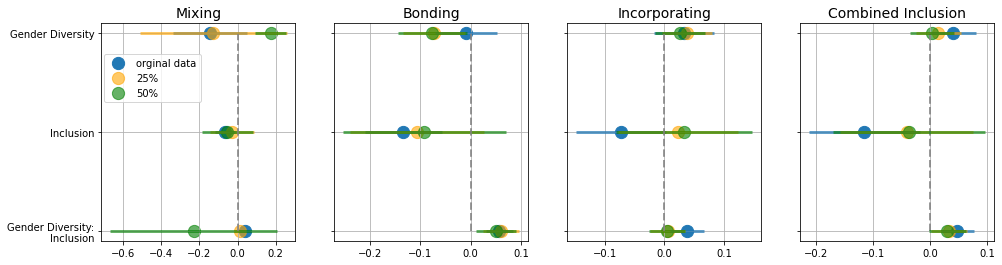

In [631]:
nrow = 1
ncol = 4
fig, (ax1,ax2,ax3,ax01) = plt.subplots(nrow, ncol, figsize=(16,4), sharey=True, sharex=False)


df01=M[M['formula']=='formula4_blau'][1:4]
df01['label']=['Gender Diversity', 'Inclusion', "Gender Diversity:\nInclusion"]
df01['order']=[1,2,3]
df01=df01.sort_values('order', ascending=False)
ax01.set_title('Combined Inclusion', fontsize=14)
ax01.set_ylabel("")
ax01.scatter(list(df01['Coef.']),list(df01['label']), s=150, alpha=.99, label='original data')
ax01.hlines(y=list(df01['label']), xmin=list(df01['[0.025']),
           xmax=list(df01['0.975]']), linewidth=3,  alpha=0.7)

df01=M[M['formula']=='formula425_blau'][1:4]
df01['label']=['Gender Diversity', 'Inclusion', "Gender Diversity:\nInclusion"]
df01['order']=[1,2,3]
df01=df01.sort_values('order', ascending=False)
ax01.set_title('Combined Inclusion', fontsize=14)
ax01.set_ylabel("")
ax01.scatter(list(df01['Coef.']),list(df01['label']), s=150, color="orange", alpha=.6, label='25% unknown swap')
ax01.hlines(y=list(df01['label']), xmin=list(df01['[0.025']),
           xmax=list(df01['0.975]']), linewidth=3, color="orange", alpha=0.6)
ax01.grid()
ax01.vlines(x=0, ymin=0.0, ymax=1.99, color='grey', linewidth=2,linestyle='dashed', alpha=0.8)

df01=M[M['formula']=='formula450_blau'][1:4]
df01['label']=['Gender Diversity', 'Inclusion', "Gender Diversity:\nInclusion"]
df01['order']=[1,2,3]
df01=df01.sort_values('order', ascending=False)
ax01.set_title('Combined Inclusion', fontsize=14)
ax01.set_ylabel("")
ax01.scatter(list(df01['Coef.']),list(df01['label']), s=150, color="green", alpha=.6, label='50% unknown swap')
ax01.hlines(y=list(df01['label']), xmin=list(df01['[0.025']),
           xmax=list(df01['0.975]']), linewidth=3, color="green", alpha=0.6)


df=M[M['formula']=='formula1blau2'][1:4]
df['label']=['Gender Diversity', 'Inclusion', "Gender Diversity:\nInclusion"]
df['order']=[1,2,3]
df=df.sort_values('order', ascending=False)
ax1.set_title('Mixing', fontsize=14)
ax1.set_ylabel("")
ax1.scatter(list(df['Coef.']),list(df['label']), s=150, alpha=.99)
ax1.hlines(y=list(df['label']), xmin=list(df['[0.025']),
           xmax=list(df['0.975]']), linewidth=3, alpha=0.7)

df=M[M['formula']=='formula125_blau'][1:4]
df['label']=['Gender Diversity', 'Inclusion', "Gender Diversity:\nInclusion"]
df['order']=[1,2,3]
df=df.sort_values('order', ascending=False)
ax1.set_title('Mixing', fontsize=14)
ax1.set_ylabel("")
ax1.scatter(list(df['Coef.']),list(df['label']), s=150, color="orange", alpha=.6)
ax1.hlines(y=list(df['label']), xmin=list(df['[0.025']),
           xmax=list(df['0.975]']), linewidth=3, color="orange", alpha=0.6)

df=M[M['formula']=='formula150_blau'][1:4]
df['label']=['Gender Diversity', 'Inclusion', "Gender Diversity:\nInclusion"]
df['order']=[1,2,3]
df=df.sort_values('order', ascending=False)
ax1.set_title('Mixing', fontsize=14)
ax1.set_ylabel("")
ax1.scatter(list(df['Coef.']),list(df['label']), s=150, color="green", alpha=.6)
ax1.hlines(y=list(df['label']), xmin=list(df['[0.025']),
           xmax=list(df['0.975]']), linewidth=3, color="green", alpha=0.6)
ax1.grid()
ax1.vlines(x=0, ymin=0.0, ymax=1.99, color='grey', linewidth=2,linestyle='dashed', alpha=0.8)


df2=M[M['formula']=='formula2blau2'][1:4]
df2['label']=['Gender Diversity', 'Inclusion', "Gender Diversity:\nInclusion"]
df2['order']=[1,2,3]
df2=df2.sort_values('order', ascending=False)
ax2.set_title('Bonding', fontsize=14)
ax2.set_ylabel("")
ax2.scatter(list(df2['Coef.']),list(df2['label']), s=150, alpha=.99, label='orginal data')
ax2.hlines(y=list(df2['label']), xmin=list(df2['[0.025']),
           xmax=list(df2['0.975]']), linewidth=3, alpha=0.7)


df2=M[M['formula']=='formula225_blau'][1:4]
df2['label']=['Gender Diversity', 'Inclusion', "Gender Diversity:\nInclusion"]
df2['order']=[1,2,3]
df2=df2.sort_values('order', ascending=False)
ax2.set_title('Bonding', fontsize=14)
ax2.set_ylabel("")
ax2.scatter(list(df2['Coef.']),list(df2['label']), s=150, color="orange", alpha=.6, label='25%')
ax2.hlines(y=list(df2['label']), xmin=list(df2['[0.025']),
           xmax=list(df2['0.975]']), linewidth=3, color="orange", alpha=0.6)

df2=M[M['formula']=='formula250_blau'][1:4]
df2['label']=['Gender Diversity', 'Inclusion', "Gender Diversity:\nInclusion"]
df2['order']=[1,2,3]
df2=df2.sort_values('order', ascending=False)
ax2.set_title('Bonding', fontsize=14)
ax2.set_ylabel("")
ax2.scatter(list(df2['Coef.']),list(df2['label']), s=150, color="green", alpha=.6, label='50%')
ax2.hlines(y=list(df2['label']), xmin=list(df2['[0.025']),
           xmax=list(df2['0.975]']), linewidth=3, color="green", alpha=0.6)

ax2.grid()
ax2.vlines(x=0, ymin=0.0, ymax=1.99, color='grey', linewidth=2,linestyle='dashed', alpha=0.8)

df3=M[M['formula']=='formula3_blau'][1:4]
df3['label']=['Gender Diversity', 'Inclusion', "Gender Diversity:\nInclusion"]
df3['order']=[1,2,3]
df3=df3.sort_values('order', ascending=False)
ax3.set_title('Incorporating', fontsize=14)
ax3.set_ylabel("")
ax3.scatter(list(df3['Coef.']),list(df3['label']), s=150, alpha=.99, label='original data')
ax3.hlines(y=list(df3['label']), xmin=list(df3['[0.025']),
           xmax=list(df3['0.975]']), linewidth=3, alpha=0.7)

df3=M[M['formula']=='formula325_blau'][1:4]
df3['label']=['Gender Diversity', 'Inclusion', "Gender Diversity:\nInclusion"]
df3['order']=[1,2,3]
df3=df3.sort_values('order', ascending=False)
ax3.set_title('Incorporating', fontsize=14)
ax3.set_ylabel("")
ax3.scatter(list(df3['Coef.']),list(df3['label']), s=150, color="orange", alpha=.6, label='25%')
ax3.hlines(y=list(df3['label']), xmin=list(df3['[0.025']),
           xmax=list(df3['0.975]']), linewidth=3, color="orange", alpha=0.6)

df3=M[M['formula']=='formula350_blau'][1:4]
df3['label']=['Gender Diversity', 'Inclusion', "Gender Diversity:\nInclusion"]
df3['order']=[1,2,3]
df3=df3.sort_values('order', ascending=False)
ax3.set_title('Incorporating', fontsize=14)
ax3.set_ylabel("")
ax3.scatter(list(df3['Coef.']),list(df3['label']), s=150, color="green", alpha=.6, label='50%')
ax3.hlines(y=list(df3['label']), xmin=list(df3['[0.025']),
           xmax=list(df3['0.975]']), linewidth=3, color="green", alpha=0.6)
ax3.grid()
ax3.vlines(x=0, ymin=0.0, ymax=1.99, color='grey', linewidth=2,linestyle='dashed', alpha=0.8)

ax2.legend(loc='center left', bbox_to_anchor=(-1.21, 0.75))

plt.savefig('models_small_ROBUST_zscore_APR1.pdf', bbox_inches='tight')

In [649]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

anovaResults = anova_lm(dist0, dist01blau2)
a=pd.DataFrame(anovaResults)
a['label']='gender diversity'

anovaResults = anova_lm(dist01blau2, dist1blau2)
b=pd.DataFrame(anovaResults)
b['label']='mixing'
a=a.append(b)

anovaResults = anova_lm(dist01blau2, dist2blau2)
b=pd.DataFrame(anovaResults)
b['label']='bonding'
a=a.append(b)

anovaResults = anova_lm(dist01blau2, dist3_blau)
b=pd.DataFrame(anovaResults)
b['label']='incorporating'
a=a.append(b)

anovaResults = anova_lm(dist01blau2, dist4_blau)
b=pd.DataFrame(anovaResults)
b['label']='combined inclusion'
a=a.append(b)

In [650]:
a.dropna()

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F),label
1,3981.0,3572.772320,1.0,28.031470,31.234367,2.439919e-08,gender diversity
1,3979.0,3567.095030,2.0,5.677290,3.166433,4.225992e-02,mixing
1,3979.0,3557.721937,2.0,15.050383,8.416267,2.252016e-04,bonding
1,3979.0,3566.857250,2.0,5.915070,3.299272,3.701103e-02,incorporating
1,3979.0,3561.413784,2.0,11.358536,6.345179,1.773001e-03,combined inclusion
